# COSC2789 - Practical Data Science

# Assignment 3: Group Project

# Introduction

Write the introduction here 

**Data Description** : Write something here 

**Domain** : Write something here 

**Context** : Write something here 

**Attribute Information** : Write something here 


# Project Goal Definition

Write something here 

# Retrieving and Preparing the Data


## Installing necessary libraries


In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## Importing libraries

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TunedThresholdClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, LabelEncoder, QuantileTransformer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline  
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

# Set a consistent style for plots
sns.set(style="whitegrid")

## Importing dataset

In [3]:
# Read dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Check the dataset size
print (f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 12330 rows and 18 columns


## First look at the dataset

In [4]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

In [7]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   
Weekend                  12330.0     0.232603     0.422509  0.0    0.000000   
Revenue                  12330.0     0.154745     0.361676  0.0    0.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000  
Weekend                    0.000000     0.000000      1.000000  
Revenue                    0.000000     0.000000      1.000000

In [8]:
# Drop duplicate rows
df = df.drop_duplicates()

# Reset the index, dropping the old index
df = df.reset_index(drop=True)

# Check the dataset size
print (f"After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

After removing duplicates, the dataset has 12205 rows and 18 columns


In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending=False)[lambda x: x != 0]
    percenteage = round(total/df.shape[0]*100,2)
    return pd.concat([total,percenteage], axis=1, keys=['Total', 'Percentage'])

# Check dataset missing percentage
missing_percentage(df)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [10]:
# Checking the distribution of target variable
display(df['Revenue'].value_counts(), df['Revenue'].value_counts(normalize = True)*100)

Revenue
0    10297
1     1908
Name: count, dtype: int64

Revenue
0    84.367063
1    15.632937
Name: proportion, dtype: float64

In [11]:
# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

From the initial check, there is no missing value in our dataset.

### Exploratory Data Analysis

#### Predefined Functions

In [12]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [13]:
# function to create distribution plot
def customized_displot(x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))
    
    ## Create histogram plot
    ax = sns.histplot(
        x=x,
        kde=False,
        stat='count'
    )

    for i in ax.containers:
        labels = [int(value) if value != 0 else '' for value in i.datavalues]
        ax.bar_label(i, labels=labels, padding=3)

    plt.title(title)
    plt.xlabel(x.name if hasattr(x, 'name') else x)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [14]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [15]:
# Function to create histogram, QQ plot, and box plot for a specific column
def plotting_3_chart(df, feature, plot_title="Feature Analysis"):
    """
    Creates a histogram, QQ plot, and box plot for a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        feature (str): The column name for analysis.
        plot_title (str): The title of the entire plot.
    """

    # Set a style
    plt.style.use('fivethirtyeight')

    # Create a customized chart and set the figure size
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    fig.suptitle(plot_title, fontsize=16, fontweight='bold')  # Set the main plot title

    # Create a grid of 3 columns and 3 rows
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title
    ax1.set_title('Distribution')
    # Plot the histogram
    sns.histplot(df.loc[:, feature], stat='density', ax=ax1, kde=True)

    # Customizing the QQ plot
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title
    ax2.set_title('QQ Plot')
    # Plotting the QQ plot
    stats.probplot(df.loc[:, feature], plot=ax2)

    # Customizing the box plot
    ax3 = fig.add_subplot(grid[:, 2])
    # Set the title
    ax3.set_title('Box Plot')
    # Plotting the box plot
    sns.boxplot(y=df.loc[:, feature], ax=ax3)

    # Display the plot
    plt.show()

#### Observation 1 - Administrative


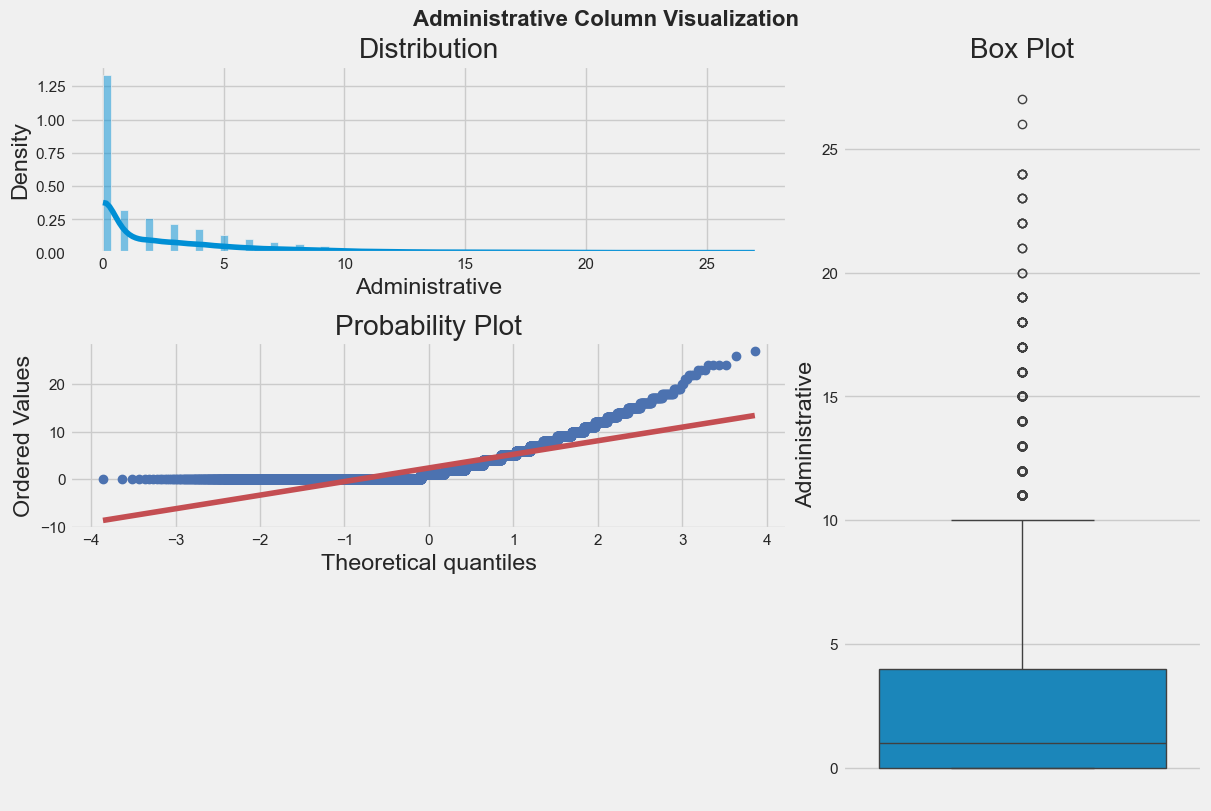

In [16]:
# use plotting_3_chart function to visualize Administrative
plotting_3_chart(df, "Administrative", plot_title="Administrative Column Visualization")

**Distribution:**
- The plot clearly illustrates the heavy right skew pattern.
- It is dominated by the value of 0, indicating that most sessions involve visiting few or no administrative pages

**QQ Plot:**
- The points deviate significantly from the line, confirming the non-normal distribution of this feature.

**Box Plot:**
- Some outliers appear above the whisker, which demonstrates some sessions with higher administrative page visits than normal

#### Observation 2 - Administrative_Duration


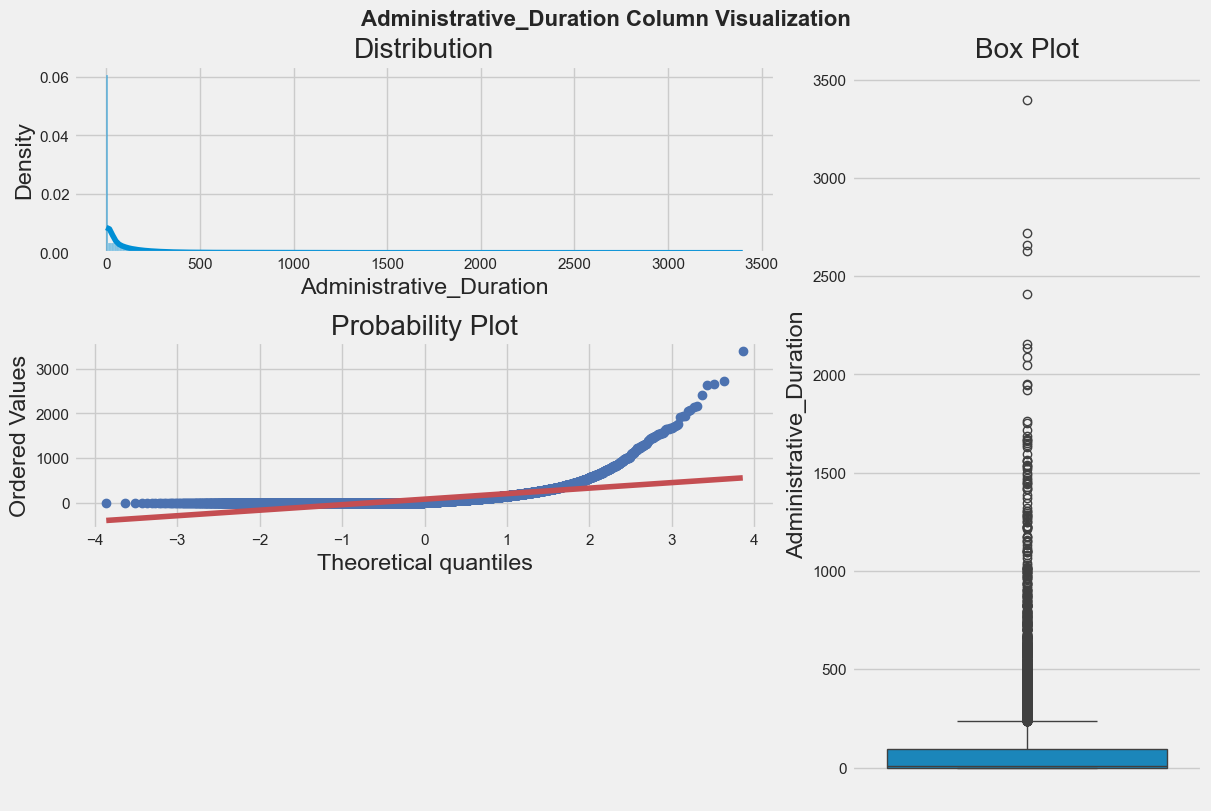

In [17]:
# use plotting_3_chart function to visualize Administrative_Duration
plotting_3_chart(df, "Administrative_Duration", plot_title="Administrative_Duration Column Visualization")

**Distribution:**
- Similarly, this plot also contain a heavy right skew pattern.
- The primary value is 0, indicating the lack of attention of each session to administrative pages - supporting the observation in the "Administrative" feature.
- Some session have a longer access duration, which contribute to a long tail on the right

**QQ Plot:**
- The points also deviate substaintially from the line, particularly in the upper tail, showing the highly skewed distribution.

**Box Plot:**
- There are numerous outliers with higher durations than the majority.

#### Observation 3 - Informational


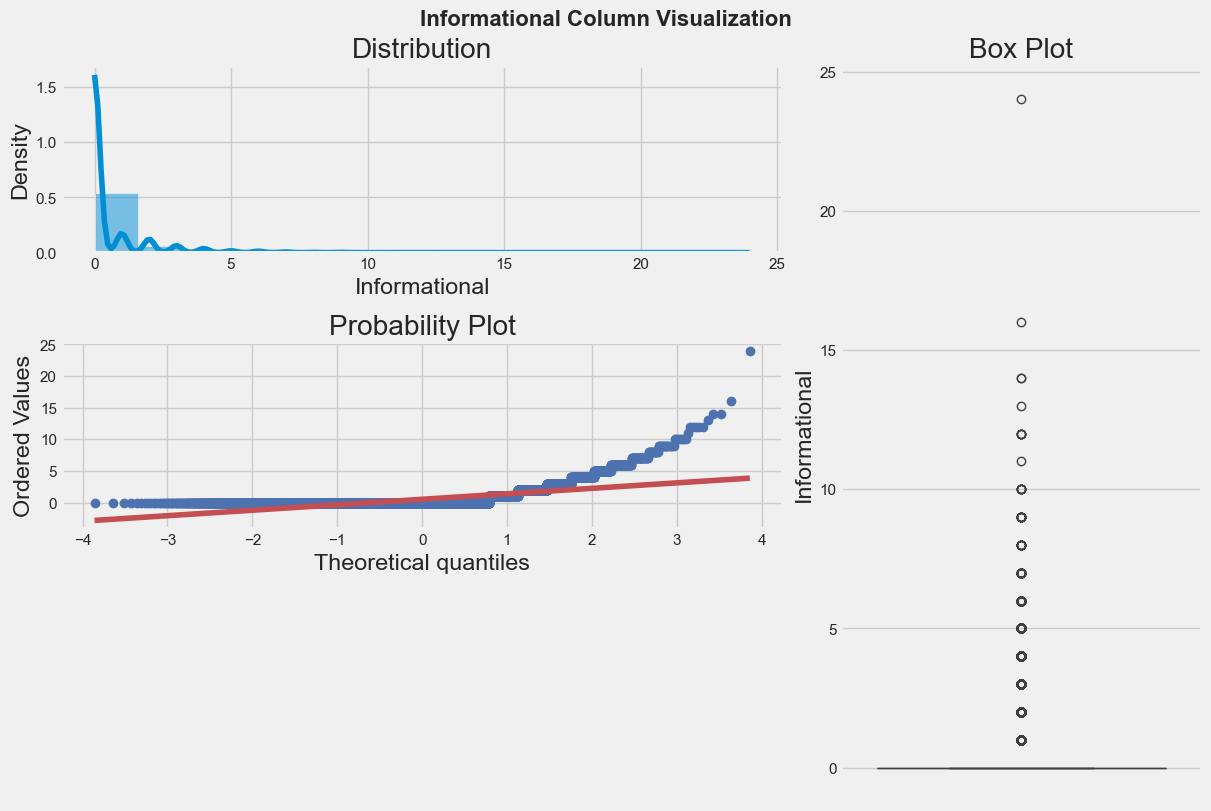

In [18]:
# use plotting_3_chart function to visualize Informational
plotting_3_chart(df, "Informational", plot_title="Informational Column Visualization")

**Distribution:**
- This is a heavy right skew plot.
- The majority of value is 0, which indicates a lack of attention from visitor to these type of page.

**QQ Plot:**
- Most points deviate from the diagonal line, especially in the upper tail, indicating a non-normal distribution

**Box Plot:**
- The box plot reveals numerous outliers, suggesting that some sessions involve significantly higher numbers of informational page visits than others.
- With the extremely narrow IQR, most of data points in this feature is clustered around zero.


#### Observation 4 - Informational_Duration


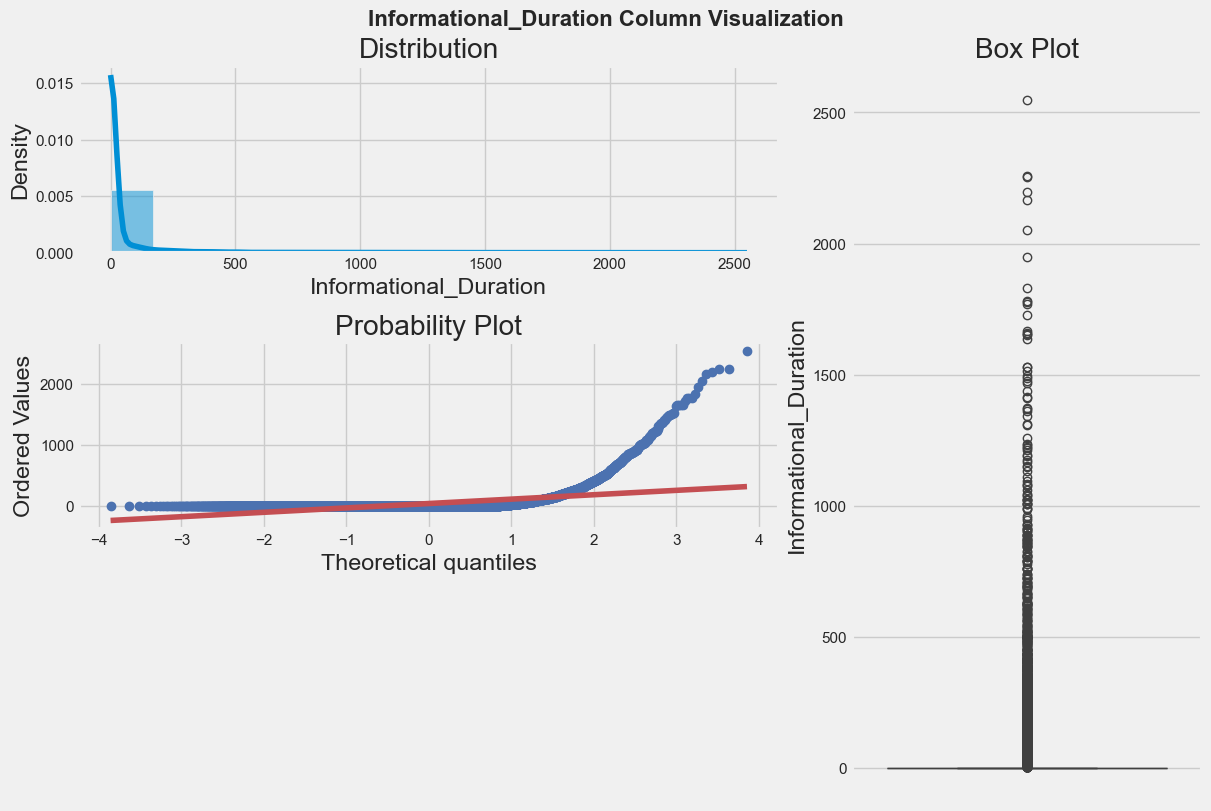

In [19]:
# use plotting_3_chart function to visualize Informational_Duration
plotting_3_chart(df, "Informational_Duration", plot_title="Informational_Duration Column Visualization")

**Distribution:**
- It is clear that this plot align well with the above plot of Informational feature.
- This highly right skew plot demonstrates little to no time spent on informational pages in most sessions.

**QQ Plot:**
- The data points show significant deviation in the upper tail, illustrating a non-normal distribution

**Box Plot:**
- The median and IQR are close to zero, emphasizing that most data points represent low or no durations

#### Observation 5 - ProductRelated


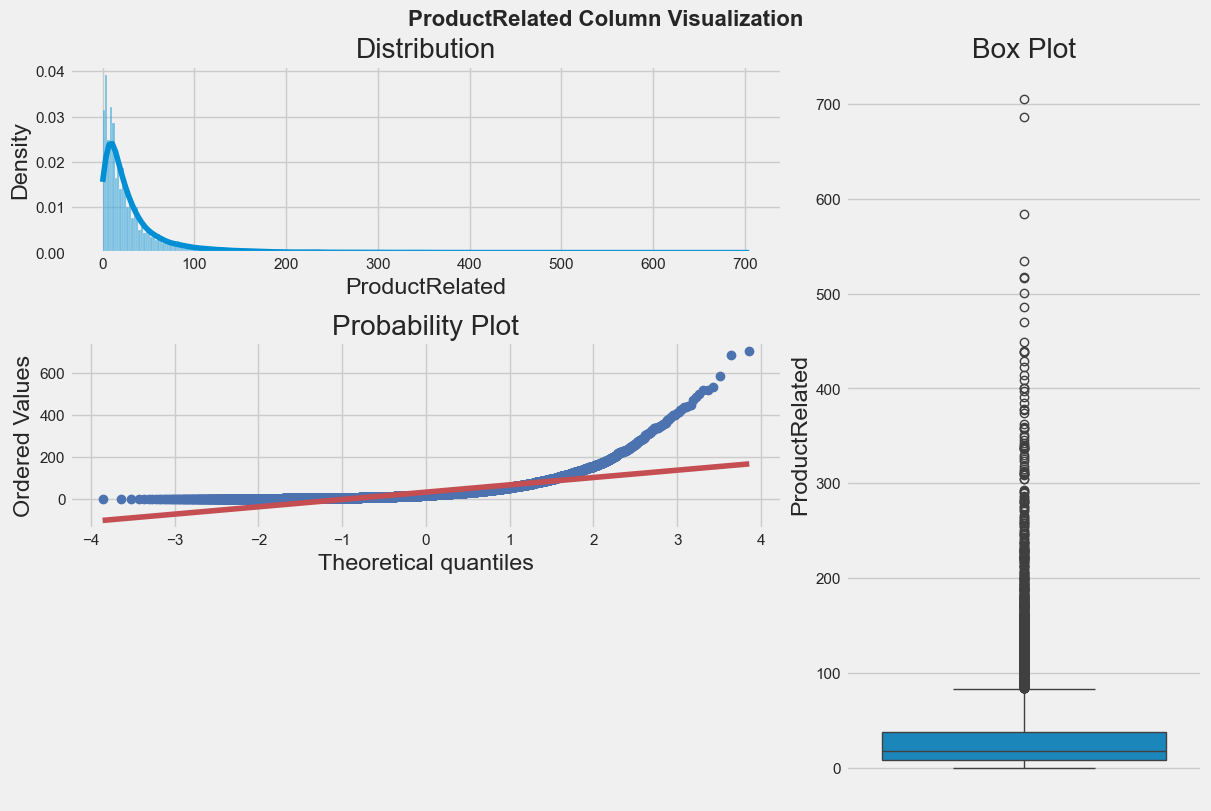

In [20]:
# use plotting_3_chart function to visualize ProductRelated
plotting_3_chart(df, "ProductRelated", plot_title="ProductRelated Column Visualization")

**Distribution:**
- The data is right skew, but less so compared to the previous, illustrating a wider range of sessions.
- This plot also indicates a higher interest of visitor.
- Another observation is that the distribution is prominent in the lower values but having a longer tail extending toward higher values.

**QQ Plot:**
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

**Box Plot:**
- There are several outliers with significant high numbers of product-related page visits compared to the typical range.
- The median and IQR are both larger than previous features, emphasizing the higher interest of visitor in comparison to administrative or informational pages. 

#### Observation 6 - ProductRelated_Duration


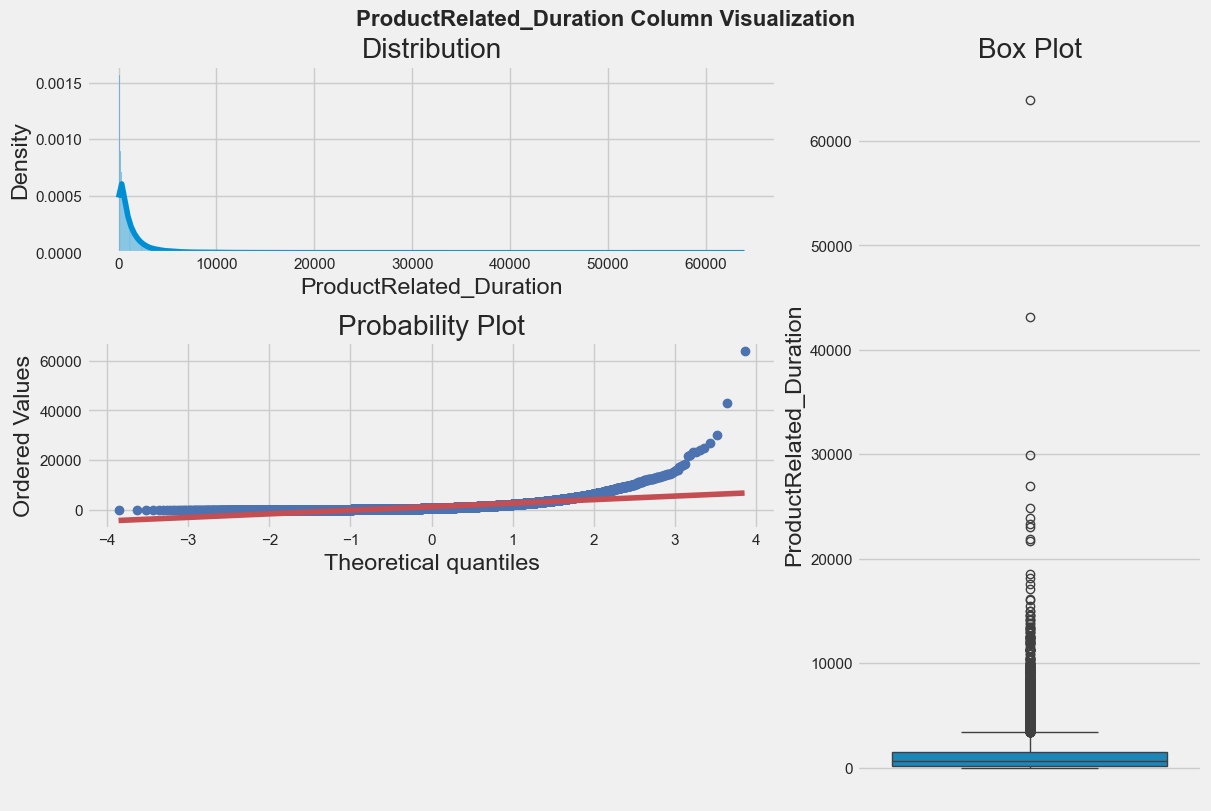

In [21]:
# use plotting_3_chart function to visualize ProductRelated_Duration
plotting_3_chart(df, "ProductRelated_Duration", plot_title="ProductRelated_Duration Column Visualization")

**Distribution:**
- The data is data is right skew with a long right tail, due to some small number of sessions include significantly longer durations.

**QQ Plot:**
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

**Box Plot:**
- There are several extreme outliers, illustrating users who spend an unusually high amount of time.
- The median and IQR are both larger than other duration features, highlighting the better attention of visitor toward product-related pages.

#### Observation 7 - BounceRates


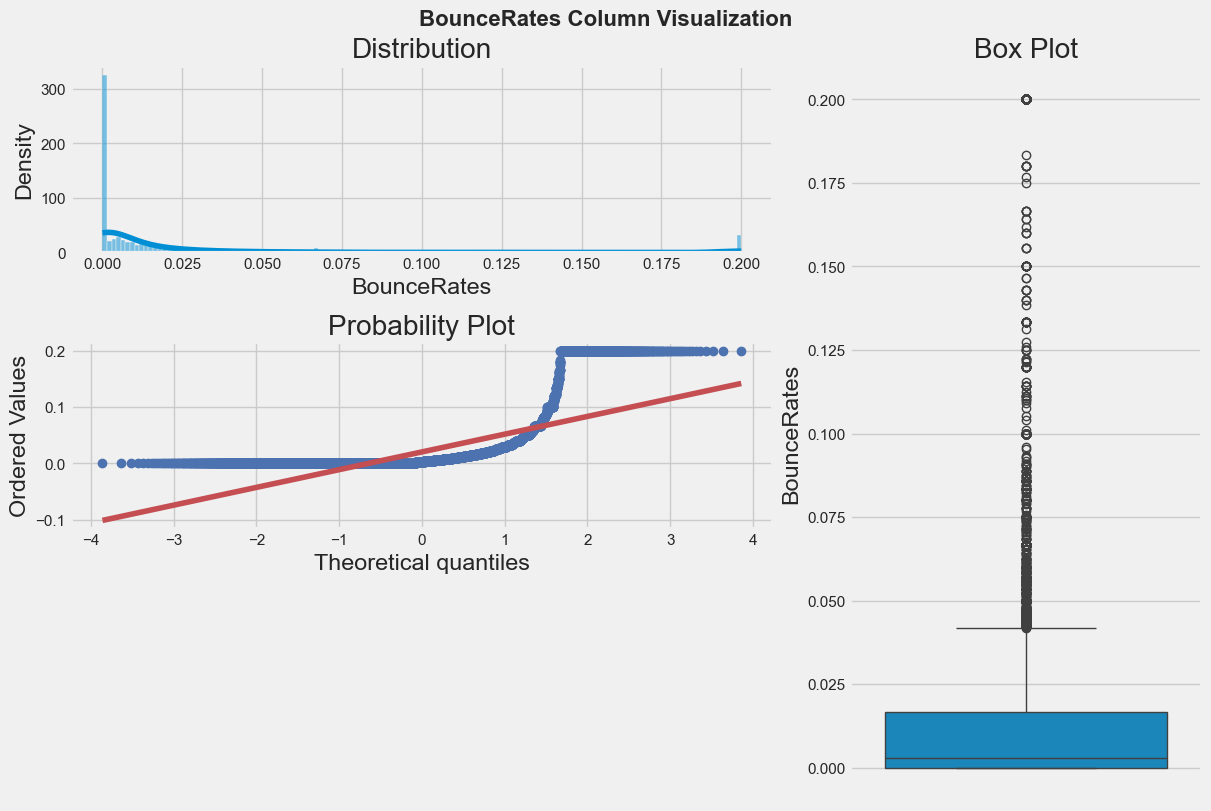

In [22]:
# use plotting_3_chart function to visualize BounceRates
plotting_3_chart(df, "BounceRates", plot_title="BounceRates Column Visualization")

**Distribution:**
- The data is right-skewed, with the majority of sessions having very low bounce rates, suggesting that in general, users do not leave the site immediately after visiting a single page.
- A small number of sessions exhibit higher bounce rates, which might arise from the user's accidental actions or technical issue.

**QQ Plot:**
- Almost all the data points deviate deviate from the diagonal line, confirming a non-normal distribution.

**Box Plot:**
- Outliers in this plot represent sessions with unusually high bounce rates, where users exited the site almost immediately after arriving.
- The median and IQR is small, indicating that most sessions have minimal bounce rates.

#### Observation 8 - ExitRates


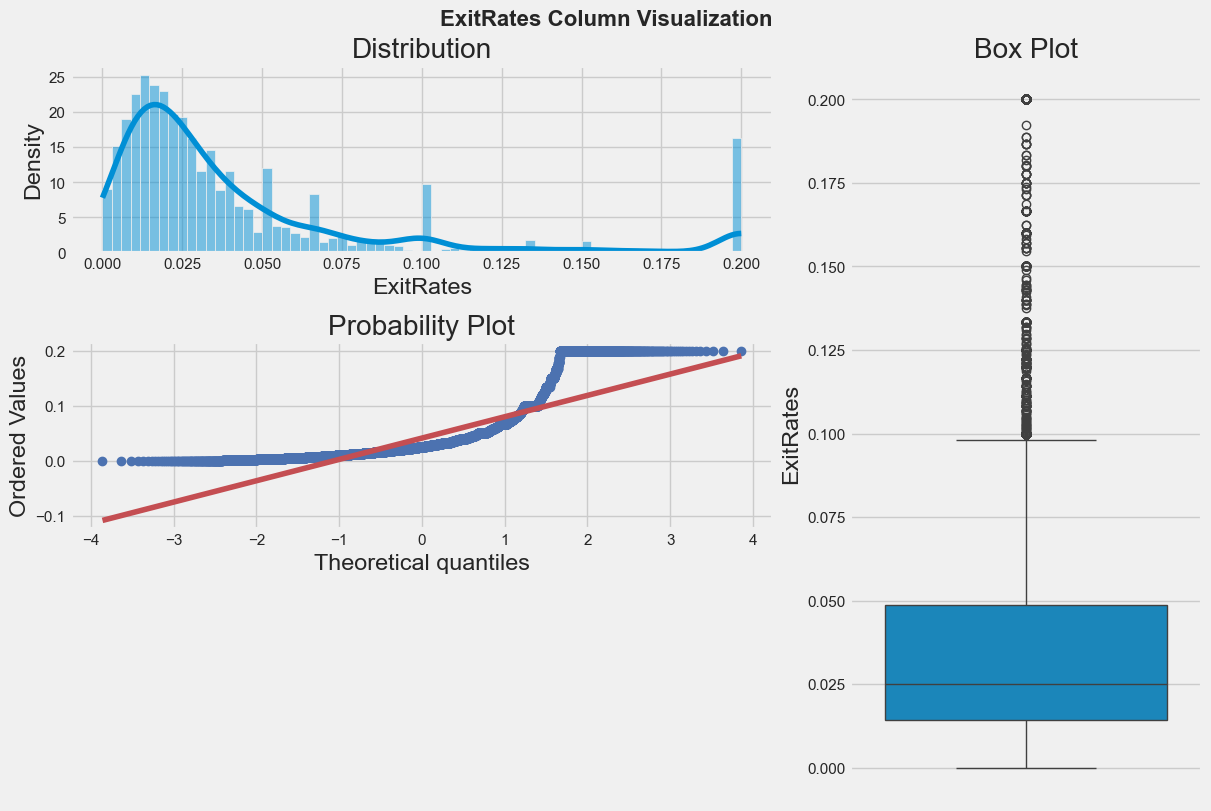

In [23]:
# use plotting_3_chart function to visualize ExitRates
plotting_3_chart(df, "ExitRates", plot_title="ExitRates Column Visualization")

**Distribution:**
- Most sessions exhibit low exit rates, which illustrates that users tend to navigate through multiple pages before ending their visit in general.

**QQ Plot:**
- A large number of data points deviate deviate from the diagonal line, confirming a non-normal distribution.

**Box Plot:**
- The median exit rate is relatively low, consistent with the histogram
- The outliers indicates sessions where exit rates are unusually high, which might due to the lost of engagement of user.

#### Observation 9 - PageValues


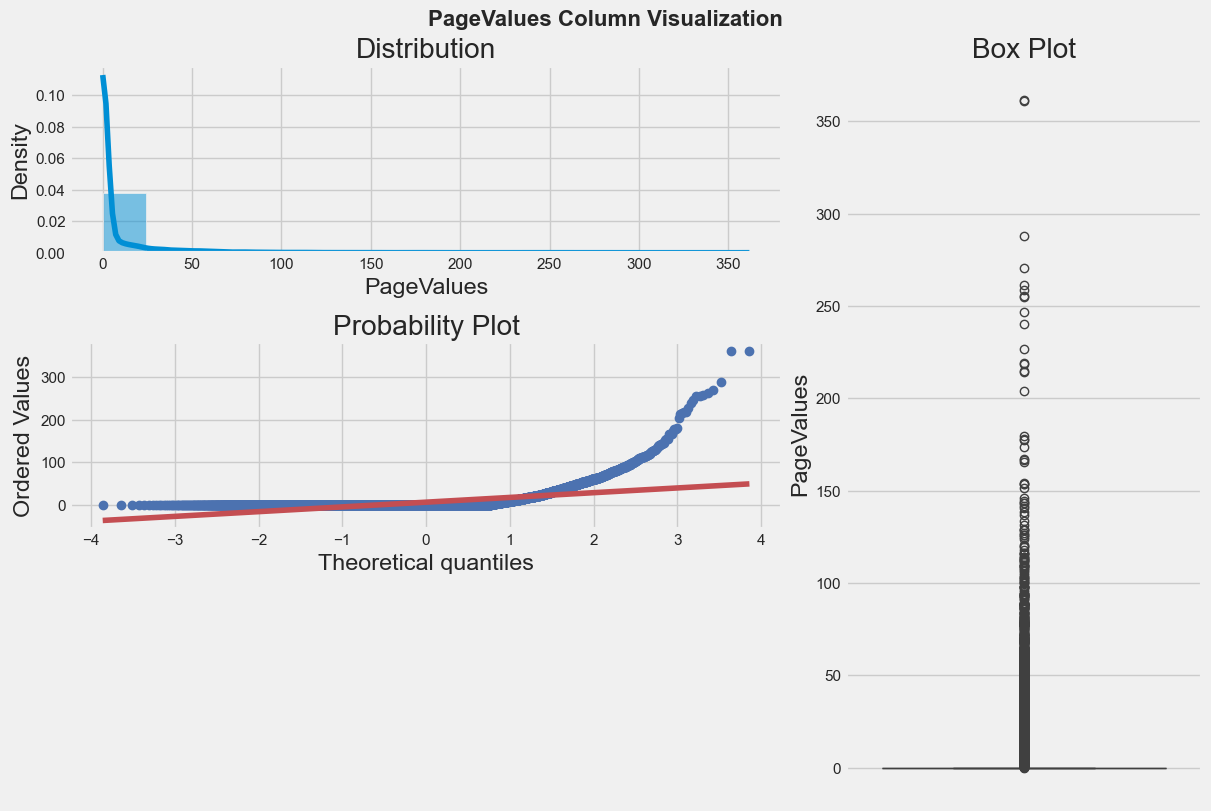

In [24]:
# use plotting_3_chart function to visualize PageValues
plotting_3_chart(df, "PageValues", plot_title="PageValues Column Visualization")

**Distribution:**
- The distribution shows a right-skewed pattern, with the majority of sessions have a PageValue close to zero.
- However, there exist a smaller number of sessions with higher PageValues, where pages contributed significantly to revenue generation.

**QQ Plot:**
- Several data points align with the diagonal line, except in the upper tail, illustrating the skewed nature of the distribution.

**Box Plot:**
- The box plot reveals several outliers where pages had unusually high values.
- These outliers likely correspond to successful transactions or pages that were critical in the customer conversion process.
- In contrast, the median and interquartile range (IQR) are close to zero, showing that most pages contribute minimally or not at all to revenue.

#### Observation 10 - SpecialDay

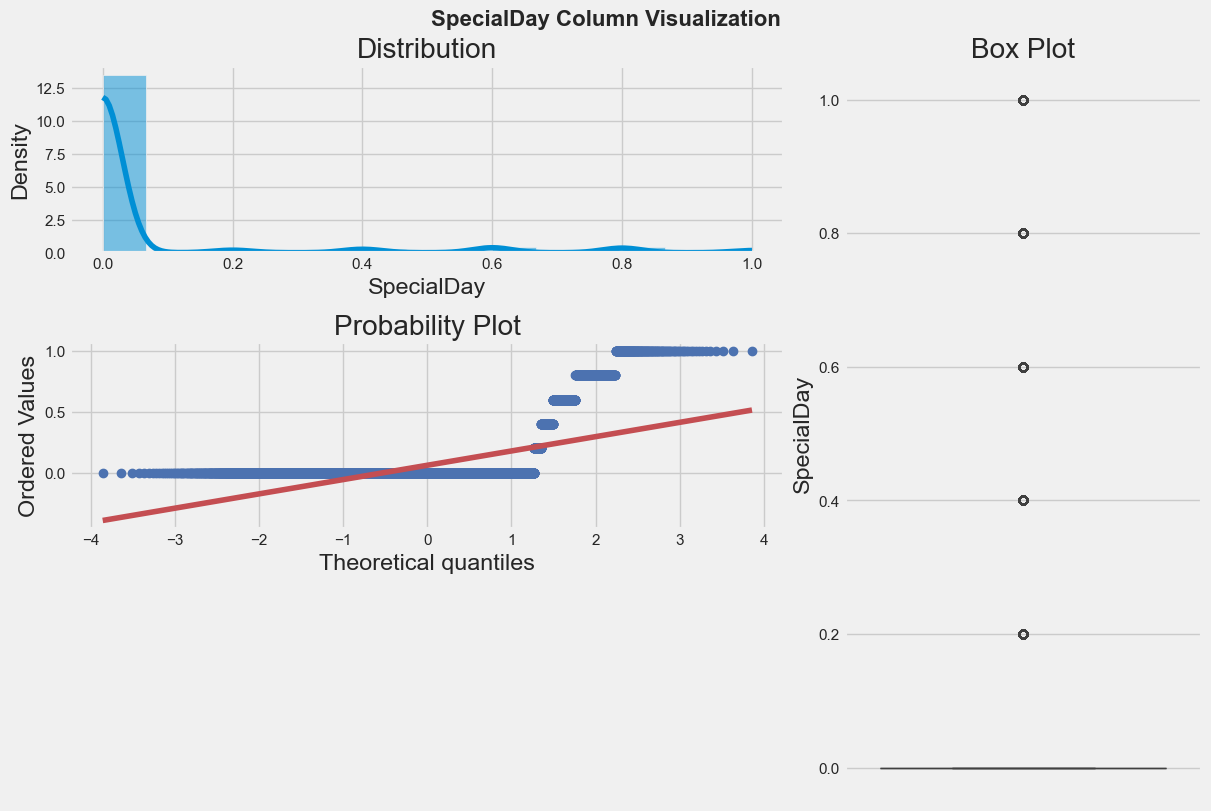

In [25]:
# use plotting_3_chart function to visualize SpecialDay
plotting_3_chart(df, "SpecialDay", plot_title="SpecialDay Column Visualization")

**Distribution:**
- The histogram shows that most sessions have a SpecialDay value of 0, indicating they occurred far from any special day.

**QQ Plot:**
- The data points deviate significantly from the diagonal line, confirming that the distribution is not normal.

**Box Plot:**
- The box plot highlights that most data points lie close to 0.
- Additionally, there are no extreme and unsual outliers due to the feature is constrained between 0 and 1.

#### Observation 11 - Month


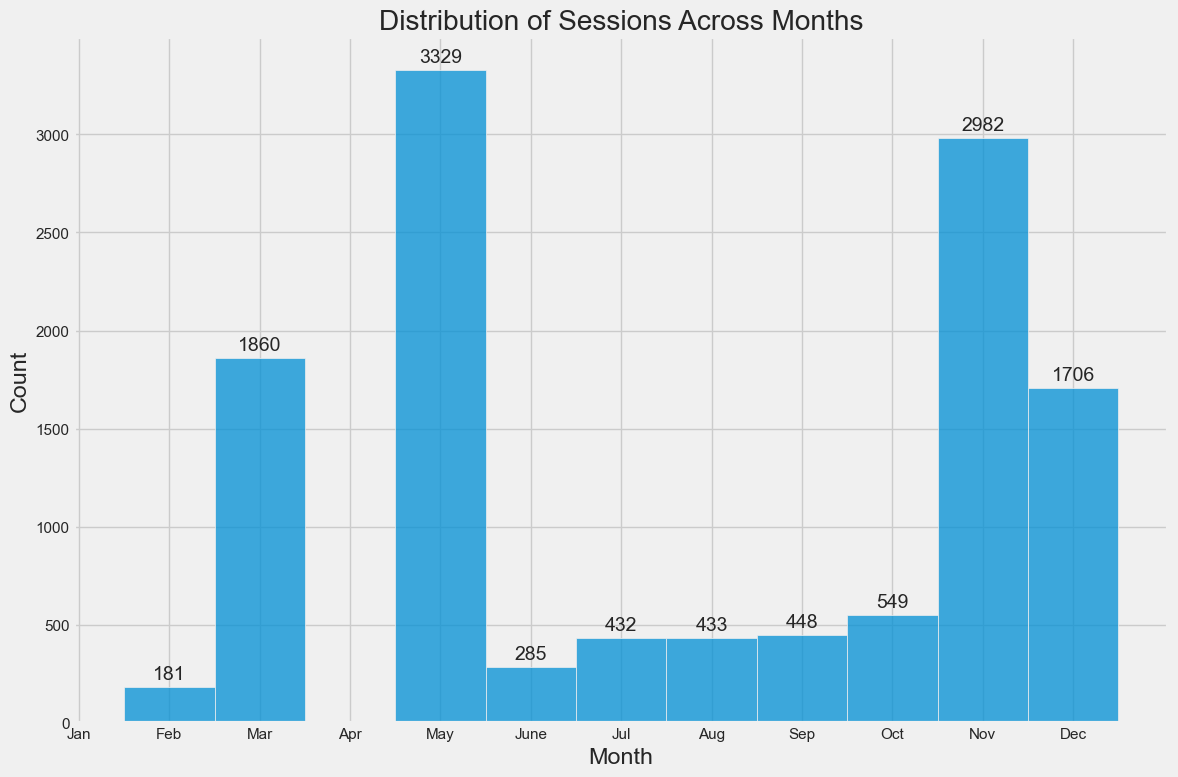

In [26]:
# Visualize the Distribution of Months
customized_displot(df['Month'], title="Distribution of Sessions Across Months")

- Some months have significantly higher session counts than others.
- Months with higher activity might relate with specific shopping events, while months with lower activity might represent periods of reduced interest
- In November and December, special events such as Black Friday, Cyber Monday, Chrismast, and New Year, increase the market demand, resulting in a higher session counts.
- The decent demand in July, August, and September might because of the back to school event, with the particular customer base - education.
- In March and May, the high demand might arise due to the Women's Day and Mother's day, respectively. 

#### Observation 12 - OperatingSystems


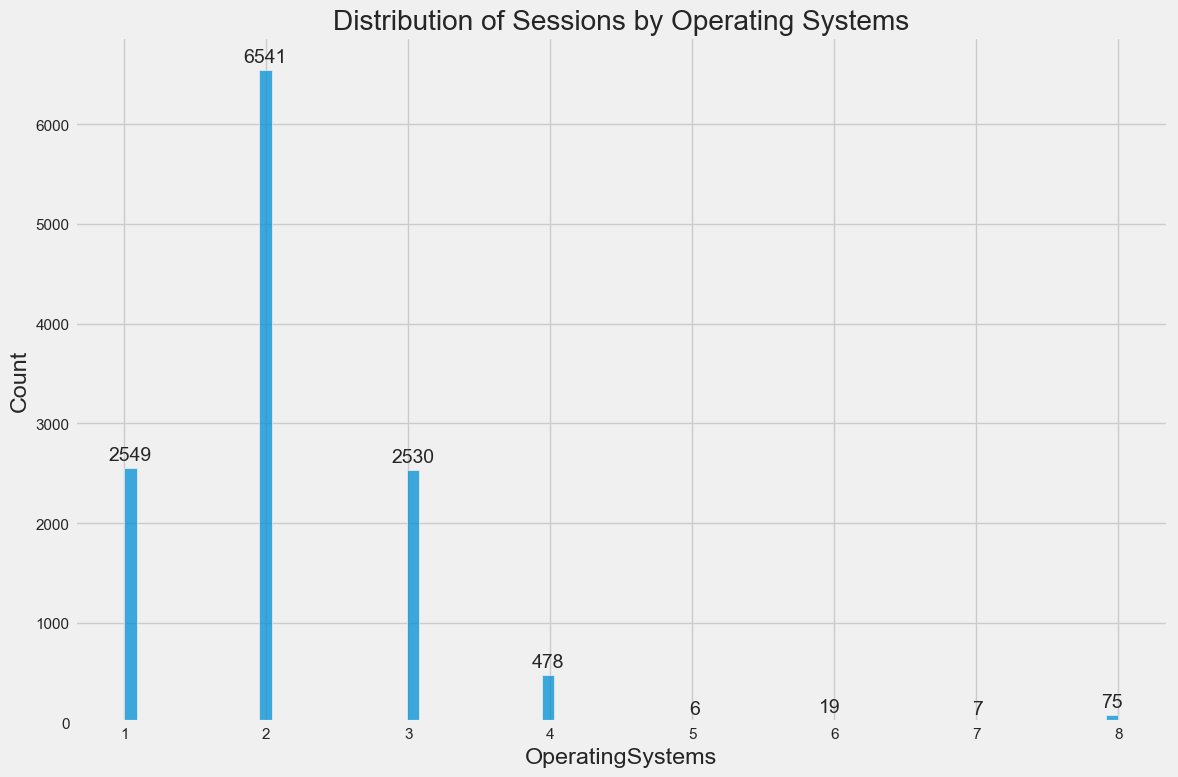

In [27]:
# Visualize the Distribution of Months
customized_displot(df['OperatingSystems'], title="Distribution of Sessions by Operating Systems")

- The most frequently used operating systems could reflect the preferences or demographics of the website's audience.
- From this data, the site can primarily optimize the site UX and compatibility with OS 1, 2, 3, and 4 to ensure the shopping experience of the majority of users. 

#### Observation 13 - Browser


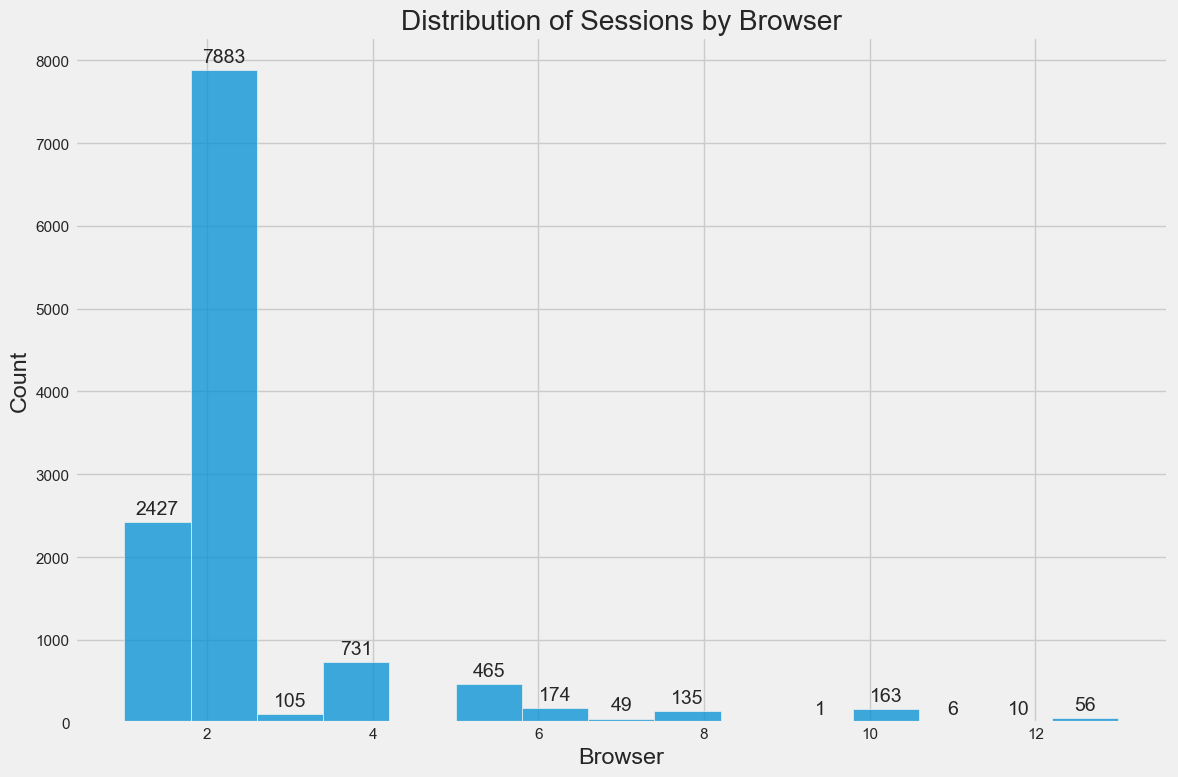

In [28]:
# Visualize the Distribution of Browser
customized_displot(df['Browser'], title="Distribution of Sessions by Browser")

- This plot depicts that the website visitors mainly use a limited number of browsers.
- The site can primarily focus on optimizing with the browser type 1, 2, and 4 to ensure seamless experience of majority of users.

#### Observation 14 - Region


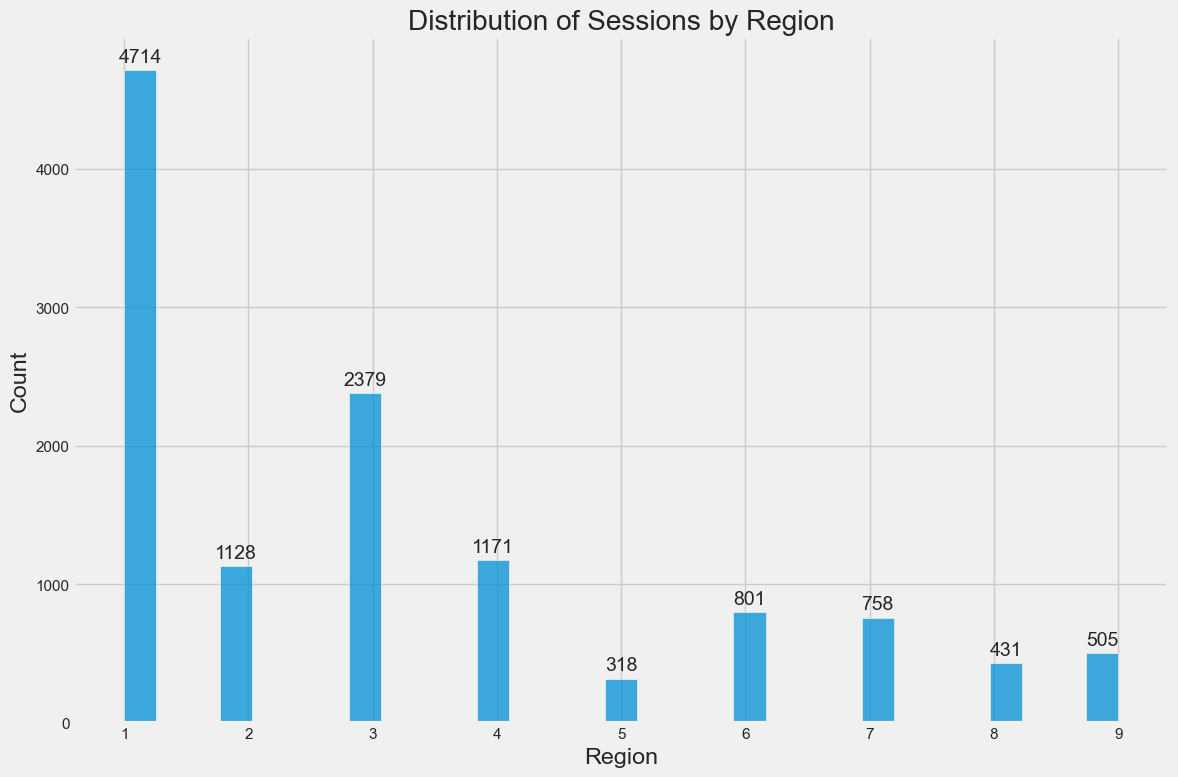

In [29]:
# Visualize the Distribution of Region
customized_displot(df['Region'], title="Distribution of Sessions by Region")

- Certain regions like 1 and 3 contribute more significantly to the session count than others, as indicated by the taller bars.
- For other regions, the number of appearances of each region does not fluctuated much.
- Hence, the site should focus more on regions 1 and 3, where they have a lot of users, while maintaining the consistent access throughout other region.

#### Observation 15 - TrafficType


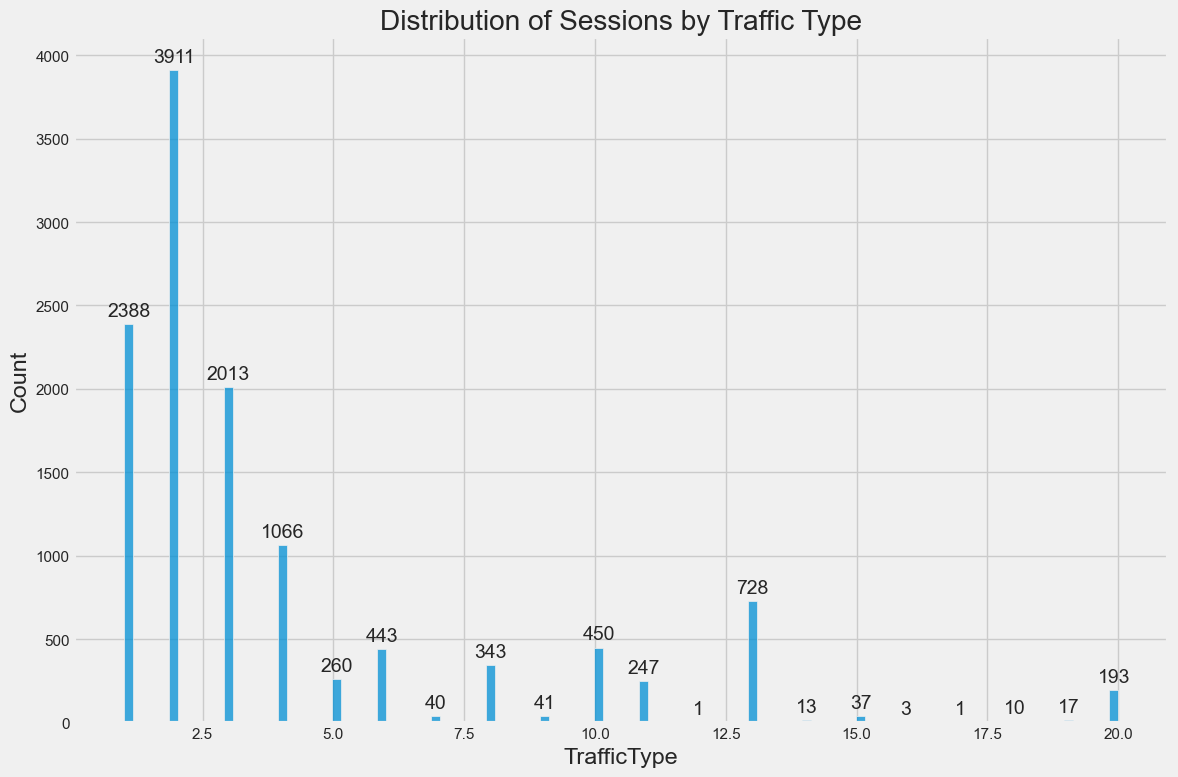

In [30]:
# Visualize the Distribution of TrafficType
customized_displot(df['TrafficType'], title="Distribution of Sessions by Traffic Type")

- Certain traffic types are much more common than others, as illustrated by the tall bars for specific values.
- Furthermore, the majority of sessions come from a limited number of traffic sources.

#### Observation 16 - VisitorType


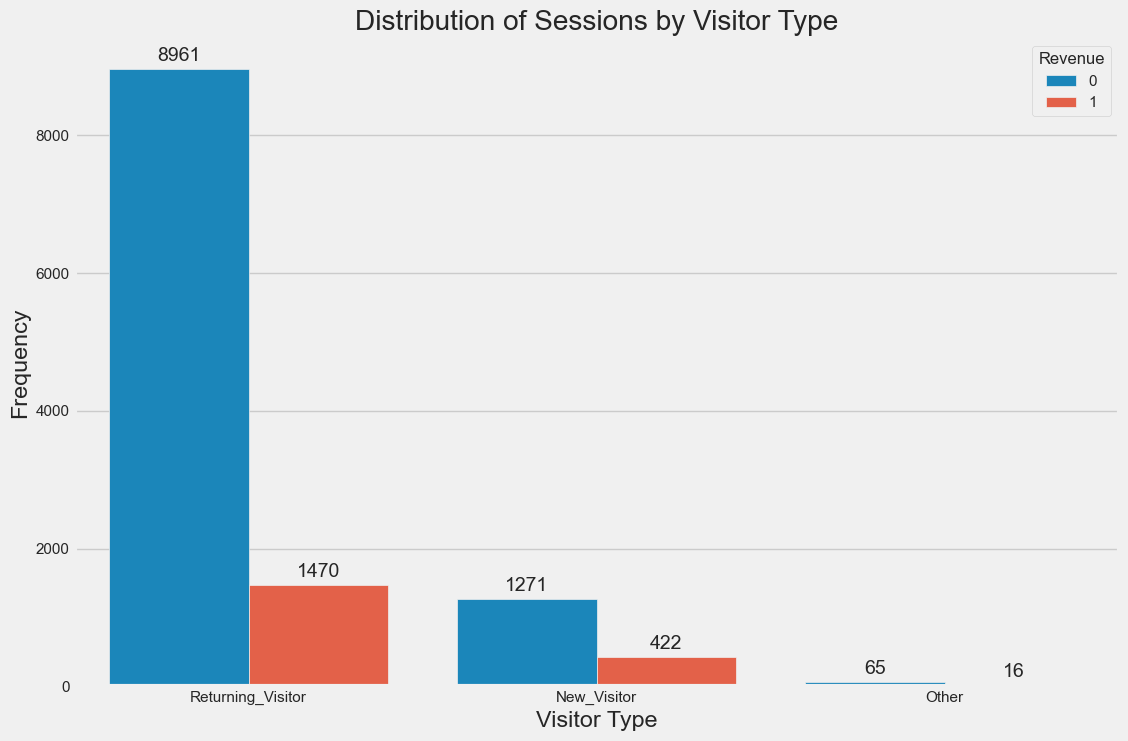

In [31]:
# Visualize the Distribution of VisitorType
plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(x=df['VisitorType'], 
                  order=df['VisitorType'].value_counts().index, 
                  hue=df['Revenue'])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Customize the plot
plt.title("Distribution of Sessions by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Frequency")
plt.legend(title='Revenue')

plt.show()

- The majority of sessions are from "Returning Visitors", emphasizing their importance for this website.
- Furthermore, this statistics also highlights the strong user retention of the site.
- This column also have a pattern of imbalance among different user's types.

#### Observation 17 - Weekend

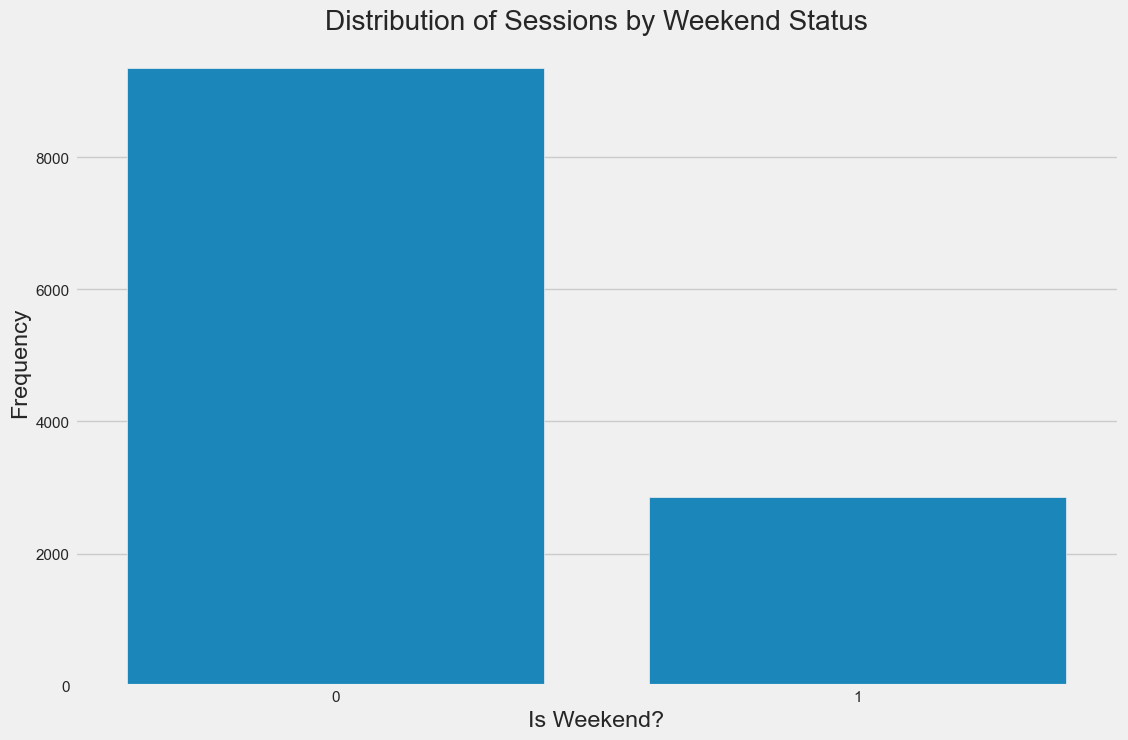

In [32]:
# Visualize the Distribution of Weekend
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Weekend'], order=df['Weekend'].value_counts().index)
plt.title("Distribution of Sessions by Weekend Status")
plt.xlabel("Is Weekend?")
plt.ylabel("Frequency")
plt.show()

- The majority of sessions occur during weekdays

#### Observation 18 - Revenue


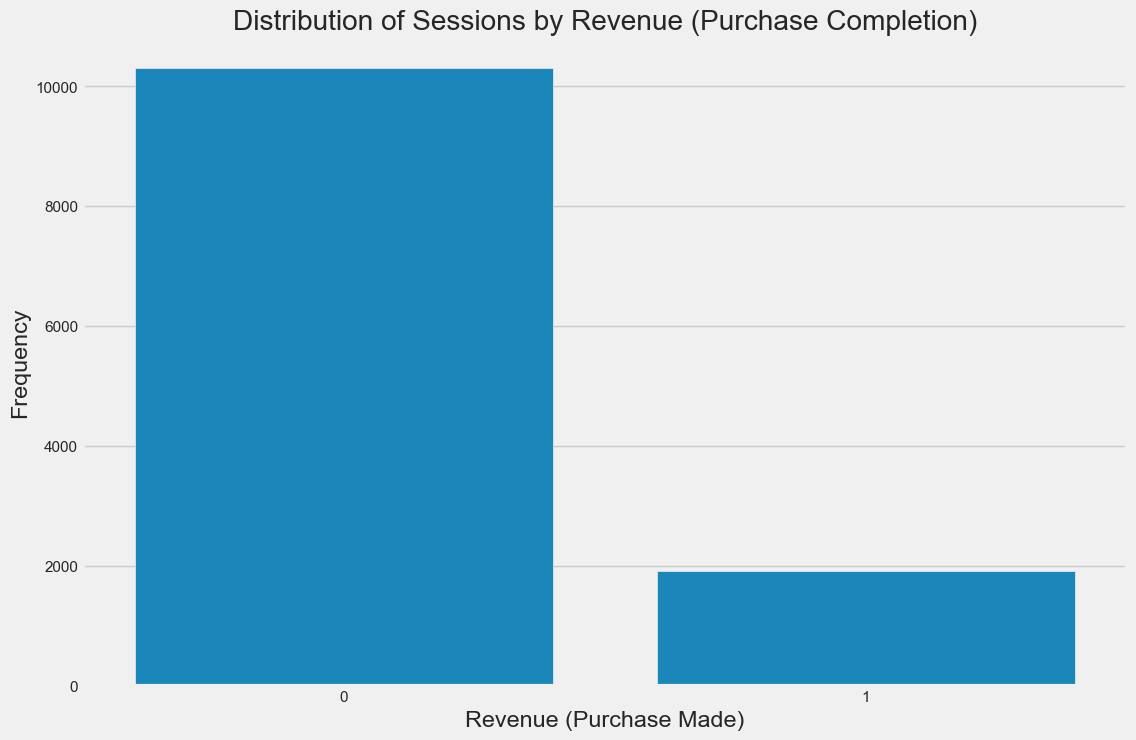

In [33]:
# Visualize the Distribution of Revenue
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Revenue'], order=df['Revenue'].value_counts().index)
plt.title("Distribution of Sessions by Revenue (Purchase Completion)")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Frequency")
plt.show()

- There is a significant imbalance in the dataset, with most sessions resulting in no revenue.
- The website sees far more browsing activity without purchases compared to sessions leading to transactions, which is typical in e-commerce, where conversion rates are often low.

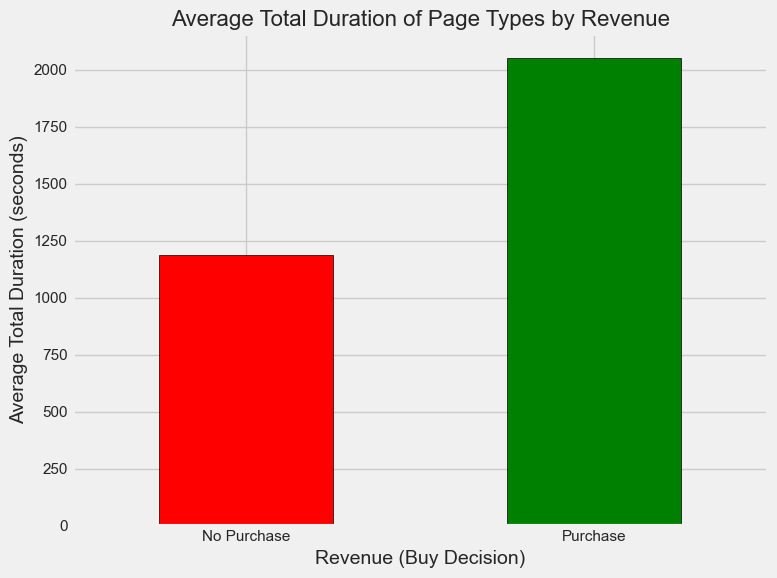

In [34]:
# Visualize the Average Total Duration of Page Types by Revenue
# Make a copy of original dataset
df_copy = df.copy()

# Create a new feature
df_copy['Total_Duration'] = (
    df_copy['Administrative_Duration'] +
    df_copy['Informational_Duration'] +
    df_copy['ProductRelated_Duration']
)

# Grouping by Revenue and calculating the average total duration
duration_revenue_analysis = df_copy.groupby('Revenue')['Total_Duration'].mean()

# Plotting the analysis
plt.figure(figsize=(8, 6))
duration_revenue_analysis.plot(kind='bar', color=['red', 'green'], edgecolor='black')

# Adding labels and title
plt.title('Average Total Duration of Page Types by Revenue', fontsize=16)
plt.xlabel('Revenue (Buy Decision)', fontsize=14)
plt.ylabel('Average Total Duration (seconds)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Purchase', 'Purchase'], rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

- Users who spend more time in the platform are more likely to perform a transaction.
- Optimizing the content to keep user longer in the platform could further increase revenue.

#### Correlation Matrix

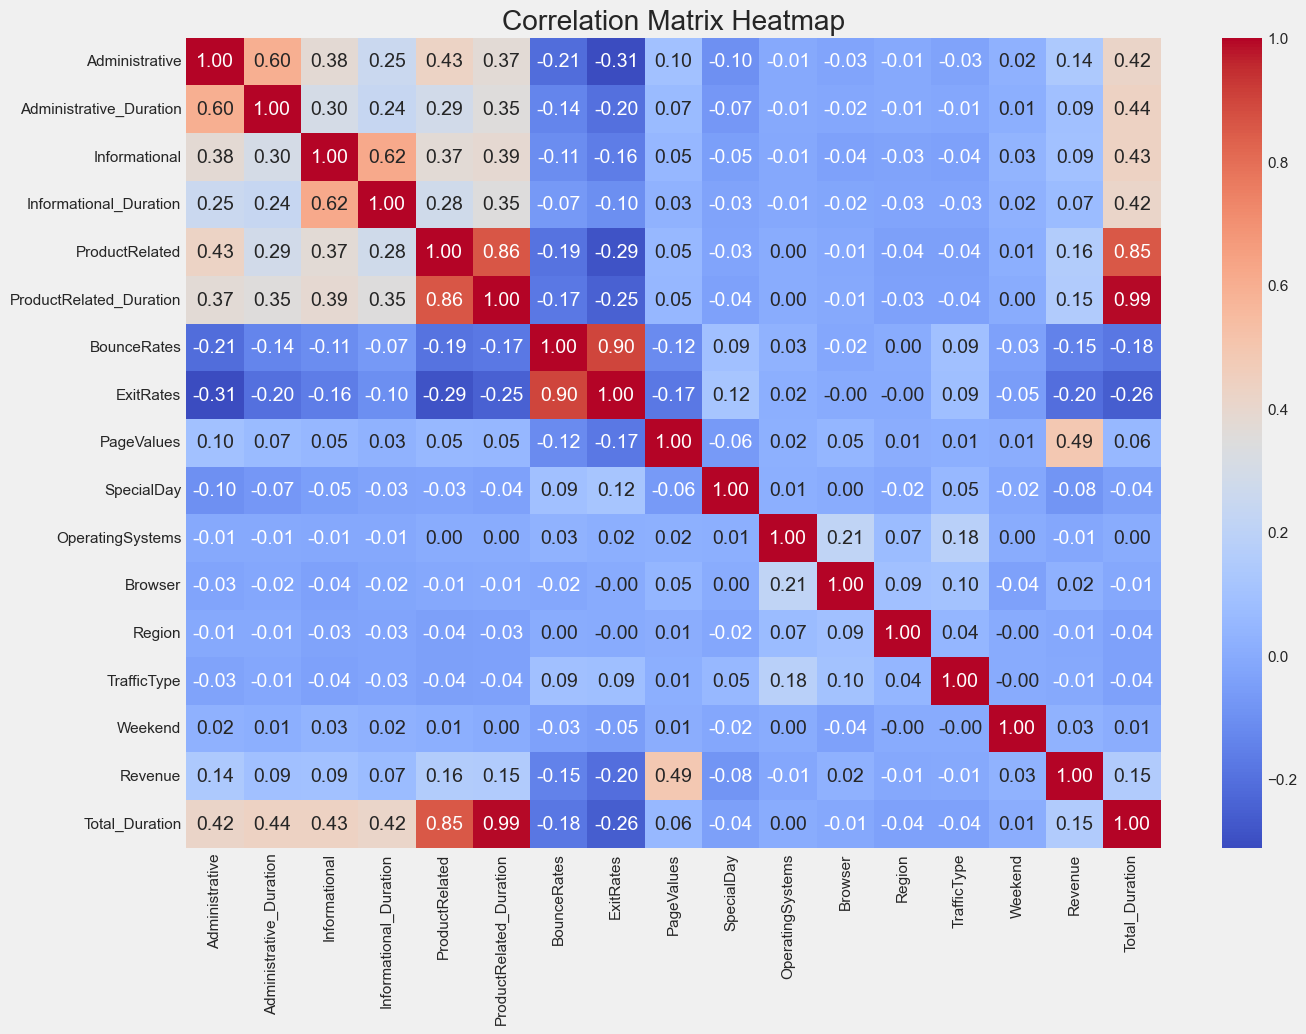

In [35]:
# Compute the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Insight about strong correlation with Revenue
##### Positive Correlation
- PageValues (0.49): is the strongest positive correlation with Revenue. Sessions that contain high page value are highly likely to create revenue.

- ProductRelated (0.16) & ProductRelated_Duration (0.15): The number of product-related pages browse and their usage time correlates positively with purchases. The more time user spend on these pages, the more opportunities of revenue creation.

##### Negative Correlation
- BounceRates (-0.15): Higher bounce rates minimized the likelihood of revenue generation. This is a typical pattern where engaged users (lower bounce rates) are more likely to make purchases.

- ExitRates (-0.10): Session with higher exit rates reduce the likelihood of revenue, result in brief sessions without any purchases.

#### Pairwise relationships:
- Administrative & Administrative_Duration (0.64), Informational & Infomational_Duration (0.30), ProductRelated & ProductRelated_Duration (0.98): The more page user visit, the more time user spend on them.
- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".
- TotalDuration & Exit Rates, TotalDuration & Bounce Rates: The negative correlation indicates that longer Total Duration reflects higher engagement of users, reducing both Exit Rates and Bounce Rates.


#### Observation 19 - Average Administrative Duration vs Revenue


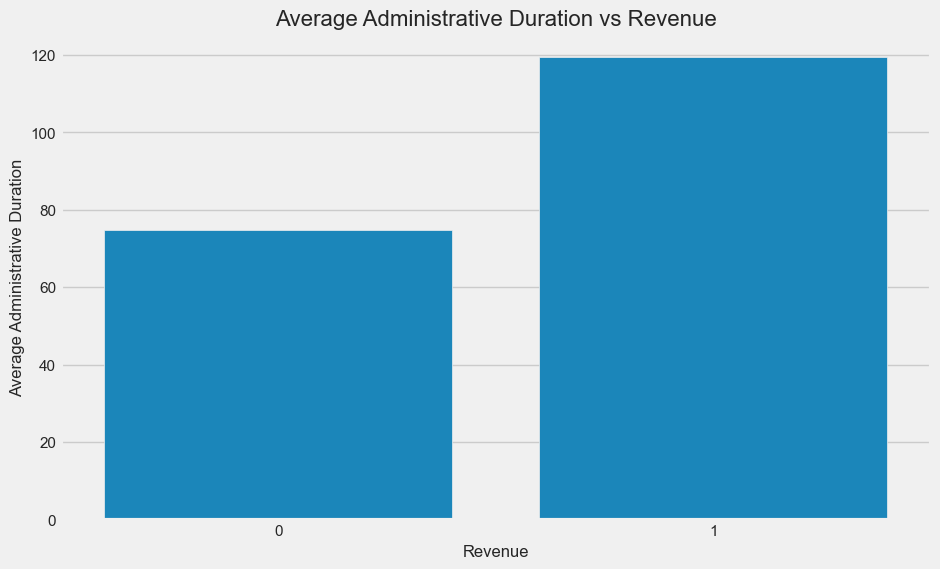

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Revenue', y='Administrative_Duration', ci=None)
plt.title('Average Administrative Duration vs Revenue', fontsize=16)
plt.ylabel('Average Administrative Duration', fontsize=12)
plt.xlabel('Revenue', fontsize=12)
plt.show()

- Higher Administrative Duration often leads to a conversion.

=> To buy a product a user may be required to log in / register an account.

#### Observation 20 - Bounce Rate vs Revenue


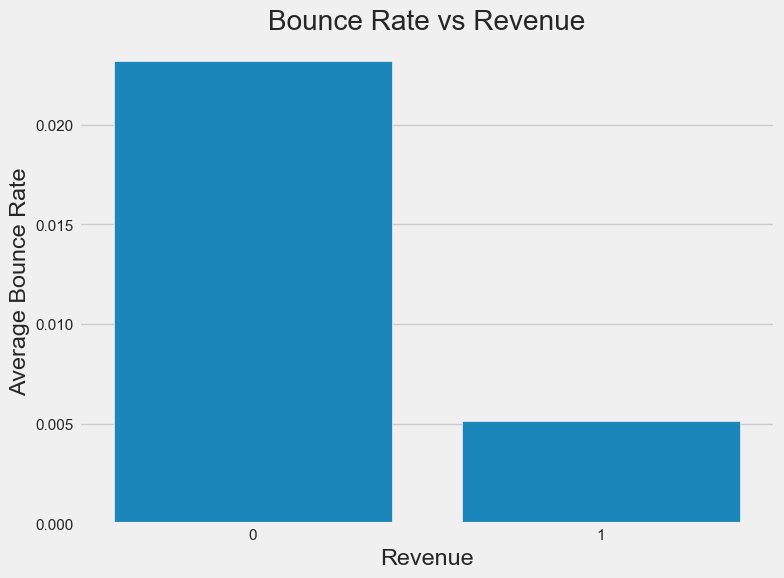

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='BounceRates', data=df, ci=None, estimator='mean')
plt.title('Bounce Rate vs Revenue')
plt.ylabel('Average Bounce Rate')
plt.xlabel('Revenue')
plt.show()

- Bounce Rate highly correlate with not buying.

=> The user might have misclicked the page and have no intention of buying

#### Observation 21 - Exit Rate vs Revenue


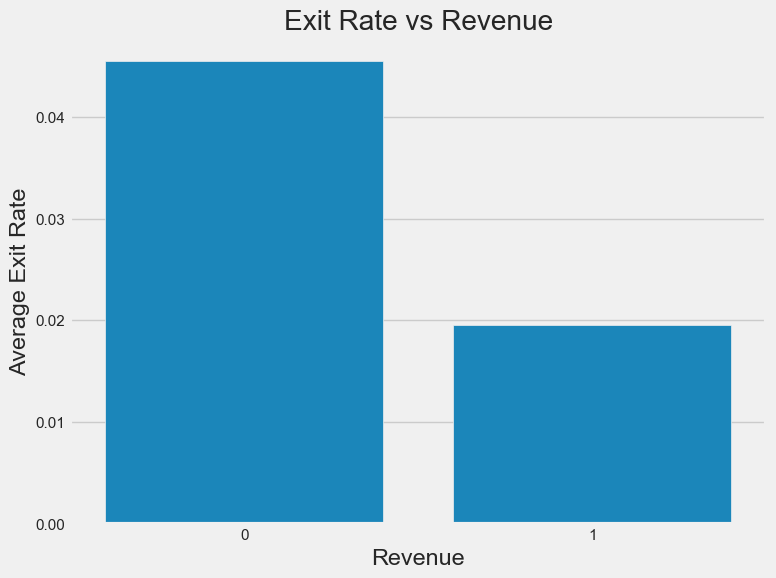

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='ExitRates', data=df, ci=None, estimator='mean')
plt.title('Exit Rate vs Revenue')
plt.ylabel('Average Exit Rate')
plt.xlabel('Revenue')
plt.show()

- Similar to Bounce Rate, but exit rate means if the user has completely close all tabs related to the e-commerce platform. Therefore, we can see that it does not affect transaction decision as much as Bounce Rate.

#### Observation 22 - Exit Rate vs Bounce Rate


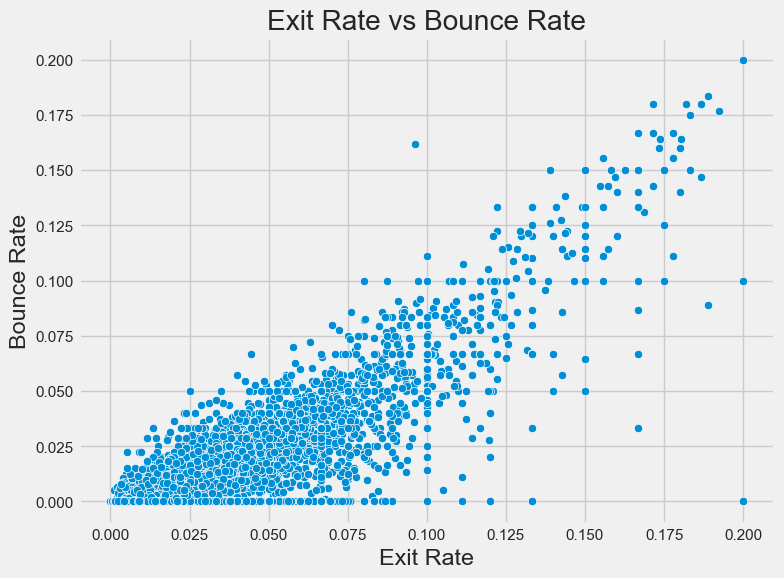

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ExitRates', y='BounceRates', data=df)
plt.title('Exit Rate vs Bounce Rate')
plt.ylabel('Bounce Rate')
plt.xlabel('Exit Rate')
plt.show()

- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".

In [40]:
# Identify outliers with extreme BounceRates and ExitRates where Revenue is True
extreme_bounce_exit = df[(df['Revenue'] == True) & 
                           ((df['BounceRates'] > 0.1) | (df['ExitRates'] > 0.1))]

extreme_bounce_exit

Administrative  Administrative_Duration  Informational  \
6348                1                      0.0              0   
6615                0                      0.0              0   
7513                0                      0.0              0   
8018                2                    256.5              0   
10430               0                      0.0              0   
10685               1                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
6348                      0.0              11                   113.80   
6615                      0.0               1                     0.00   
7513                      0.0               3                     0.00   
8018                      0.0              10                   117.25   
10430                     0.0               8                   335.25   
10685                     0.0               1                     0.00   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
6348      0.083333   0.116667         0.0         0.0   Nov                 2   
6615      0.200000   0.200000         0.0         0.0   Oct                 2   
7513      0.200000   0.200000         0.0         0.0   Nov                 3   
8018      0.110714   0.130952         0.0         0.0   Nov                 2   
10430     0.100000   0.108333         0.0         0.0   Nov                 3   
10685     0.200000   0.200000         0.0         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
6348         4       1            3  Returning_Visitor        0        1  
6615         5       1           20  Returning_Visitor        0        1  
7513         2       1           11  Returning_Visitor        0        1  
8018         2       7           11  Returning_Visitor        1        1  
10430       12       1            1  Returning_Visitor        0        1  
10685        2       3            8  Returning_Visitor        0        1

For those create revenue, have a high bounce rate and exit rate but have 0 duration of the session, consider to drop it. For those with high bounce rate and high exit rate but spend a while in product related page, keep the record.

#### Observation 23 - Page Values vs VisitorType


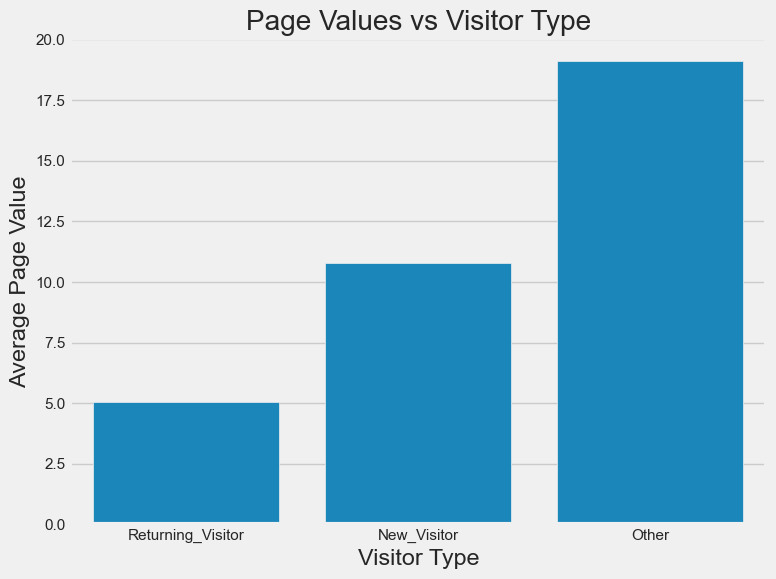

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='PageValues', data=df, ci=None, estimator='mean')
plt.title('Page Values vs Visitor Type')
plt.ylabel('Average Page Value')
plt.xlabel('Visitor Type')
plt.show()

- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.

#### Observation 24 - Special Day by Visitor Type

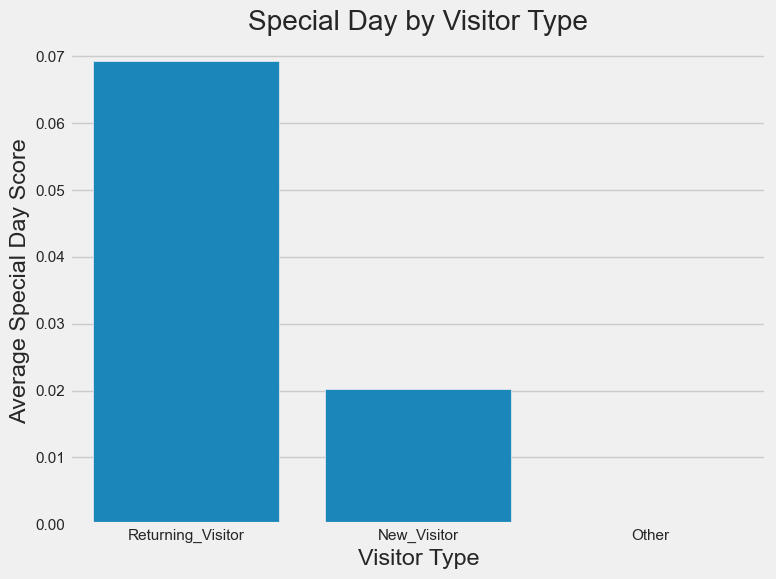

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='SpecialDay', data=df, ci=None)
plt.title('Special Day by Visitor Type')
plt.ylabel('Average Special Day Score')
plt.xlabel('Visitor Type')
plt.show()

- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.

#### Observation 25 - Special Day by month


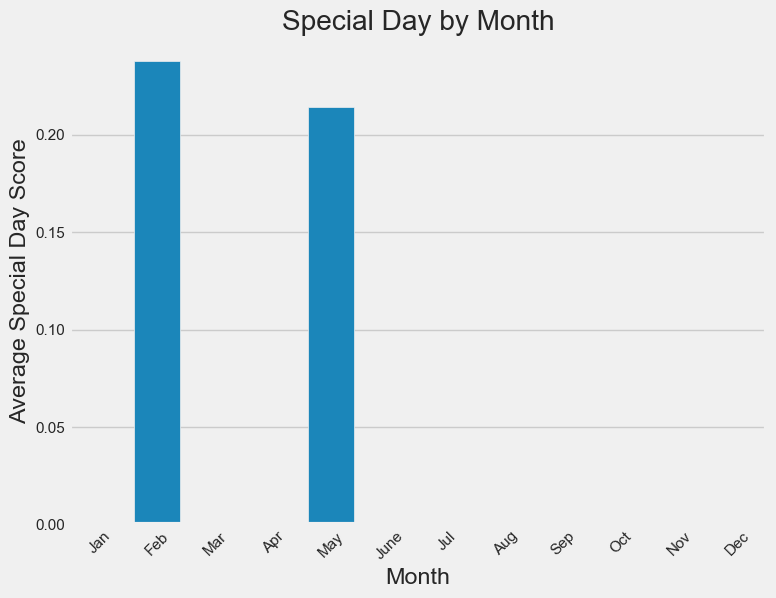

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='SpecialDay', data=df, ci=None, estimator='mean')
plt.title('Special Day by Month')
plt.ylabel('Average Special Day Score')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Grouping by Month and calculating statistics for SpecialDay
special_day_stats = df.groupby('Month')['SpecialDay'].describe()

# Display the statistics
print(special_day_stats)

        count      mean       std  min  25%  50%  75%  max
Month                                                     
Jan       0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Feb     181.0  0.237569  0.313976  0.0  0.0  0.0  0.4  1.0
Mar    1860.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Apr       0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
May    3329.0  0.214178  0.325541  0.0  0.0  0.0  0.4  1.0
June    285.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Jul     432.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Aug     433.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Sep     448.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Oct     549.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Nov    2982.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Dec    1706.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.

#### Handle Outliers

In [45]:
# Check for rows where ProductRelated or ProductRelated_Duration is 0 but Revenue is True
zero_product_related_revenue = df_copy[
    ((df_copy['Total_Duration'] == 0)) & (df_copy['Revenue'] == True)
]

zero_product_related_revenue

Administrative  Administrative_Duration  Informational  \
6615                0                      0.0              0   
7513                0                      0.0              0   
10685               1                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
6615                      0.0               1                      0.0   
7513                      0.0               3                      0.0   
10685                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
6615           0.2        0.2         0.0         0.0   Oct                 2   
7513           0.2        0.2         0.0         0.0   Nov                 3   
10685          0.2        0.2         0.0         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
6615         5       1           20  Returning_Visitor        0        1   
7513         2       1           11  Returning_Visitor        0        1   
10685        2       3            8  Returning_Visitor        0        1   

       Total_Duration  
6615              0.0  
7513              0.0  
10685             0.0

In [46]:
# Drop rows using the drop method with the specified condition
rows_to_drop = df_copy[(df_copy['Total_Duration'] == 0) & (df_copy['Revenue'] == True)].index
df_copy = df_copy.drop(index=rows_to_drop)

In [47]:
# Check the dataset size after deleting
print(f"The dataset has {df_copy.shape[0]} rows and {df_copy.shape[1]} columns")

The dataset has 12202 rows and 19 columns


**Notes**
- Consider remove Other from VisitorType
- No Informational_Duration for 0 Revenue 
- No Page_Values for 0 Revenue 
- Special Day is from 0 to 1 not 0 AND 1
- PageValues: a metric that measures how important a page is to a website's revenue
- Sum lai roi tinh => better for biased dataset


**Special observations**
- Inspect month with Revenue deeper (Maybe correlate with Special Day), e.g Nov, Dec have higher buy rates because Christmas & Black Friday & Cyber Monday, March: Women's Day
  
- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.
  
- Exit rate and BounceRate often leads to no transaction
  
- Other might be Customers using Incognito mode or have technical issues with browser or even accidental visit and the site have not finished identifying the user
  
- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.
  
- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.
  
- OS 1,2,3 and Browser 1,2 have the most entries => developers should focus on these OS and Browsers
  
- Administrative vs Revenue
  
- The higher the total duration spent on the app the higher chance they will buy sth
---
**Suggestion**
- Drop the bounce rate, since exit rate is the more general form, and using both bounce and exit rate is highly likely result in multicolinearity, and dependence of error
- Consider the "other" user type, since their proportion is extremely small (86/12330, which is < 1% of the total rows)
- One hot encoding

# Feature Engineering

## Feature transformation

### Apply Ordinal Encoding and Scaling

In [48]:
def preprocess_data_clf(df, categorical_features, numerical_features, target_variable):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target_variable]), df[target_variable], test_size=0.2, random_state=42)
    
    # Initialize encoders and scaler and transformer
    ordinal_encoder = OrdinalEncoder()
    label_encoder = LabelEncoder()
    scaler = RobustScaler()
    transformer = QuantileTransformer(output_distribution='normal')

    # Encode categorical features
    data_train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train[categorical_features]), columns=categorical_features, index=X_train.index)
    data_test_encoded = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]), columns=categorical_features, index=X_test.index)

    # Scale numerical features
    data_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
    data_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)
    
    data_train_scaled = pd.DataFrame(data=transformer.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
    data_test_scaled = pd.DataFrame(transformer.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)

    # Create copies of the original datasets
    X_train_scaled_encoded = X_train.copy()
    X_test_scaled_encoded = X_test.copy()

    # Update the copies with encoded categorical features and scaled numerical features
    X_train_scaled_encoded[categorical_features] = data_train_encoded
    X_train_scaled_encoded[numerical_features] = data_train_scaled
    X_test_scaled_encoded[categorical_features] = data_test_encoded
    X_test_scaled_encoded[numerical_features] = data_test_scaled

    # Encode the target variable
    y_train_encoded = pd.DataFrame(label_encoder.fit_transform(np.array(y_train).reshape(-1, 1)), columns=[target_variable])
    y_test_encoded = pd.DataFrame(label_encoder.transform(np.array(y_test).reshape(-1, 1)), columns=[target_variable])

    return X_train_scaled_encoded, X_test_scaled_encoded, y_train_encoded, y_test_encoded

In [49]:
def preprocess_data_reg(df, categorical_features, numerical_features, target_variable):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target_variable]), df[target_variable], test_size=0.2, random_state=42)
    
    # Initialize encoders and scaler and transformer
    ordinal_encoder = OrdinalEncoder()
    scaler = RobustScaler()
    transformer = QuantileTransformer(output_distribution='normal')

    # Encode categorical features
    data_train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train[categorical_features]), columns=categorical_features, index=X_train.index)
    data_test_encoded = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]), columns=categorical_features, index=X_test.index)

    # Scale numerical features
    data_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
    data_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)

    data_train_scaled = pd.DataFrame(transformer.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
    data_test_scaled = pd.DataFrame(transformer.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)

    # Create copies of the original datasets
    X_train_scaled_encoded = X_train.copy()
    X_test_scaled_encoded = X_test.copy()

    # Update the copies with encoded categorical features and scaled numerical features
    X_train_scaled_encoded[categorical_features] = data_train_encoded
    X_train_scaled_encoded[numerical_features] = data_train_scaled
    X_test_scaled_encoded[categorical_features] = data_test_encoded
    X_test_scaled_encoded[numerical_features] = data_test_scaled

    return X_train_scaled_encoded, X_test_scaled_encoded, y_train, y_test

Spliting and preprocessing the dataset

In [50]:
categorical_features = ['Month', 'VisitorType', 'Weekend']
numerical_features = ['Administrative','Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Total_Duration']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = preprocess_data_clf(df_copy, categorical_features, numerical_features, 'Revenue')

In [51]:
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']
numerical_features = ['Administrative','Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Total_Duration']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = preprocess_data_reg(df_copy, categorical_features, numerical_features, 'ProductRelated_Duration')

## **Feature Selection**

### **Supervised Learning**

#### **Filter-based method**

##### ***Task 1: Classification***

***Variance Threshold***

In [52]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error

def variance_threshold_feature_selection(X, y, thresholds ,problem_type):
    # Store results
    results = []
    selected_features_list = []

    # Test each threshold
    for threshold in thresholds:
        # Apply Variance Threshold
        selector = VarianceThreshold(threshold=threshold)
        X_selected = selector.fit_transform(X)
        
        # Get the selected features
        selected_features = X.columns[selector.get_support()]
        selected_features_list.append(selected_features)
        
        # Train a model with selected features
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        if problem_type == 'classification':
            model = RandomForestClassifier(random_state=42)
        elif problem_type == 'regression':
            model = RandomForestRegressor(random_state=42)
        else:
            raise ValueError("Invalid problem type. Choose 'classification' or 'regression'.")
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluate model
        if problem_type == 'classification':
            metric = accuracy_score(y_test, y_pred)
        else:
            metric = mean_squared_error(y_test, y_pred)
        
        results.append(metric)
    
    return results, selected_features_list

In [53]:
def plot_vt(thresholds, results, best_threshold):
    plt.figure(figsize=(12, 8))
    plt.plot(thresholds, results, marker='o', linestyle='-', color='b')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
    plt.xlabel('Variance Threshold')
    plt.ylabel('Model Accuracy')
    plt.title('Model Accuracy vs. Variance Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

In [54]:
thresholds = np.arange(0, .5, 0.01)

In [55]:
# Find the best threshold and corresponding features
vt_result_clf, selected_features_clf = variance_threshold_feature_selection(X_train_clf, y_train_clf, thresholds ,"classification")

best_threshold_clf = thresholds[np.argmax(a=vt_result_clf)]
best_features_clf = selected_features_clf[np.argmax(vt_result_clf)]
best_accuracy_clf = np.max(vt_result_clf)

print(f"Best Threshold: {best_threshold_clf}")
print(f"Best Accuracy: {best_accuracy_clf}")
print(f"Selected Features at Best Threshold: {best_features_clf}")

Best Threshold: 0.04
Best Accuracy: 0.9083461341525858
Selected Features at Best Threshold: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend',
       'Total_Duration'],
      dtype='object')


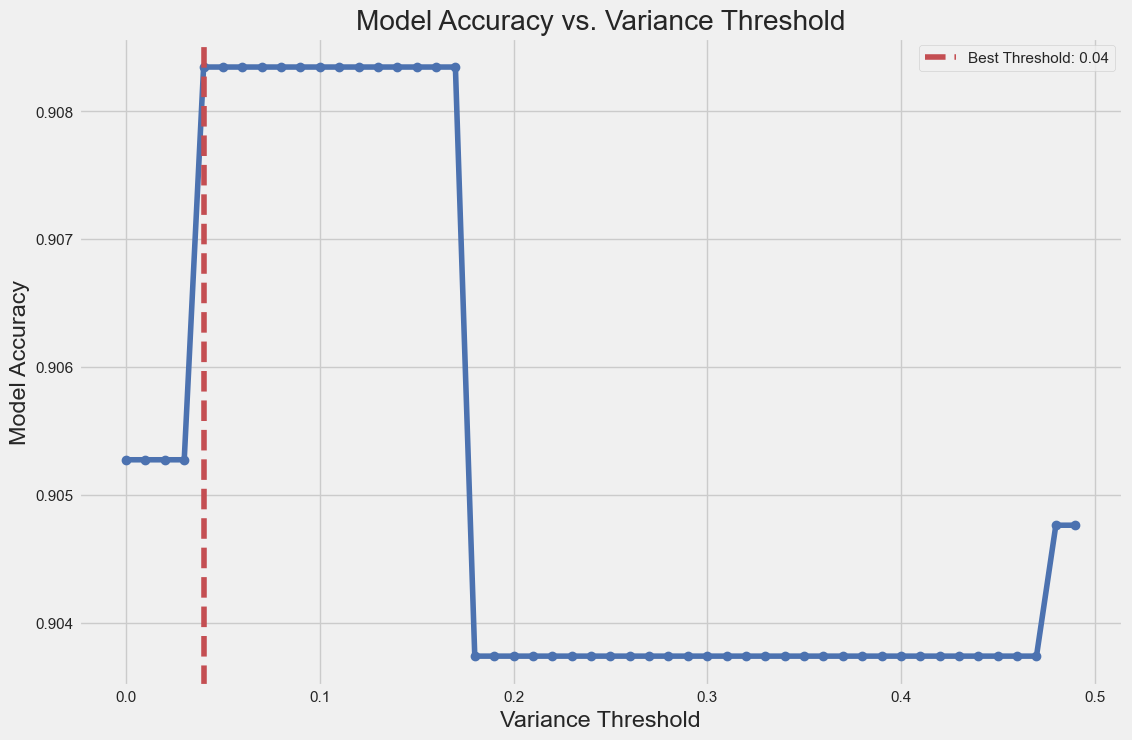

In [56]:
plot_vt(thresholds=thresholds, results=vt_result_clf, best_threshold=best_threshold_clf)

#### ***Task 2: Regression***

In [59]:
# Find the best threshold and corresponding features
vt_result_reg, selected_features_reg = variance_threshold_feature_selection(X_train_reg, y_train_reg, thresholds ,"regression")

best_threshold_reg = thresholds[np.argmax(a=vt_result_reg)]
best_features_reg = selected_features_clf[np.argmax(vt_result_reg)]
best_accuracy_reg = np.max(vt_result_reg)

print(f"Best Threshold: {best_threshold_reg}")
print(f"Best Accuracy (MSE): {best_accuracy_reg}")
print(f"Selected Features at Best Threshold: {best_features_reg}")

Best Threshold: 0.18
Best Accuracy (MSE): 16488.792255952678
Selected Features at Best Threshold: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Total_Duration'],
      dtype='object')


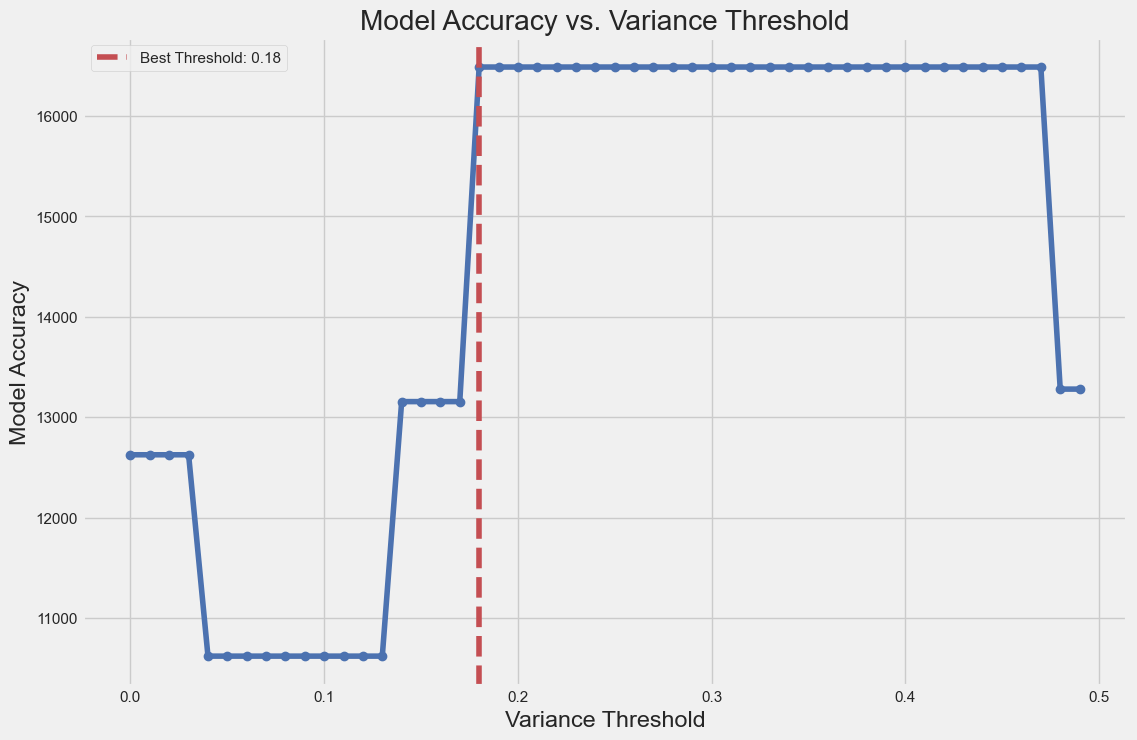

In [60]:
plot_vt(thresholds=thresholds, results=vt_result_reg, best_threshold=best_threshold_reg)

The selected threshold is 0.18, yeild the best accuracy of 0.905, and the selected features are:
- **Administrative**
- **Administrative_Duration**
- **Informational**
- **Informational_Duration**
- **ProductRelated**
- **ProductRelated_Duration**
- **PageValues**
- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Total_Duration**

#### ***Pearson Correlation***

In [61]:
def pearson_correlation_feature_selection(X, correlation_threshold=0.75):
    # Calculate correlation matrix
    correlation_matrix = X.corr()
    
    # Find highly correlated pairs
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i,j] > correlation_threshold:
                corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i,j]
                ))
    
    # Identify features to drop based on variance
    features_to_drop = []
    for feat1, feat2, _ in corr_pairs:
        if feat1 != feat2:
            if X[feat1].var() < X[feat2].var():
                features_to_drop.append(feat1)
            else:
                features_to_drop.append(feat2)
    
    # Remove duplicates from features to drop
    features_to_drop = list(set(features_to_drop))
    
    # Select features
    selected_features = X.columns[~np.isin(X.columns, features_to_drop)].tolist()
    
    return selected_features, features_to_drop, corr_pairs

##### ***Task1: Classification***

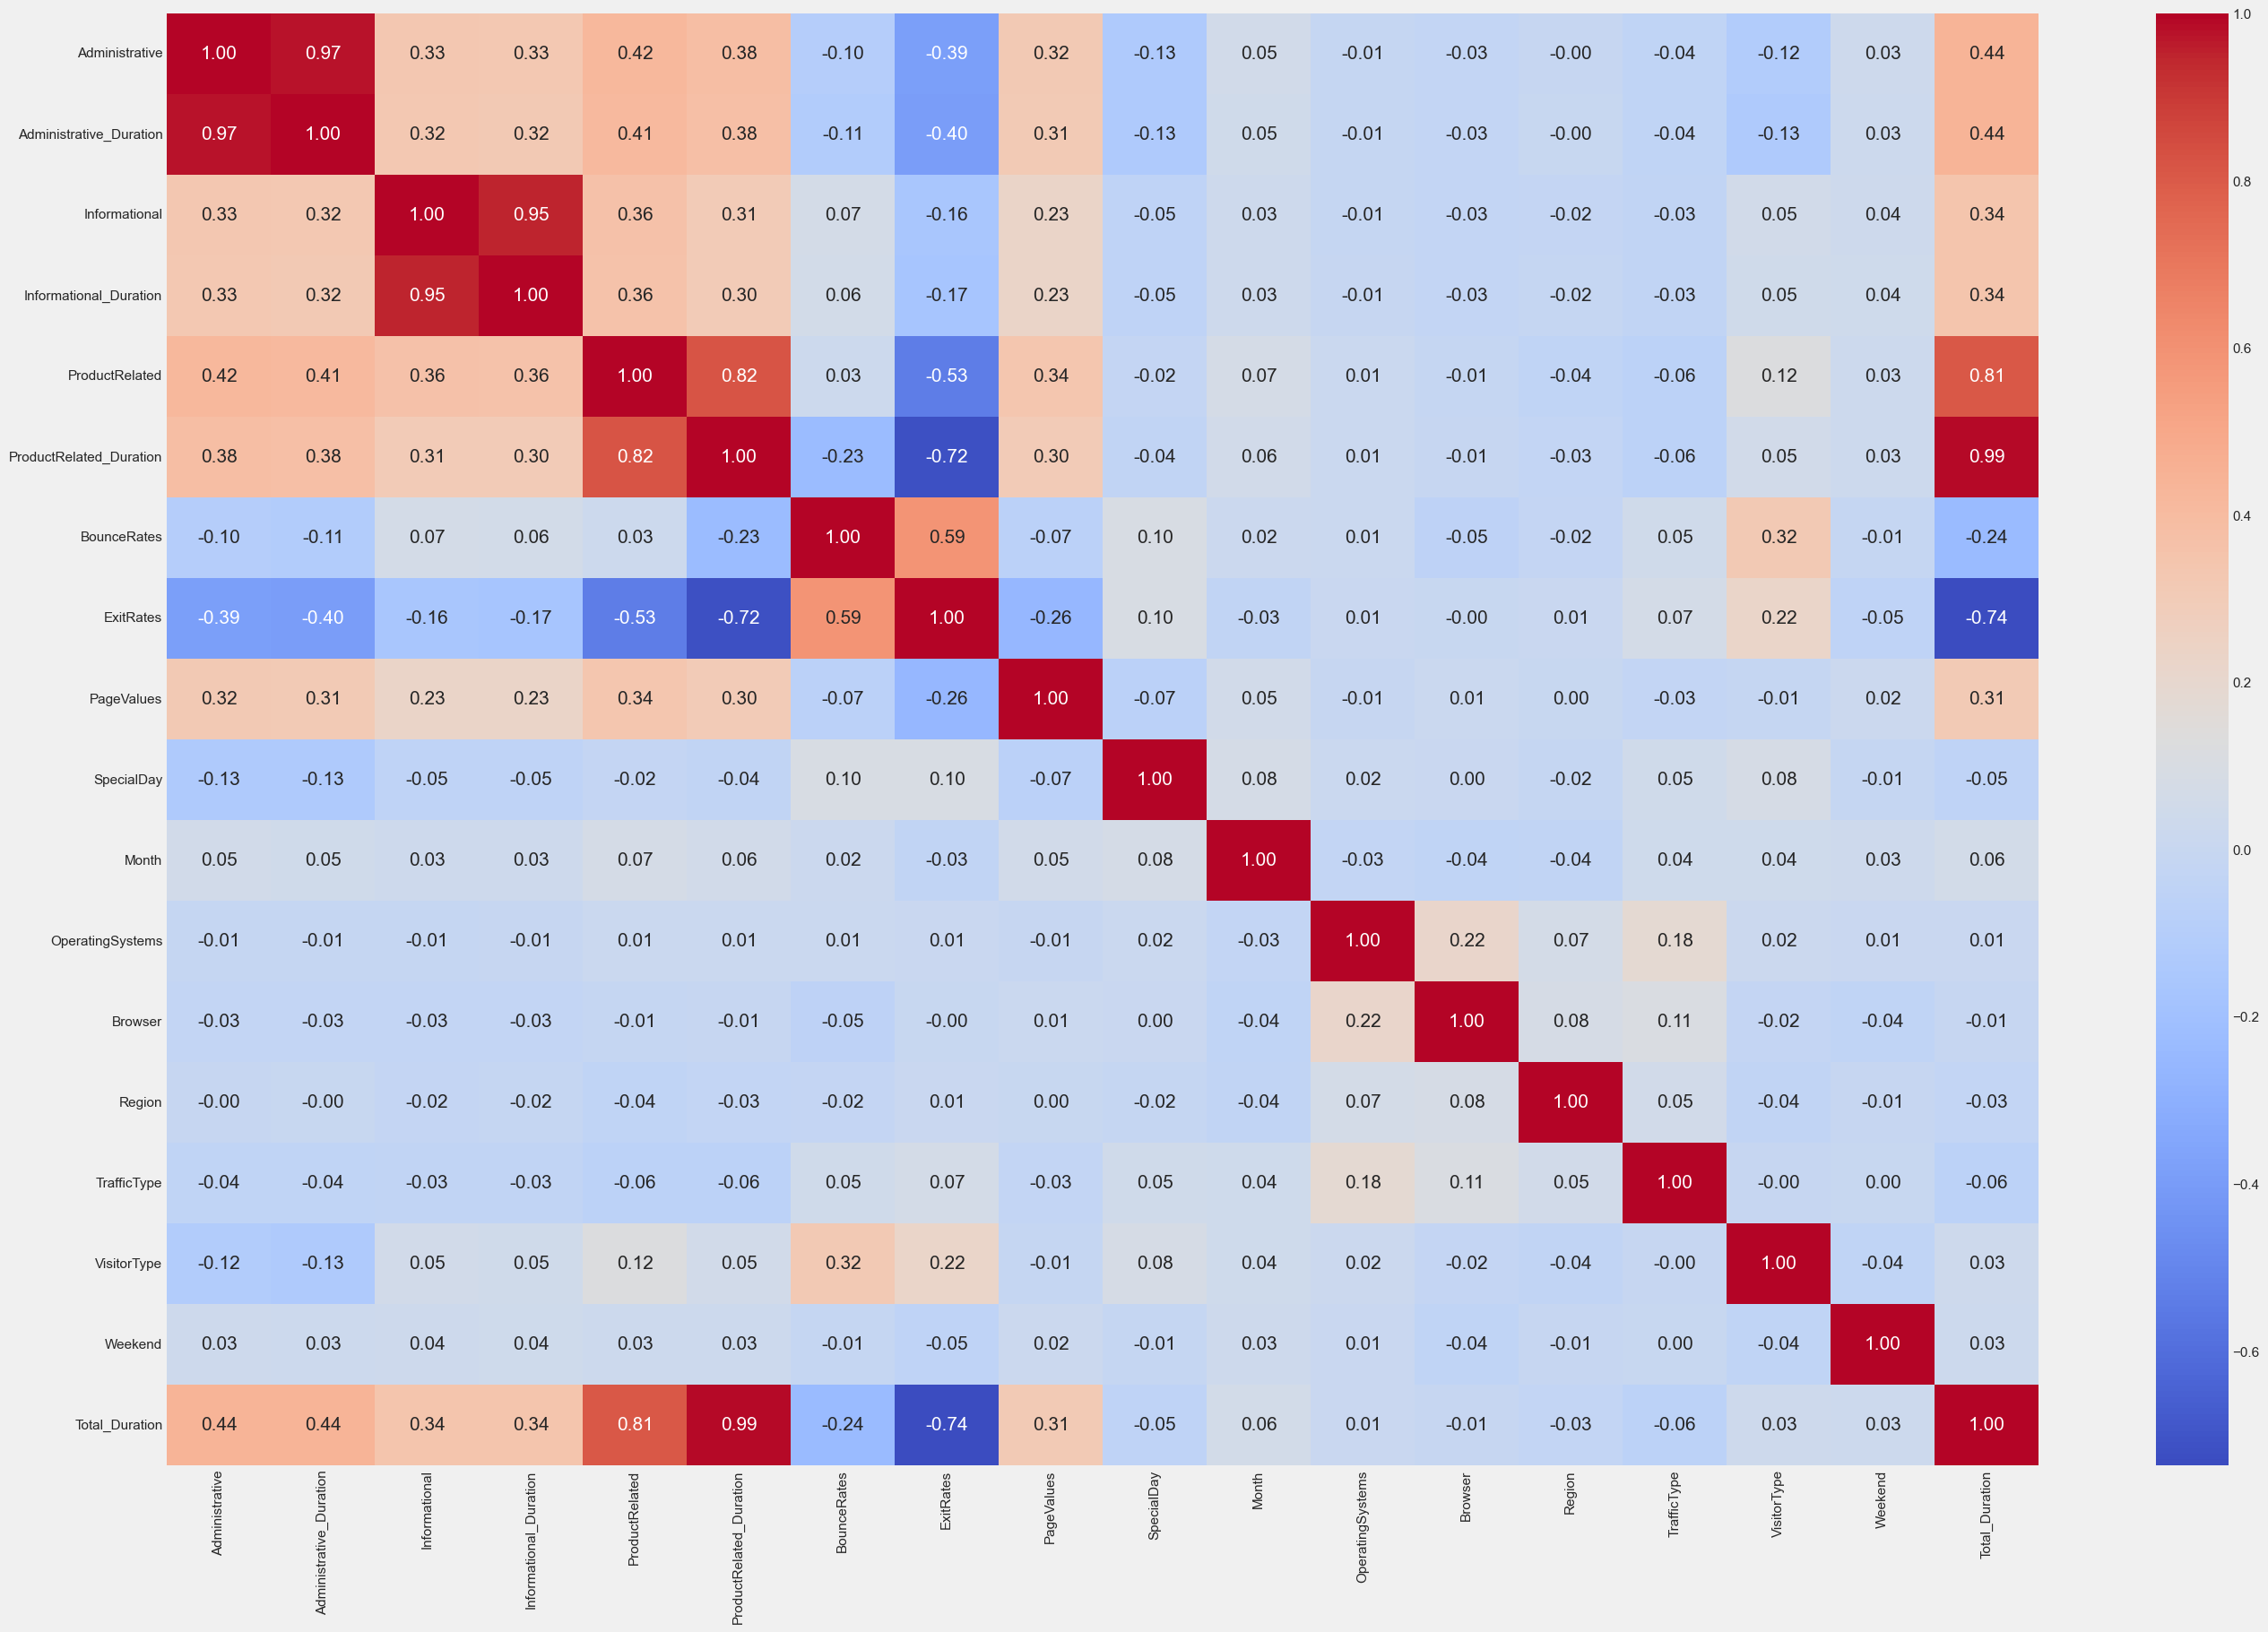

In [62]:
# Get the correlation matrix
correlation_matrix_clf = X_train_clf.corr()

plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix_clf, annot=True,fmt='.2f',annot_kws=dict(size=15),cmap='coolwarm')
plt.show()

In [63]:
selected_features_clf, dropped_features_clf, correlation_pairs_clf = pearson_correlation_feature_selection(X_train_clf, 0.75)
print(f"Correlation pairs: \n {correlation_pairs_clf} \n")
print(f"Dropped features: \n {dropped_features_clf} \n")
print(f"Selected features: \n {selected_features_clf}\n")

Correlation pairs: 
 [('Administrative_Duration', 'Administrative', 0.9747478563976786), ('Informational_Duration', 'Informational', 0.9472916940651559), ('ProductRelated_Duration', 'ProductRelated', 0.8235410155839965), ('Total_Duration', 'ProductRelated', 0.806220194067564), ('Total_Duration', 'ProductRelated_Duration', 0.986584230911832)] 

Dropped features: 
 ['Informational_Duration', 'Administrative', 'Total_Duration', 'ProductRelated'] 

Selected features: 
 ['Administrative_Duration', 'Informational', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']



In [64]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clf[selected_features_clf], y_train_clf)
y_pred = rfc.predict(X_test_clf[selected_features_clf])

accuracy = accuracy_score(y_test_clf, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9098730028676771


With the Pearson Correlation method, the selected features are:
- **Administrative**
- **Informational_Duration**
- **ProductRelated**
- **ExitRates**
- **PageValues**
- **SpecialDay**
- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Weekend**
- **Total_Duration**

And the accuracy is 0.91

##### ***Task2: Regresison***

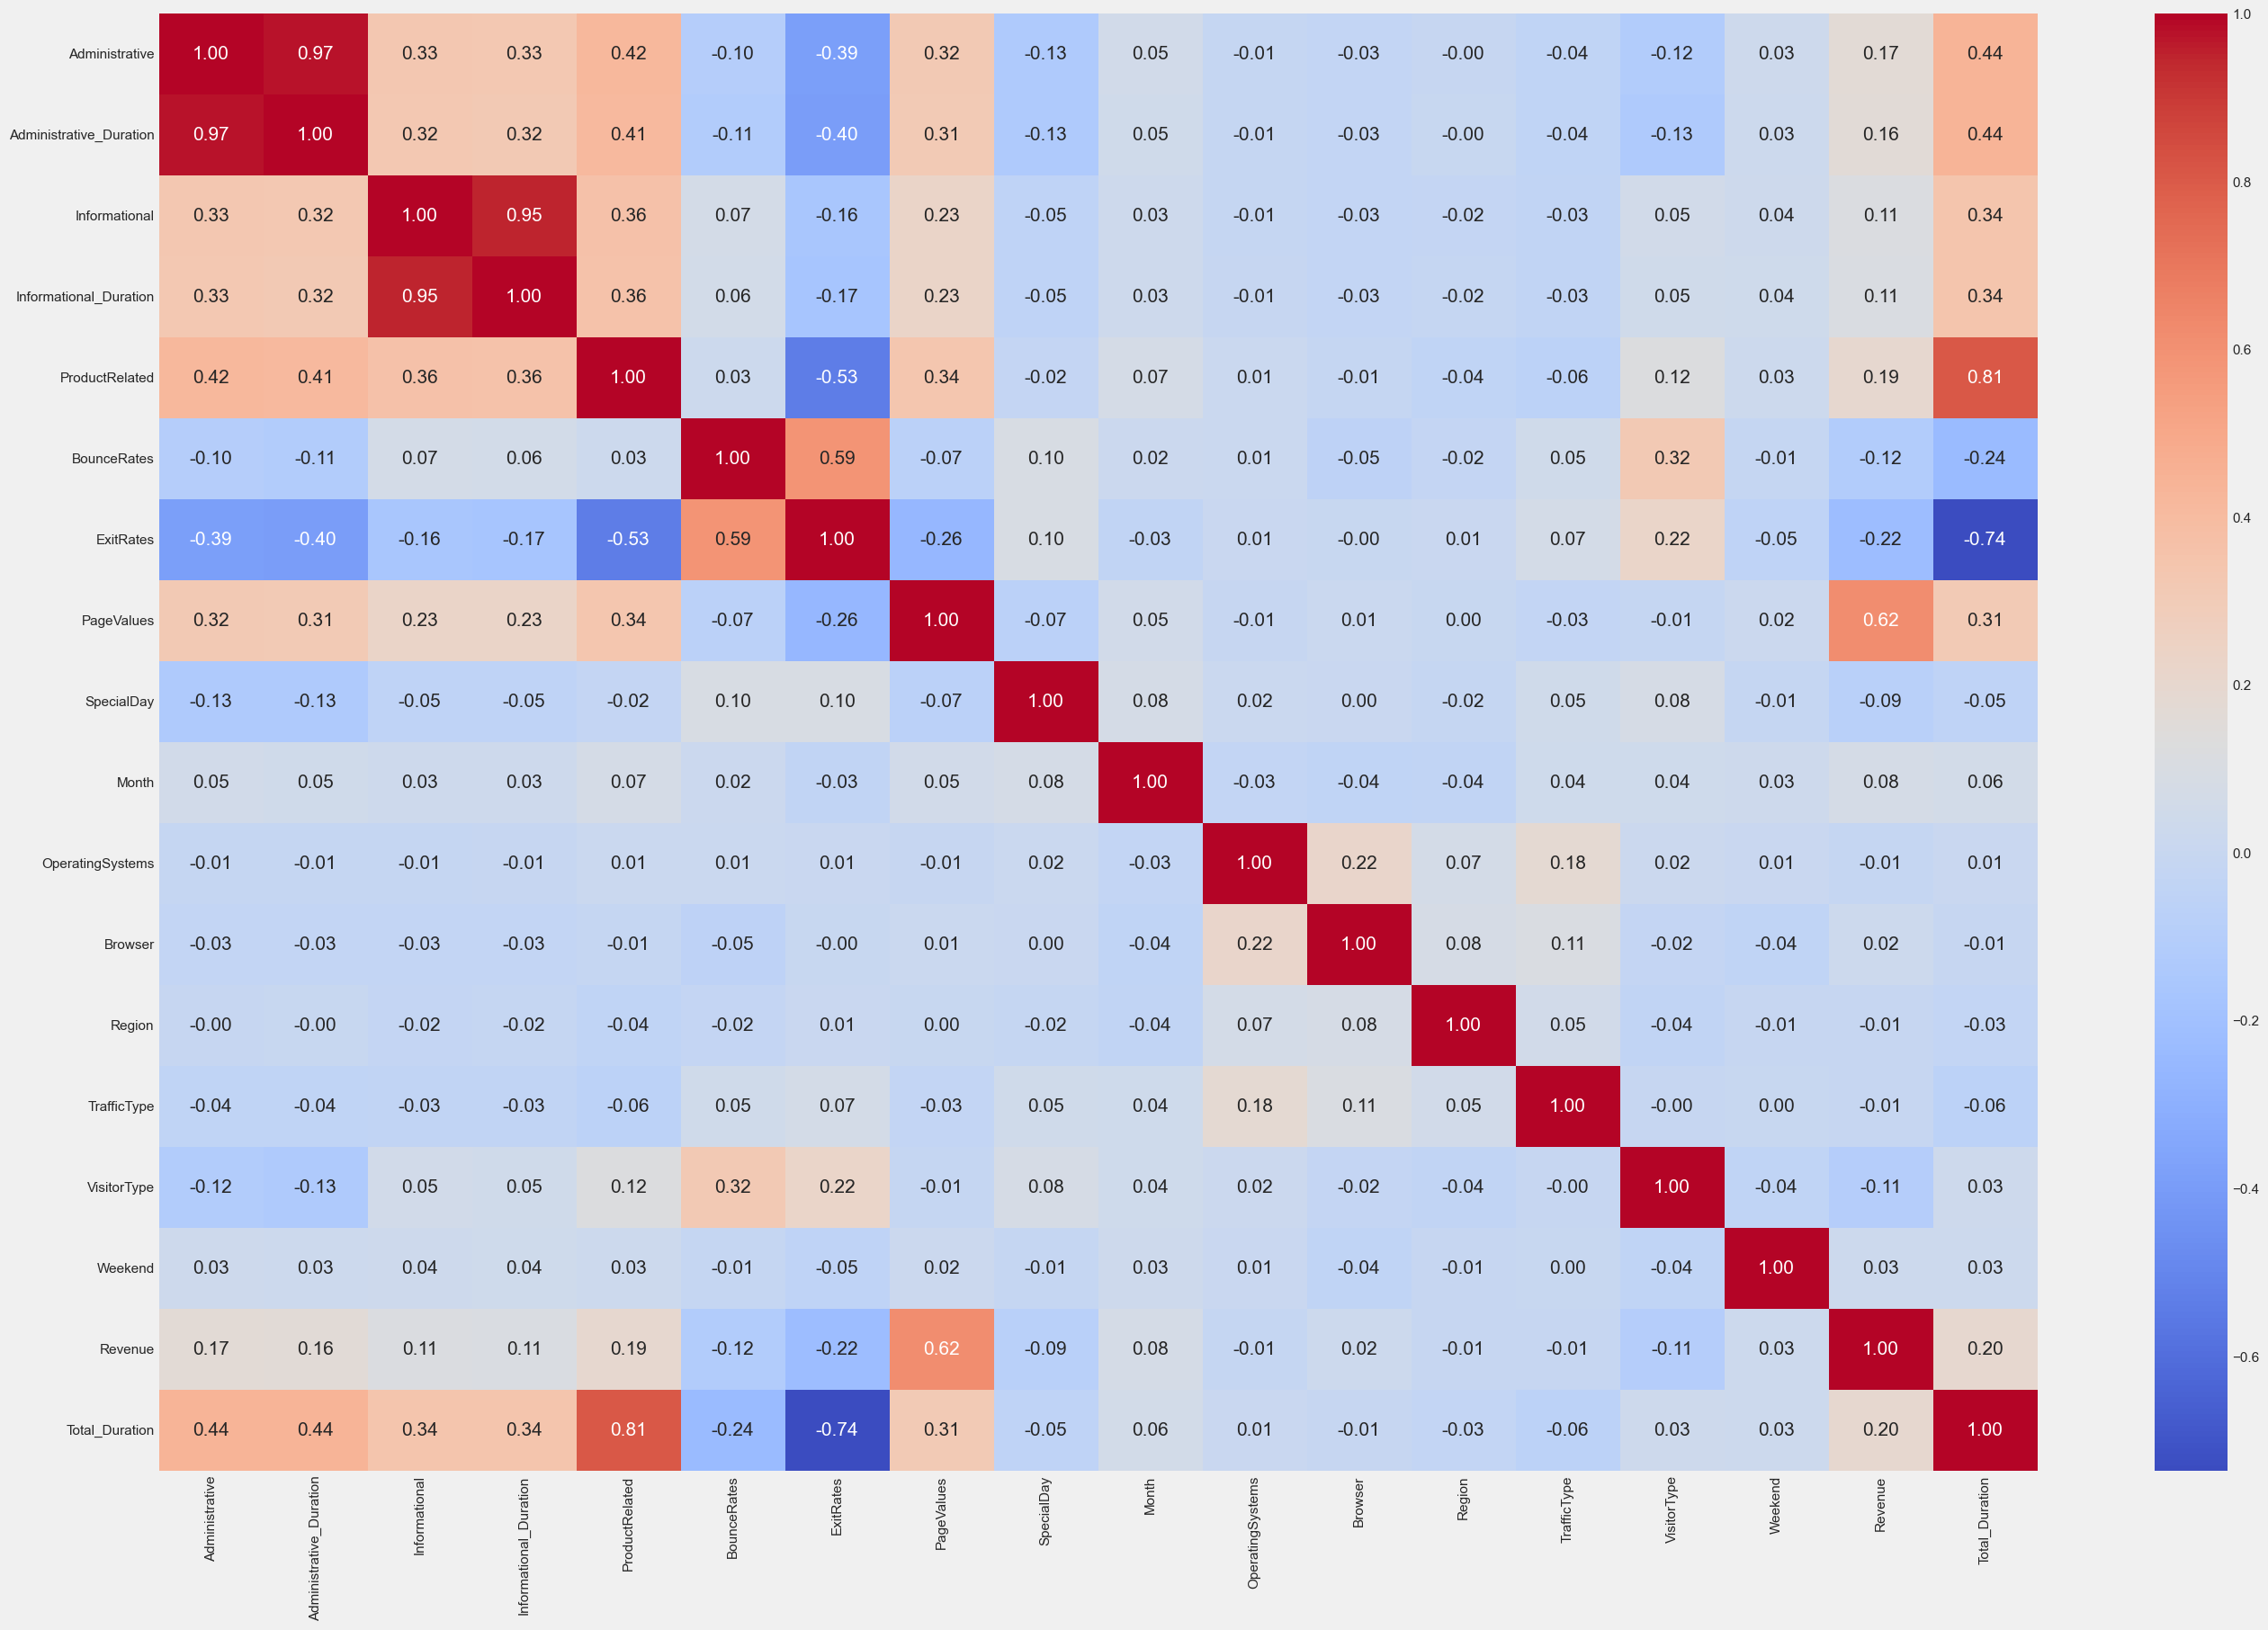

In [65]:
# Get the correlation matrix
correlation_matrix_reg = X_train_reg.corr()

plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix_reg,annot=True,fmt='.2f',annot_kws=dict(size=15),cmap='coolwarm')
plt.show()

In [66]:
selected_features_reg, dropped_features_reg, correlation_pairs_reg = pearson_correlation_feature_selection(X_train_reg, 0.75)
print(f"Correlation pairs: \n {correlation_pairs_reg} \n")
print(f"Dropped features: \n {dropped_features_reg} \n")
print(f"Selected features: \n {selected_features_reg}\n")

Correlation pairs: 
 [('Administrative_Duration', 'Administrative', 0.9747478563976786), ('Informational_Duration', 'Informational', 0.9472916940651559), ('Total_Duration', 'ProductRelated', 0.806220194067564)] 

Dropped features: 
 ['Informational_Duration', 'Administrative', 'ProductRelated'] 

Selected features: 
 ['Administrative_Duration', 'Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'Total_Duration']



In [67]:
rfg = RandomForestRegressor(random_state=42)
rfg.fit(X_train_reg[selected_features_reg], y_train_reg)
y_pred = rfg.predict(X_test_reg[selected_features_reg])

mse = mean_squared_error(y_test_reg, y_pred)
print(f"Accuracy (MSE): {mse}")

Accuracy (MSE): 19324.95427737327


#### ***Mutual Information***

In [68]:
def mutual_information_feature_selection(X, y, n_features=10, problem_type=None):
    # Calculate mutual information
    mutual_info = 0
    if problem_type == 'classification':
        mutual_info = mutual_info_classif(X, y)
    else:
        mutual_info = mutual_info_regression(X, y)
    
    # Rank features by mutual information
    mi_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
    
    # Select top N features
    top_features = mi_scores.head(n_features).index.tolist()
    
    return top_features, mi_scores

##### ***Task 1:Classification***

In [69]:
# Select top 10 features
top_features_mi_clf, mi_scores_clf = mutual_information_feature_selection(X_train_clf, y_train_clf, problem_type="classification")
print("Top 10 Features (Mutual Information):")
print(top_features_mi_clf)

Top 10 Features (Mutual Information):
['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Total_Duration', 'ProductRelated', 'BounceRates', 'Month', 'Administrative', 'Administrative_Duration', 'TrafficType']


In [70]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clf[top_features_mi_clf], y_train_clf)
y_pred = rfc.predict(X_test_clf[top_features_mi_clf])

accuracy = accuracy_score(y_test_clf, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9139696845555101


With the Mutual Information method, the selected features are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **Month**
- **ProductRelated**
- **Administrative_Duration**
- **Administrative**
- **TrafficType**

And the accuracy is **0.914**

##### ***Task 2:Regression***

In [71]:
# Select top 10 features
top_features_mi_reg, mi_scores_reg = mutual_information_feature_selection(X_train_reg, y_train_reg, problem_type="regression")
print("Top 10 Features (Mutual Information):")
print(top_features_mi_reg)

Top 10 Features (Mutual Information):
['Total_Duration', 'ProductRelated', 'ExitRates', 'BounceRates', 'Administrative', 'Administrative_Duration', 'PageValues', 'Informational', 'Informational_Duration', 'Revenue']


In [72]:
rfg = RandomForestRegressor(random_state=42)
rfg.fit(X_train_reg[top_features_mi_reg], y_train_reg)
y_pred = rfg.predict(X_test_reg[top_features_mi_reg])

mse = mean_squared_error(y_test_reg, y_pred)
print(f"MSE: {mse}")

MSE: 9781.481627471143


#### ***Conclusion***
- The Variance Threshold method is the worst method to select features, yielding the lowest accuracy of **0.897**
- The Pearson Correlation method is the second best method to select features, yielding the second highest accuracy of **0.909**
- The Mutual Information method is the second best method to select features, yielding the highest accuracy of **0.915**

Therefore, the we will select the features from the Mutual Information method since it yields the highest accuracy of **0.915**.

The selected features for Filter-based method are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **ProductRelated**
- **Month**
- **Administrative**
- **Administrative_Duration**
- **TrafficType**


### Embedding-based method

In [74]:
def lasso_feature_selection(X, y, alpha=0.01, threshold=1e-5):
    # Initialize and train Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    
    # Get feature coefficients
    coef_series = pd.Series(lasso.coef_, index=X.columns)
    
    # Select features with non-zero coefficients
    selected_features = coef_series[abs(coef_series) > threshold].index.tolist()
    
    df_coeff = pd.DataFrame({"features":X.columns,"coeff":coef_series.values})
    df_coeff.sort_values("coeff", inplace=True)
    
    return selected_features, coef_series, df_coeff

#### ***Lasso L1 Regularization***

##### ***Task 1: Classification***

In [75]:
selected_features_l1_clf, coef_series_clf, coef_df_clf = lasso_feature_selection(X_train_clf, y_train_clf)
print(f"Selected features: \n {selected_features_l1_clf}\n")
print(f"Coef serires: \n {coef_df_clf}\n")

Selected features: 
 ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month', 'TrafficType', 'VisitorType']

Coef serires: 
                    features     coeff
15              VisitorType -0.023602
7                 ExitRates -0.005273
6               BounceRates -0.005022
1   Administrative_Duration -0.004112
3    Informational_Duration -0.001504
0            Administrative -0.000000
13                   Region -0.000000
12                  Browser  0.000000
11         OperatingSystems -0.000000
17           Total_Duration -0.000000
16                  Weekend  0.000000
5   ProductRelated_Duration -0.000000
4            ProductRelated -0.000000
2             Informational -0.000000
9                SpecialDay -0.000000
14              TrafficType  0.000356
10                    Month  0.005715
8                PageValues  0.081347



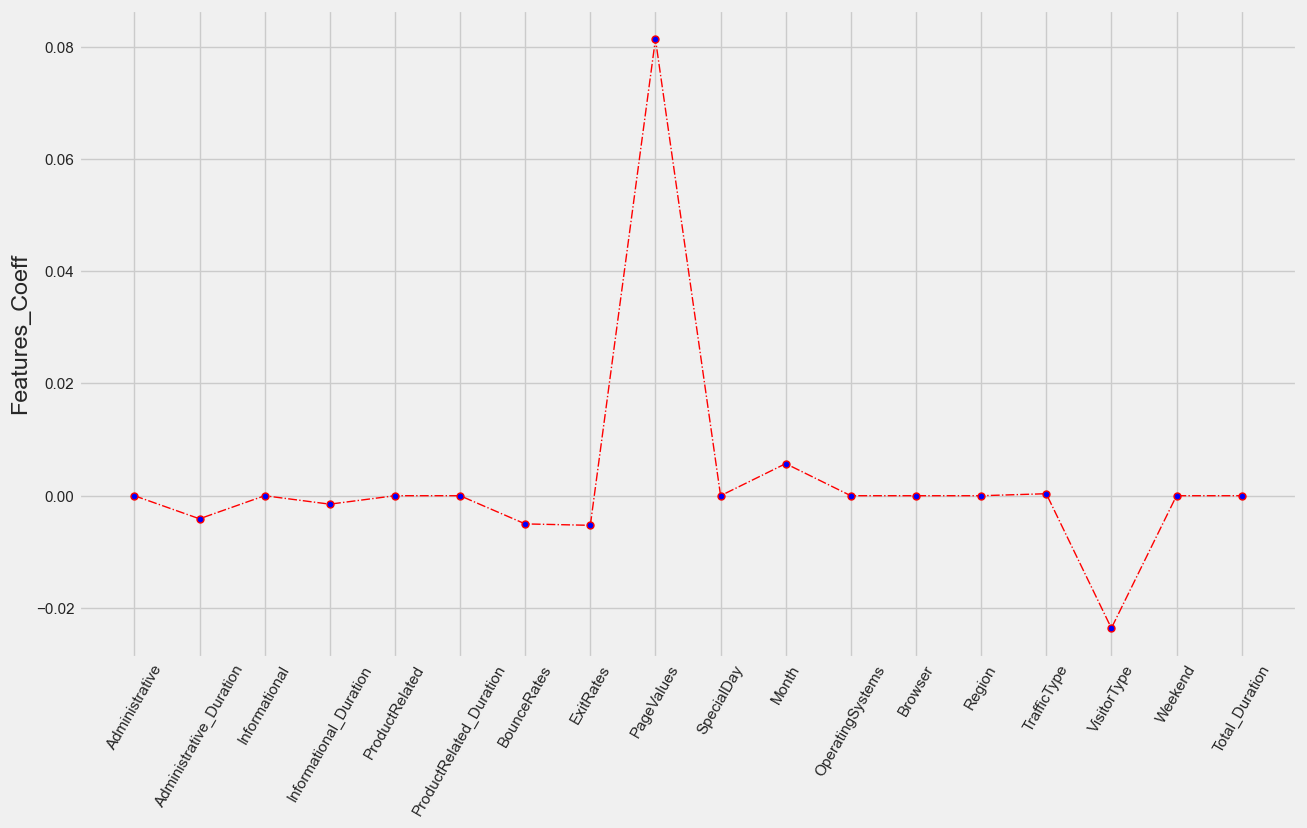

In [76]:
# Lets plot the coeff with features
plt.figure(figsize=(14,8))
plt.plot(range(len(X_train_clf.columns)), coef_series_clf, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(X_train_clf.columns)),X_train_clf.columns,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<Axes: xlabel='features', ylabel='coeff'>

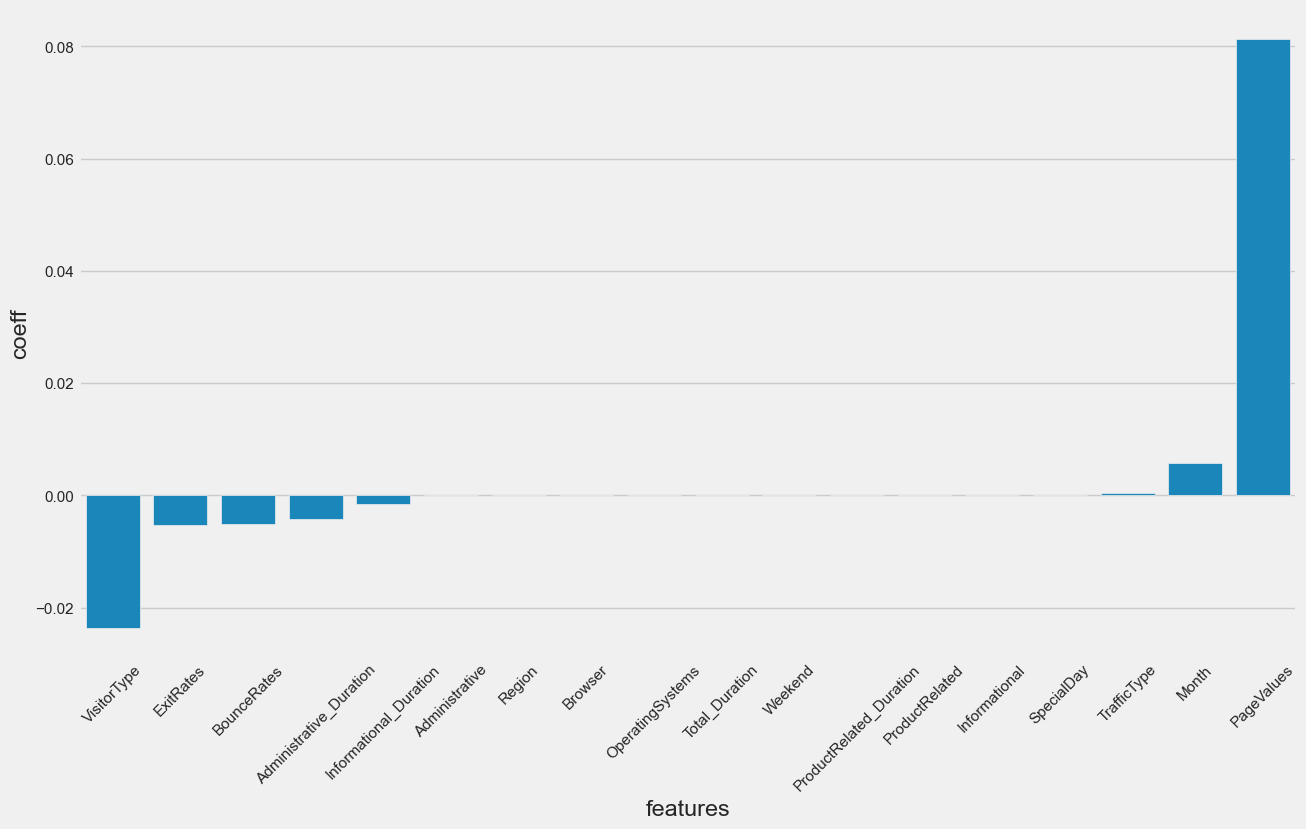

In [77]:
# Use Bar chart to show coeff
plt.figure(figsize=(14,8))
# plot the feature coeff in bars.
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=coef_df_clf)

In [78]:
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_clf[selected_features_l1_clf], y_train_clf)
etc.fit(X_train_clf[selected_features_l1_clf], y_train_clf)
gbc.fit(X_train_clf[selected_features_l1_clf], y_train_clf)
dtc.fit(X_train_clf[selected_features_l1_clf], y_train_clf)

accuracy_rfc = accuracy_score(y_test_clf, rfc.predict(X_test_clf[selected_features_l1_clf]))
accuracy_etc = accuracy_score(y_test_clf, etc.predict(X_test_clf[selected_features_l1_clf]))
accuracy_gbc = accuracy_score(y_test_clf, gbc.predict(X_test_clf[selected_features_l1_clf]))
accuracy_dtc = accuracy_score(y_test_clf, dtc.predict(X_test_clf[selected_features_l1_clf]))

print(f"Accuracy of Random Forest: {accuracy_rfc}")
print(f"Accuracy of Extra Trees: {accuracy_etc}")
print(f"Accuracy of Gradient Boosting: {accuracy_gbc}")
print(f"Accuracy of Decision Tree: {accuracy_dtc}")

Accuracy of Random Forest: 0.9033183121671446
Accuracy of Extra Trees: 0.891028267103646
Accuracy of Gradient Boosting: 0.9139696845555101
Accuracy of Decision Tree: 0.8684965178205654


Selected features from Lasso L1 Regularization are:
- **VisitorType**
- **Total_Duration**
- **Informational_Duration**
- **ProductRelated_Duration**
- **Administrative**
- **Month**
- **PageValues**
- **ProductRelated**


##### ***Task 2: Regression***

In [79]:
selected_features_l1_reg, coef_series_reg, coef_df_reg = lasso_feature_selection(X_train_reg, y_train_reg, alpha=10)
print(f"Selected features: \n {selected_features_l1_reg}\n")
print(f"Coef serires: \n {coef_df_reg}\n")

Selected features: 
 ['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Revenue', 'Total_Duration']

Coef serires: 
                    features       coeff
14              VisitorType -102.053845
8                SpecialDay -100.853429
5               BounceRates  -19.245279
12                   Region   -5.737976
13              TrafficType   -0.786978
15                  Weekend   -0.000000
10         OperatingSystems   -0.000000
0            Administrative   -0.000000
2             Informational   -0.000000
11                  Browser    2.909790
1   Administrative_Duration    5.206513
9                     Month    7.703543
7                PageValues   20.908621
16                  Revenue   44.936130
3    Informational_Duration   55.798776
6                 ExitRates  592.672088
17           Total_Duration  655.745632
4            ProductRelat

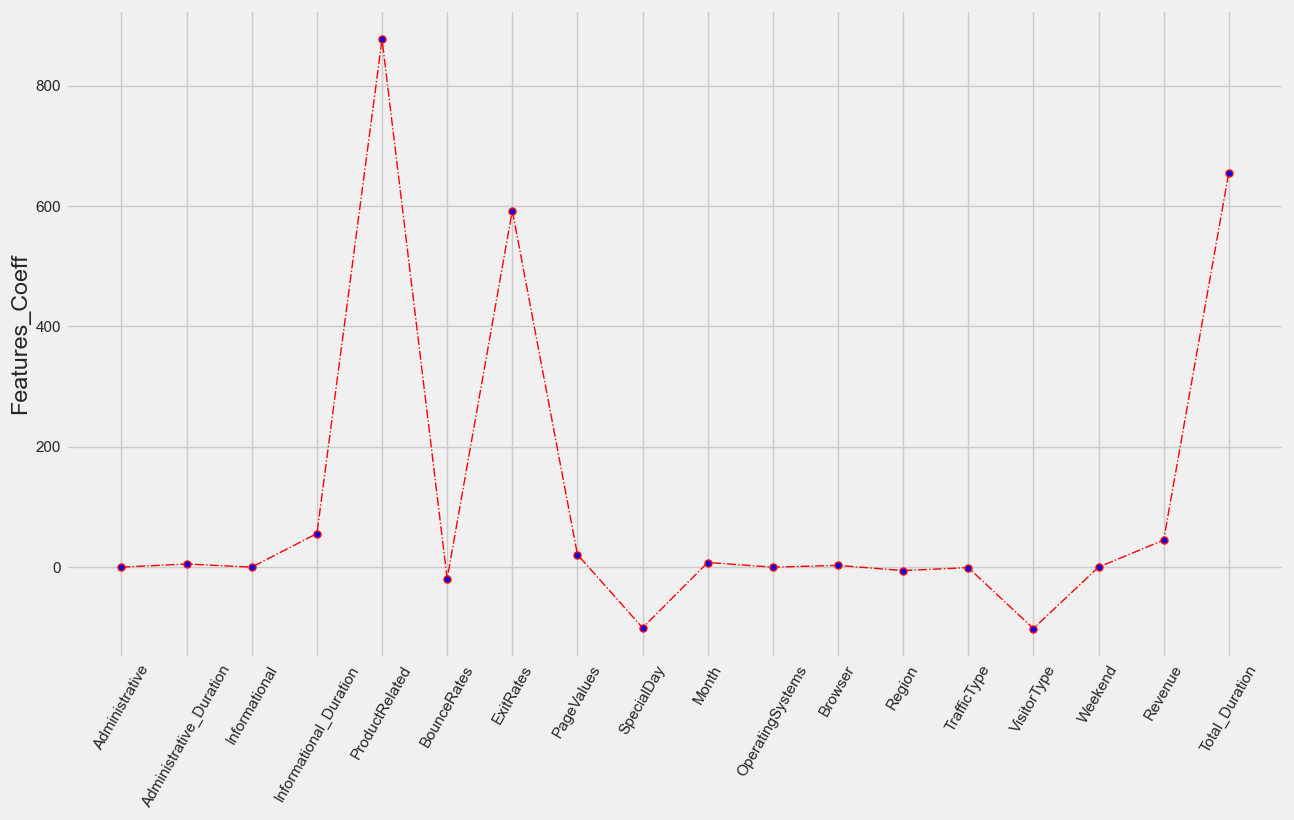

In [80]:
# Lets plot the coeff with features
plt.figure(figsize=(14,8))
plt.plot(range(len(X_train_reg.columns)), coef_series_reg, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(X_train_reg.columns)),X_train_reg.columns,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<Axes: xlabel='features', ylabel='coeff'>

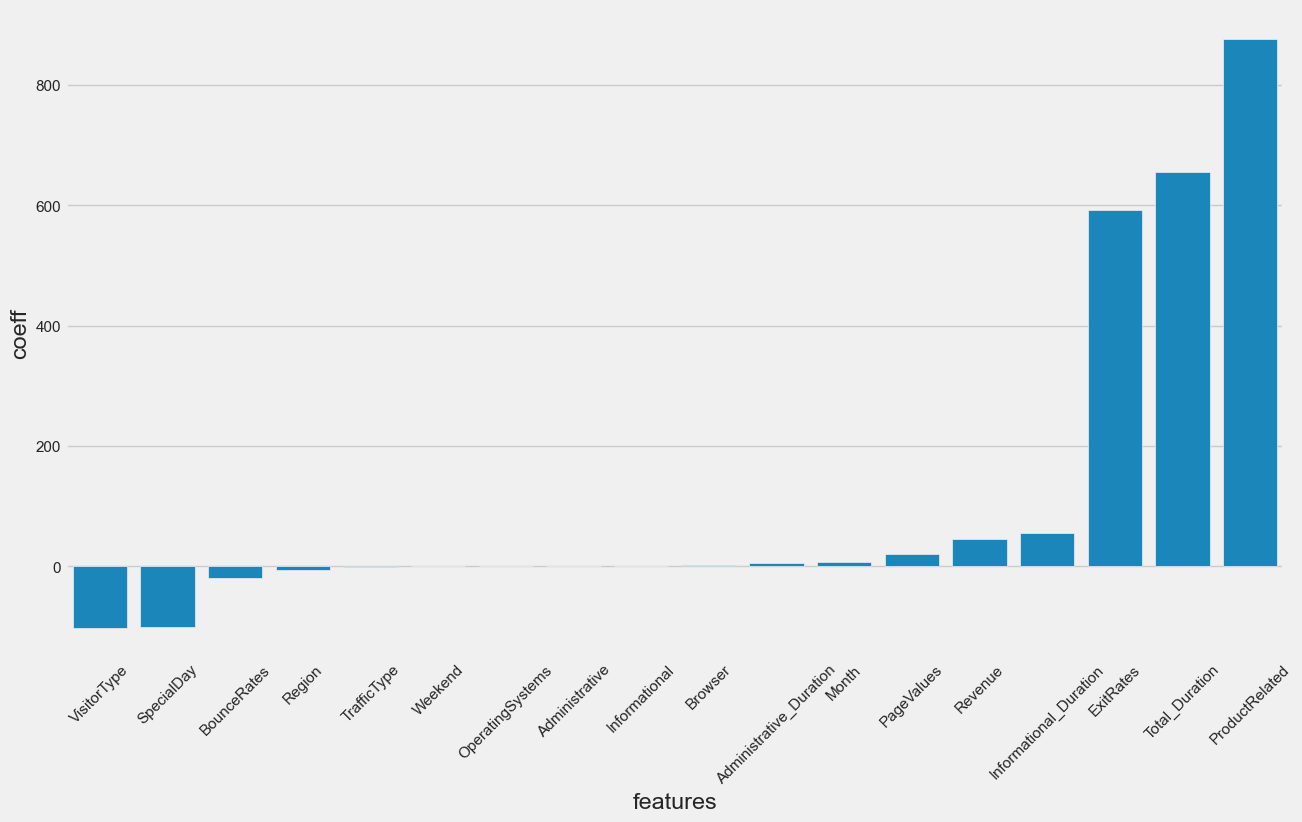

In [81]:
# Use Bar chart to show coeff
plt.figure(figsize=(14,8))
# plot the feature coeff in bars.
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=coef_df_reg)

In [82]:
rfr = RandomForestRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
dtr = DecisionTreeRegressor(random_state=42)

rfr.fit(X_train_reg[selected_features_l1_reg], y_train_reg)
etr.fit(X_train_reg[selected_features_l1_reg], y_train_reg)
gbr.fit(X_train_reg[selected_features_l1_reg], y_train_reg)
dtr.fit(X_train_reg[selected_features_l1_reg], y_train_reg)

mse_rfr = mean_squared_error(y_test_reg, rfr.predict(X_test_reg[selected_features_l1_reg]))
mse_etr = mean_squared_error(y_test_reg, etr.predict(X_test_reg[selected_features_l1_reg]))
mse_gbr = mean_squared_error(y_test_reg, gbr.predict(X_test_reg[selected_features_l1_reg]))
mse_dtr = mean_squared_error(y_test_reg, dtr.predict(X_test_reg[selected_features_l1_reg]))

print(f"MSE of Random Forest: {mse_rfr}")
print(f"MSE of Extra Trees: {mse_etr}")
print(f"MSE of Gradient Boosting: {mse_gbr}")
print(f"MSE of Decision Tree: {mse_dtr}")


MSE of Random Forest: 9809.410216205448
MSE of Extra Trees: 17002.721650154057
MSE of Gradient Boosting: 4860.991955584384
MSE of Decision Tree: 24016.657340833222


#### ***Tree-based selection***


##### ***Task 1: Classification***

In [83]:
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_clf, y_train_clf)
etc.fit(X_train_clf, y_train_clf)
gbc.fit(X_train_clf, y_train_clf)
dtc.fit(X_train_clf, y_train_clf)

featureImportance_clf = [(features,rfcImportance, etcImportance, gbcImportance, dtcImportance) for features, rfcImportance, etcImportance, gbcImportance, dtcImportance in zip(X_train_clf.columns,rfc.feature_importances_,etc.feature_importances_,gbc.feature_importances_,dtc.feature_importances_)]
featureImportance_clf = pd.DataFrame(featureImportance_clf,columns=['features','Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'])
featureImportance_clf.sort_values(by=['Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'],ascending=False, inplace=True)
featureImportance_clf.head(10)

features  Random Forest Feature Importance  \
8                PageValues                          0.370346   
7                 ExitRates                          0.083440   
5   ProductRelated_Duration                          0.074760   
17           Total_Duration                          0.074186   
4            ProductRelated                          0.062424   
1   Administrative_Duration                          0.054148   
6               BounceRates                          0.049969   
10                    Month                          0.038929   
0            Administrative                          0.038766   
13                   Region                          0.028082   

    Extra Trees Feature Importance  Gradient Boosting Feature Importance  \
8                         0.376332                              0.762481   
7                         0.057544                              0.023900   
5                         0.055342                              0.018437   
17                        0.054048                              0.016580   
4                         0.055161                              0.023219   
1                         0.043795                              0.012749   
6                         0.045634                              0.035600   
10                        0.047794                              0.047931   
0                         0.045877                              0.027618   
13                        0.038493                              0.001225   

    Decision Tree Feature Importance  
8                           0.426767  
7                           0.063544  
5                           0.060687  
17                          0.054010  
4                           0.059905  
1                           0.058723  
6                           0.077191  
10                          0.034577  
0                           0.038229  
13                          0.024062

In [84]:
selected_features_tree_based_clf = featureImportance_clf['features'].head(10).tolist()
selected_features_tree_based_clf

['PageValues',
 'ExitRates',
 'ProductRelated_Duration',
 'Total_Duration',
 'ProductRelated',
 'Administrative_Duration',
 'BounceRates',
 'Month',
 'Administrative',
 'Region']

In [85]:
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

rfc.fit(X_train_clf[selected_features_tree_based_clf], y_train_clf)
etc.fit(X_train_clf[selected_features_tree_based_clf], y_train_clf)
gbc.fit(X_train_clf[selected_features_tree_based_clf], y_train_clf)
dtc.fit(X_train_clf[selected_features_tree_based_clf], y_train_clf)

accuracy_rfc = accuracy_score(y_test_clf, rfc.predict(X_test_clf[selected_features_tree_based_clf]))
accuracy_etc = accuracy_score(y_test_clf, etc.predict(X_test_clf[selected_features_tree_based_clf]))
accuracy_gbc = accuracy_score(y_test_clf, gbc.predict(X_test_clf[selected_features_tree_based_clf]))
accuracy_dtc = accuracy_score(y_test_clf, dtc.predict(X_test_clf[selected_features_tree_based_clf]))

print(f"Accuracy of Random Forest: {accuracy_rfc}")
print(f"Accuracy of Extra Trees: {accuracy_etc}")
print(f"Accuracy of Gradient Boosting: {accuracy_gbc}")
print(f"Accuracy of Decision Tree: {accuracy_dtc}")

Accuracy of Random Forest: 0.9098730028676771
Accuracy of Extra Trees: 0.9065956575174109
Accuracy of Gradient Boosting: 0.9143793527242933
Accuracy of Decision Tree: 0.8635804997951659


Selected features from Tree-based selection are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **ProductRelated**
- **Administrative_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **Region**

##### ***Task 2: Regression***

In [86]:
rfr = RandomForestRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
dtr = DecisionTreeRegressor(random_state=42)

rfr.fit(X_train_reg, y_train_reg)
etr.fit(X_train_reg, y_train_reg)
gbr.fit(X_train_reg, y_train_reg)
dtr.fit(X_train_reg, y_train_reg)

featureImportance_reg = [(features,rfrImportance, etrImportance, gbrImportance, dtrImportance) for features, rfrImportance, etrImportance, gbrImportance, dtrImportance in zip(X_train_reg.columns,rfr.feature_importances_,etr.feature_importances_,gbr.feature_importances_,dtr.feature_importances_)]
featureImportance_reg = pd.DataFrame(featureImportance_reg,columns=['features','Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'])
featureImportance_reg.sort_values(by=['Random Forest Feature Importance', 'Extra Trees Feature Importance', 'Gradient Boosting Feature Importance', 'Decision Tree Feature Importance'],ascending=False, inplace=True)
featureImportance_reg.head(10)

features  Random Forest Feature Importance  \
17           Total_Duration                          0.941754   
1   Administrative_Duration                          0.034803   
3    Informational_Duration                          0.014101   
4            ProductRelated                          0.002629   
2             Informational                          0.001822   
0            Administrative                          0.001210   
13              TrafficType                          0.000832   
15                  Weekend                          0.000736   
5               BounceRates                          0.000622   
9                     Month                          0.000463   

    Extra Trees Feature Importance  Gradient Boosting Feature Importance  \
17                        0.680128                          9.604685e-01   
1                         0.024874                          1.078082e-02   
3                         0.034895                          2.438652e-02   
4                         0.219809                          1.365966e-03   
2                         0.023490                          2.729705e-05   
0                         0.001899                          8.069805e-04   
13                        0.000756                          3.358037e-07   
15                        0.000870                          0.000000e+00   
5                         0.004044                          2.162298e-03   
9                         0.001399                          8.219850e-08   

    Decision Tree Feature Importance  
17                          0.983528  
1                           0.005918  
3                           0.003658  
4                           0.006060  
2                           0.000041  
0                           0.000110  
13                          0.000141  
15                          0.000012  
5                           0.000059  
9                           0.000117

In [87]:
selected_features_tree_based_reg = featureImportance_reg['features'].head(10).tolist()
selected_features_tree_based_reg

['Total_Duration',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'Informational',
 'Administrative',
 'TrafficType',
 'Weekend',
 'BounceRates',
 'Month']

In [88]:
rfr = RandomForestRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
dtr = DecisionTreeRegressor(random_state=42)

rfr.fit(X_train_reg[selected_features_tree_based_reg], y_train_reg)
etr.fit(X_train_reg[selected_features_tree_based_reg], y_train_reg)
gbr.fit(X_train_reg[selected_features_tree_based_reg], y_train_reg)
dtr.fit(X_train_reg[selected_features_tree_based_reg], y_train_reg)

mse_rfr = mean_squared_error(y_test_reg, rfr.predict(X_test_reg[selected_features_tree_based_reg]))
mse_etr = mean_squared_error(y_test_reg, etr.predict(X_test_reg[selected_features_tree_based_reg]))
mse_gbr = mean_squared_error(y_test_reg, gbr.predict(X_test_reg[selected_features_tree_based_reg]))
mse_dtr = mean_squared_error(y_test_reg, dtr.predict(X_test_reg[selected_features_tree_based_reg]))

print(f"MSE of Random Forest: {mse_rfr}")
print(f"MSE of Extra Trees: {mse_etr}")
print(f"MSE of Gradient Boosting: {mse_gbr}")
print(f"MSE of Decision Tree: {mse_dtr}")

MSE of Random Forest: 10711.479623805548
MSE of Extra Trees: 14371.42131859169
MSE of Gradient Boosting: 4844.148037042547
MSE of Decision Tree: 12678.614007650487


#### ***Conclusion***
- The Lasso L1 Regularization method is the worst method to select features, yielding the lowest accuracy from Gradient Boosting estimator of **0.907**

- The Tree-based selection method is the best method to select features, yielding the highest accuracy from Random Forest estimator of **0.917**

Therefore, the we will select the features from the Tree-based selection method since it yields the highest accuracy of **0.917**.

The selected features for Embedded method are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **ProductRelated**
- **Administrative_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **Region**


### Wrapper-based method

#### ***Exhaustive Feature Selection***


##### ***Task 1: Classification***


In [95]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

lr = LogisticRegression(random_state=42)

efs_clf = ExhaustiveFeatureSelector(
    estimator=lr,
    min_features=1,
    max_features=7,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    print_progress=True,
    pre_dispatch='2*n_jobs'
)

efs_clf.fit(X_train_clf, y_train_clf)

Features: 63003/63003

ExhaustiveFeatureSelector(estimator=LogisticRegression(random_state=42),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17]],
                          max_features=7, n_jobs=-1)

The code above takes 8m44s

In [98]:
efs_df_clf = pd.DataFrame.from_dict(efs_clf.get_metric_dict()).T
efs_df_clf = efs_df_clf[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
efs_df_clf

feature_idx avg_score
38146  (0, 2, 7, 8, 11, 14, 15)   0.89581
44959   (1, 2, 4, 7, 8, 11, 15)  0.895093
36236   (0, 2, 3, 7, 8, 11, 15)   0.89499
15500      (0, 2, 7, 8, 14, 15)  0.894888
40148  (0, 3, 7, 8, 11, 14, 15)  0.894887
...                         ...       ...
41119  (0, 4, 6, 7, 10, 12, 15)  0.839156
17042      (0, 4, 6, 7, 10, 15)  0.839053
41123  (0, 4, 6, 7, 10, 13, 15)  0.838951
41126  (0, 4, 6, 7, 10, 14, 15)  0.838951
33786   (0, 1, 4, 6, 7, 10, 15)  0.838848

[63003 rows x 2 columns]

In [99]:
best_features_idx_efs_clf, avg_efs_f1_score_clf = efs_df_clf['feature_idx'].head(1), efs_df_clf['avg_score'].head(1)
best_features_idx_efs_clf, avg_efs_f1_score_clf = best_features_idx_efs_clf.values[0], avg_efs_f1_score_clf.values[0]
best_features_efs_clf = X_train_clf.columns[list(best_features_idx_efs_clf)]
print("Best features:", best_features_efs_clf)
print("Best scores:", avg_efs_f1_score_clf)

Best features: Index(['Administrative', 'Informational', 'ExitRates', 'PageValues',
       'OperatingSystems', 'TrafficType', 'VisitorType'],
      dtype='object')
Best scores: 0.8958097777274139


##### ***Task 2: Regression***


In [107]:
lr = LinearRegression()

efs_reg = ExhaustiveFeatureSelector(
    estimator=lr,
    min_features=1,
    max_features=7,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    print_progress=True,
    pre_dispatch='2*n_jobs'
)

efs_reg.fit(X_train_reg, y_train_reg)

Features: 63003/63003

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17]],
                          max_features=7, n_jobs=-1,
                          scoring='neg_mean_squared_error')

In [112]:
efs_df_reg = pd.DataFrame.from_dict(efs_reg.get_metric_dict()).T
efs_df_reg = efs_df_reg[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
efs_df_reg

feature_idx       avg_score
57265  (3, 4, 6, 8, 14, 16, 17) -1793375.933607
57095   (3, 4, 6, 7, 8, 14, 17) -1794882.662169
56645   (3, 4, 5, 6, 8, 14, 17)  -1795010.04894
56731  (3, 4, 5, 6, 14, 16, 17) -1795061.631196
56648   (3, 4, 5, 6, 8, 16, 17) -1796013.057106
...                         ...             ...
15                        (15,) -3761275.250902
143                    (10, 11) -3761305.175599
11                        (11,) -3761311.478378
147                    (10, 15)  -3761390.62336
10                        (10,) -3761473.180088

[63003 rows x 2 columns]

In [113]:
best_features_idx_efs_reg, avg_efs_f1_score_reg = efs_df_reg['feature_idx'].head(1), efs_df_reg['avg_score'].head(1)
best_features_idx_efs_reg, avg_efs_f1_score_reg = best_features_idx_efs_reg.values[0], avg_efs_f1_score_reg.values[0]
best_features_efs_reg = X_train_clf.columns[list(best_features_idx_efs_reg)]
print("Best features:", best_features_efs_reg)
print("Best scores:", avg_efs_f1_score_reg)

Best features: Index(['Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'TrafficType', 'Weekend', 'Total_Duration'],
      dtype='object')
Best scores: -1793375.9336074889


#### ***Recursive Feature Elimination***


##### ***Task 1: Classification***

In [118]:
from sklearn.feature_selection import RFECV

lr = LogisticRegression(random_state=42)

rfe_clf = RFECV(
    estimator=lr,
    step=1,
    cv=7,
    scoring='accuracy',
    min_features_to_select=1,
    n_jobs=-1)
rfe_clf.fit(X_train_clf, y_train_clf)

RFECV(cv=7, estimator=LogisticRegression(random_state=42), n_jobs=-1,
      scoring='accuracy')

In [119]:
accuracy_scores_clf = rfe_clf.cv_results_['mean_test_score']
print("Accuracy scores at each iteration:", accuracy_scores_clf)

Accuracy scores at each iteration: [0.84263918 0.84940286 0.88699885 0.88402737 0.88494822 0.88443648
 0.88556494 0.8852583  0.88607697 0.88833094 0.88853627 0.88966267
 0.88956019 0.89048236 0.88956063 0.89007288 0.8908928  0.89017558]


In [122]:
best_accuracy_clf = rfe_clf.cv_results_['mean_test_score'].max()
best_n_features_clf = rfe_clf.n_features_

In [123]:
print(f"Best accuracy score: {best_accuracy_clf:.4f}")
print(f"Best number of features: {best_n_features_clf}")

Best accuracy score: 0.8909
Best number of features: 17


In [124]:
selected_features = pd.DataFrame(list(zip(X_train_clf.columns,rfe_clf.support_)),columns=['features','important'])
display(selected_features.sort_values(by='important',ascending=False))
selected_features_mask_clf = rfe_clf.support_
selected_features_clf = X_train_clf.columns[selected_features_mask_clf]
print("Selected features:", selected_features_clf)

features  important
0            Administrative       True
1   Administrative_Duration       True
16                  Weekend       True
15              VisitorType       True
13                   Region       True
12                  Browser       True
11         OperatingSystems       True
10                    Month       True
9                SpecialDay       True
8                PageValues       True
7                 ExitRates       True
6               BounceRates       True
5   ProductRelated_Duration       True
4            ProductRelated       True
3    Informational_Duration       True
2             Informational       True
17           Total_Duration       True
14              TrafficType      False

Selected features: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend',
       'Total_Duration'],
      dtype='object')


##### ***Task 2: Regression***

In [125]:
lr = LinearRegression()

rfe_reg = RFECV(
    estimator=lr,
    step=1,
    cv=7,
    scoring='neg_mean_squared_error',
    min_features_to_select=1,
    n_jobs=-1)
rfe_reg.fit(X_train_reg, y_train_reg)

RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [126]:
accuracy_scores_reg = rfe_reg.cv_results_['mean_test_score']
print("Accuracy scores at each iteration:", accuracy_scores_reg)

Accuracy scores at each iteration: [-2149090.73222666 -2124355.985775   -1830793.61135463 -1823059.65502723
 -1815696.09553387 -1808228.18698684 -1791060.34397933 -1791319.38037743
 -1795625.93159584 -1793692.2820868  -1794559.98577947 -1795999.28658346
 -1795682.39286076 -1795727.88425841 -1795340.31174738 -1795882.06162738
 -1795339.86460047 -1795499.20346341]


In [127]:
best_accuracy_reg = rfe_reg.cv_results_['mean_test_score'].max()
best_n_features_reg = rfe_reg.n_features_

In [129]:
print(f"Best accuracy score: {best_accuracy_reg:.4f}")
print(f"Best number of features: {best_n_features_reg}")

Best accuracy score: -1791060.3440
Best number of features: 7


In [128]:
selected_features = pd.DataFrame(list(zip(X_train_reg.columns,rfe_reg.support_)),columns=['features','important'])
display(selected_features.sort_values(by='important',ascending=False))
selected_features_mask_reg = rfe_clf.support_
selected_features_reg = X_train_reg.columns[selected_features_mask_reg]
print("Selected features:", selected_features_reg)

features  important
17           Total_Duration       True
16                  Revenue       True
3    Informational_Duration       True
4            ProductRelated       True
6                 ExitRates       True
14              VisitorType       True
8                SpecialDay       True
11                  Browser      False
15                  Weekend      False
13              TrafficType      False
12                   Region      False
0            Administrative      False
10         OperatingSystems      False
1   Administrative_Duration      False
7                PageValues      False
5               BounceRates      False
2             Informational      False
9                     Month      False

Selected features: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'Weekend', 'Revenue', 'Total_Duration'],
      dtype='object')


#### ***Sequential Feature Selection***


#### ***Task 1: Classification***


In [133]:
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LogisticRegression(random_state=42)

sfs_clf = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='accuracy',
    forward=True,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

sfs_clf.fit(X_train_clf, y_train_clf)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                          k_features=(1, 18), n_jobs=-1, scoring='accuracy')

In [134]:
sfs_df_clf = pd.DataFrame.from_dict(sfs_clf.get_metric_dict()).T
sfs_df_clf = sfs_df_clf[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
sfs_df_clf

feature_idx avg_score
10                 (1, 2, 5, 6, 7, 8, 11, 13, 15, 16)   0.89458
15  (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...  0.894376
11              (0, 1, 2, 5, 6, 7, 8, 11, 13, 15, 16)  0.894376
9                      (1, 2, 5, 6, 7, 8, 11, 13, 15)  0.893966
4                                        (1, 6, 7, 8)  0.893965
5                                     (1, 5, 6, 7, 8)  0.893965
12          (0, 1, 2, 5, 6, 7, 8, 11, 12, 13, 15, 16)  0.893863
8                          (1, 2, 5, 6, 7, 8, 11, 15)  0.893761
7                              (1, 2, 5, 6, 7, 8, 11)  0.893761
6                                 (1, 5, 6, 7, 8, 11)  0.893658
14   (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16)  0.893454
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...  0.893454
13       (0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 15, 16)  0.893146
3                                           (6, 7, 8)  0.892327
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.891712
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.89038
2                                              (6, 8)  0.890073
1                                                (8,)  0.873476

In [135]:
best_features_idx_sfs_clf, avg_sfs_f1_score_clf = sfs_df_clf['feature_idx'].head(1), sfs_df_clf['avg_score'].head(1)
best_features_idx_sfs_clf, avg_sfs_f1_score_clf = best_features_idx_sfs_clf.values[0], avg_sfs_f1_score_clf.values[0]
best_features_sfs_clf = X_train_clf.columns[list(best_features_idx_sfs_clf)]
print("Best features:", best_features_sfs_clf)
print("Best scores:", avg_sfs_f1_score_clf)

Best features: Index(['Administrative_Duration', 'Informational', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Region',
       'VisitorType', 'Weekend'],
      dtype='object')
Best scores: 0.8945803744554406


#### ***Task 2: Regression***


In [137]:
lr = LinearRegression()

sfs_reg = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='neg_mean_squared_error',
    forward=True,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

sfs_reg.fit(X_train_reg, y_train_reg)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 18),
                          n_jobs=-1, scoring='neg_mean_squared_error')

In [138]:
sfs_df_reg = pd.DataFrame.from_dict(sfs_reg.get_metric_dict()).T
sfs_df_reg = sfs_df_reg[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
sfs_df_reg

feature_idx       avg_score
10                 (3, 4, 5, 6, 7, 8, 12, 14, 16, 17)  -1790355.98931
9                     (3, 4, 5, 6, 8, 12, 14, 16, 17) -1790397.500636
11             (3, 4, 5, 6, 7, 8, 11, 12, 14, 16, 17) -1790417.712032
8                         (3, 4, 5, 6, 8, 14, 16, 17) -1790434.200817
12          (3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 17) -1790519.879157
13      (3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17) -1790630.727334
14  (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17) -1790851.846641
15  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1... -1791198.708217
16  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1... -1792044.747546
7                            (3, 4, 6, 8, 14, 16, 17) -1793375.933607
17  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14... -1793917.796227
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   -1797891.2842
6                                (3, 4, 6, 8, 14, 17) -1798164.980956
5                                   (3, 4, 6, 14, 17) -1803788.849586
4                                       (3, 4, 6, 17) -1812447.989807
3                                          (4, 6, 17) -1832054.879691
2                                              (4, 6) -2040360.800925
1                                                (4,)  -2149115.81768

In [140]:
best_features_idx_sfs_reg, avg_sfs_f1_score_reg = sfs_df_reg['feature_idx'].head(1), sfs_df_reg['avg_score'].head(1)
best_features_idx_sfs_reg, avg_sfs_f1_score_reg = best_features_idx_sfs_reg.values[0], avg_sfs_f1_score_reg.values[0]
best_features_sfs_reg = X_train_reg.columns[list(best_features_idx_sfs_reg)]
print("Best features:", best_features_sfs_reg)
print("Best scores:", avg_sfs_f1_score_reg)

Best features: Index(['Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Region', 'VisitorType', 'Revenue',
       'Total_Duration'],
      dtype='object')
Best scores: -1790355.9893099908


#### ***Backward Feature Selection***


##### ***Task 1: Classification***


In [141]:
lr = LogisticRegression(random_state=42)

bfs_clf = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='accuracy',
    forward=False,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

bfs_clf.fit(X_train_clf, y_train_clf)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                          forward=False, k_features=(1, 18), n_jobs=-1,
                          scoring='accuracy')

In [142]:
bfs_df_clf = pd.DataFrame.from_dict(bfs_clf.get_metric_dict()).T
bfs_df_clf = bfs_df_clf[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
bfs_df_clf

feature_idx avg_score
12         (0, 2, 3, 6, 7, 8, 10, 11, 12, 14, 15, 16)  0.895503
13     (0, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16)  0.894888
10                 (0, 2, 3, 6, 7, 8, 10, 12, 14, 15)  0.894683
11             (0, 2, 3, 6, 7, 8, 10, 12, 14, 15, 16)  0.894683
14  (0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16)  0.894683
9                      (0, 2, 3, 6, 7, 8, 10, 14, 15)  0.894376
6                               (0, 7, 8, 10, 14, 15)  0.894171
15  (0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...  0.894171
5                                   (0, 7, 8, 14, 15)  0.894068
8                         (0, 2, 6, 7, 8, 10, 14, 15)  0.893761
7                            (0, 6, 7, 8, 10, 14, 15)  0.893761
4                                       (0, 7, 8, 15)  0.893761
16  (0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...  0.893556
17  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.892634
3                                          (0, 8, 15)  0.892327
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.89038
2                                             (8, 15)  0.887717
1                                                (8,)  0.873476

In [150]:
best_features_idx_bfs_clf, avg_sfs_f1_score_clf = bfs_df_clf['feature_idx'].head(1), bfs_df_clf['avg_score'].head(1)
best_features_idx_bfs_clf, avg_sfs_f1_score_clf = best_features_idx_bfs_clf.values[0], avg_sfs_f1_score_clf.values[0]
best_features_bfs_clf = X_train_clf.columns[list(best_features_idx_bfs_clf)]
print("Best features:", best_features_bfs_clf)
print("Best scores:", avg_sfs_f1_score_clf)

Best features: Index(['Administrative', 'Informational', 'Informational_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
       'Browser', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')
Best scores: 0.8955030302267213


##### ***Task 2: Regression***

In [146]:
lr = LinearRegression()

bfs_reg = SequentialFeatureSelector(
    estimator=lr,
    k_features='best',
    scoring='neg_mean_squared_error',
    forward=False,
    cv=5,
    n_jobs=-1,
    pre_dispatch='2*n_jobs'
)

bfs_reg.fit(X_train_reg, y_train_reg)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 18), n_jobs=-1,
                          scoring='neg_mean_squared_error')

In [147]:
bfs_df_reg = pd.DataFrame.from_dict(bfs_reg.get_metric_dict()).T
bfs_df_reg = bfs_df_reg[["feature_idx","avg_score"]].sort_values(by=['avg_score'], ascending=False)
bfs_df_reg

feature_idx       avg_score
10                 (3, 4, 5, 6, 7, 8, 12, 14, 16, 17)  -1790355.98931
9                     (3, 4, 5, 6, 8, 12, 14, 16, 17) -1790397.500636
11             (3, 4, 5, 6, 7, 8, 11, 12, 14, 16, 17) -1790417.712032
8                         (3, 4, 5, 6, 8, 14, 16, 17) -1790434.200817
12          (3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 17) -1790519.879157
13      (3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17) -1790630.727334
14  (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17) -1790851.846641
15  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1... -1791198.708217
16  (0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1... -1792044.747546
7                            (3, 4, 6, 8, 14, 16, 17) -1793375.933607
17  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14... -1793917.796227
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   -1797891.2842
6                                (3, 4, 6, 8, 14, 17) -1798164.980956
5                                   (3, 4, 6, 14, 17) -1803788.849586
4                                       (3, 4, 6, 17) -1812447.989807
3                                          (4, 6, 17) -1832054.879691
2                                              (4, 6) -2040360.800925
1                                                (4,)  -2149115.81768

In [149]:
best_features_idx_bfs_reg, avg_sfs_f1_score_reg = bfs_df_reg['feature_idx'].head(1), bfs_df_reg['avg_score'].head(1)
best_features_idx_bfs_reg, avg_sfs_f1_score_reg = best_features_idx_bfs_reg.values[0], avg_sfs_f1_score_reg.values[0]
best_features_bfs_reg = X_train_reg.columns[list(best_features_idx_bfs_reg)]
print("Best features:", best_features_bfs_clf)
print("Best scores:", avg_sfs_f1_score_reg)

Best features: Index(['Administrative', 'Informational', 'Informational_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
       'Browser', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')
Best scores: -1790355.9893099908


#### ***Conclusion***
- The Exhaustive Feature Selection method is the best method with yeild the accuracy of  **0.885**

The selected features for Wrapper method are:
- **PageValues**
- **Month**
- **Browser**
- **VisitorType**
- **Weekend**
- **Total_Duration**

### Final Decision for selected Features

We will union out all of the selected features from 3 methods above, and these are:
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **ProductRelated**
- **Administrative_Duration**

And the remainings are:

- Filter-based method:
  - **TrafficType**

- Embedded method:
  - **Region**  

- Wrapper method:
  - **Browser**
  - **VisitorType**
  - **Weekend**
  
Now let's step out the and dive into the business context, since the visitor type and the weekend does affect on the sales of the store - **Write more about the hypothesis**


**These are the research papers can help you make the decision**
https://journals.sagepub.com/doi/epub/10.1509/jm.13.0272
this paper tell that the feature 'visitorType' does affect on the dataset


https://www.sciencedirect.com/science/article/abs/pii/S0969698923003752?fr=RR-2&ref=pdf_download&rr=8fb9237d1e91715e
The study suggests that weekends are a prime time for hedonic product sales, as consumers are in a more positive mood and more likely to leave favorable reviews. This could translate into higher sales for hedonic products during weekends.

=> **Write and explain why these 2 features 'VisitorType' and 'Weekend' affect the sales or have the high intention on buying the products based on 2 research papers**


**Final selected features**
- **PageValues**
- **ExitRates**
- **ProductRelated_Duration**
- **Total_Duration**
- **BounceRates**
- **Month**
- **Administrative**
- **ProductRelated**
- **Administrative_Duration**
- **VisitorType**
- **Weekend**


In [32]:
selected_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Total_Duration', 'BounceRates', 'Month', 'Administrative', 'ProductRelated', 'Administrative_Duration', 'VisitorType', 'Weekend']

X_train_scaled_encoded_sf, X_test_scaled_encoded_sf= X_train_scaled_encoded[selected_features], X_test_scaled_encoded[selected_features]

In [25]:
X_train_reg = X_train_scaled_encoded.drop('ProductRelated_Duration', axis=1)
X_test_reg = X_test_scaled_encoded.drop('ProductRelated_Duration', axis=1)
y_train_reg = X_train_scaled_encoded['ProductRelated_Duration'].reset_index(drop=True)
y_test_reg = X_test_scaled_encoded['ProductRelated_Duration'].reset_index(drop=True)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_and_plot(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Regression Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('\nRegression Metrics:')
    print('     Mean Squared Error (MSE): {0:.3f}'.format(mse))
    print('     Root Mean Squared Error (RMSE): {0:.3f}'.format(rmse))
    print('     Mean Absolute Error (MAE): {0:.3f}'.format(mae))
    print('     R-squared (R2): {0:.3f}'.format(r2))

    # Regression Line Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
    # plt.plot(range(len(y_pred)), y_pred, color='green', label='Regression Line')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.title('Regression Line with Actual and Predicted Prices')
    plt.legend()
    plt.show()
    
    return model, y_pred


Regression Metrics:
     Mean Squared Error (MSE): 0.000
     Root Mean Squared Error (RMSE): 0.019
     Mean Absolute Error (MAE): 0.006
     R-squared (R2): 0.999


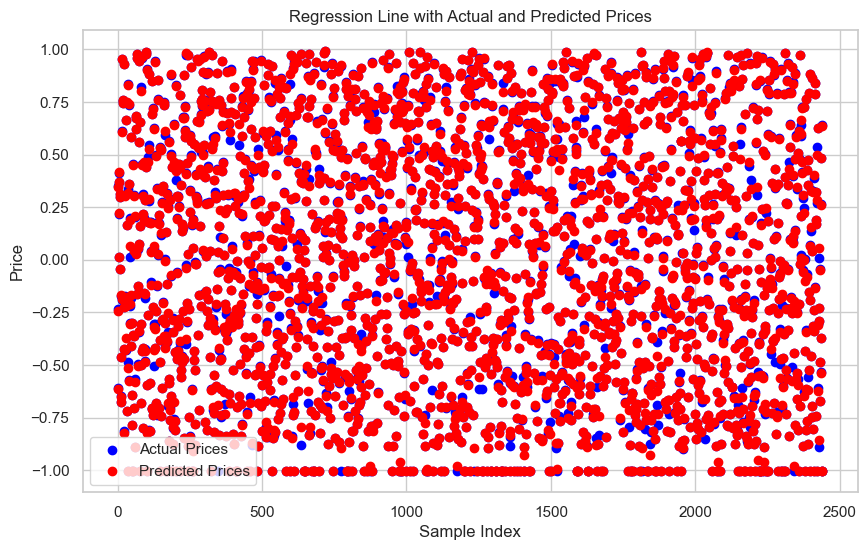

In [28]:
# Model training
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

rfr = RandomForestRegressor()
model1, y_pred = train_and_plot(model=rfr, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)


Regression Metrics:
     Mean Squared Error (MSE): 0.225
     Root Mean Squared Error (RMSE): 0.475
     Mean Absolute Error (MAE): 0.348
     R-squared (R2): 0.347


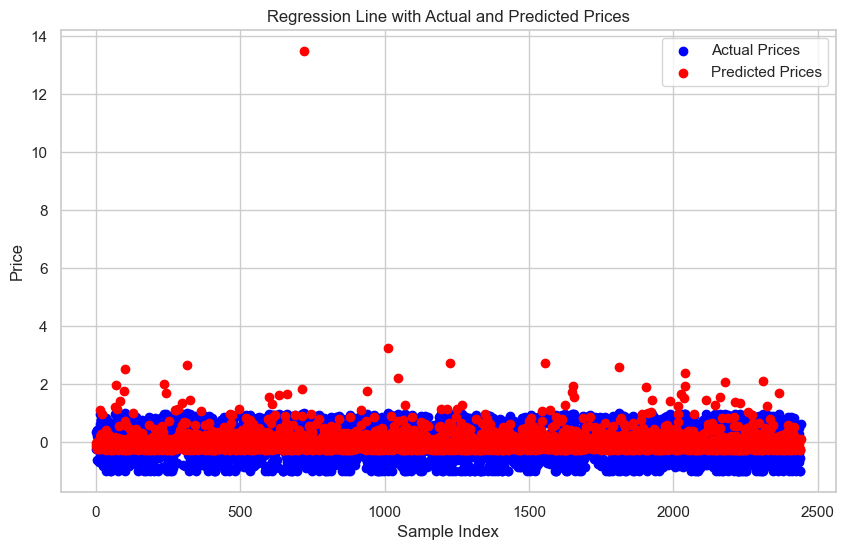

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=20)
model1 = train_and_plot(model=lasso, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)


Regression Metrics:
     Mean Squared Error (MSE): 0.001
     Root Mean Squared Error (RMSE): 0.035
     Mean Absolute Error (MAE): 0.013
     R-squared (R2): 0.996


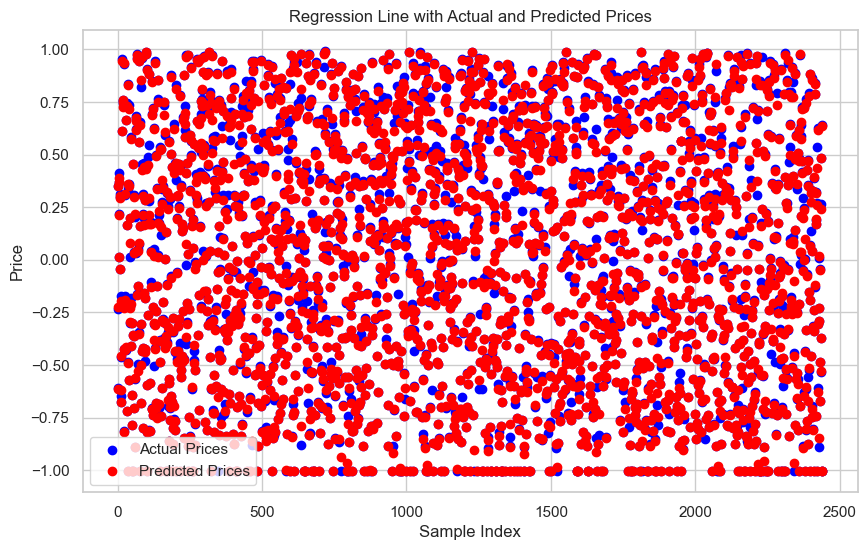

In [30]:
etr = ExtraTreesRegressor()
model2 = train_and_plot(model=etr, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)


Regression Metrics:
     Mean Squared Error (MSE): 0.000
     Root Mean Squared Error (RMSE): 0.019
     Mean Absolute Error (MAE): 0.009
     R-squared (R2): 0.999


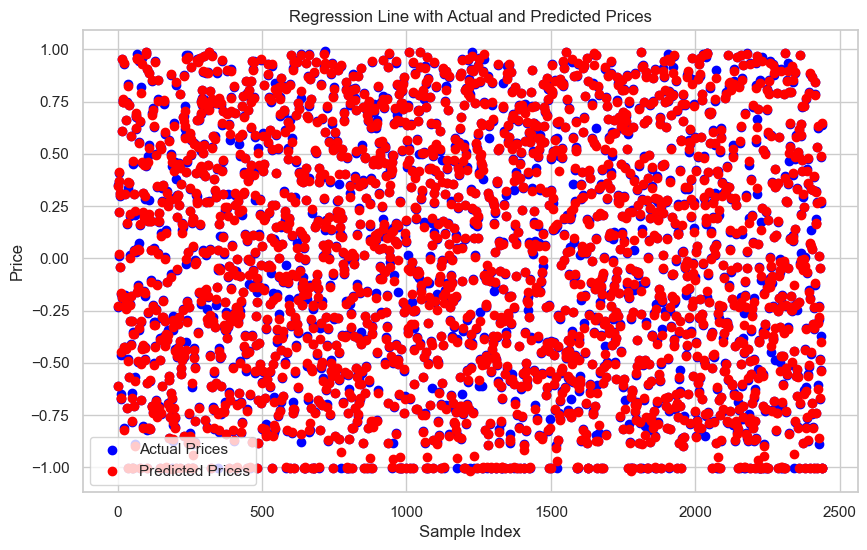

In [31]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor()
model3 = train_and_plot(model=hgbr, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)


Regression Metrics:
     Mean Squared Error (MSE): 0.225
     Root Mean Squared Error (RMSE): 0.475
     Mean Absolute Error (MAE): 0.208
     R-squared (R2): 0.772


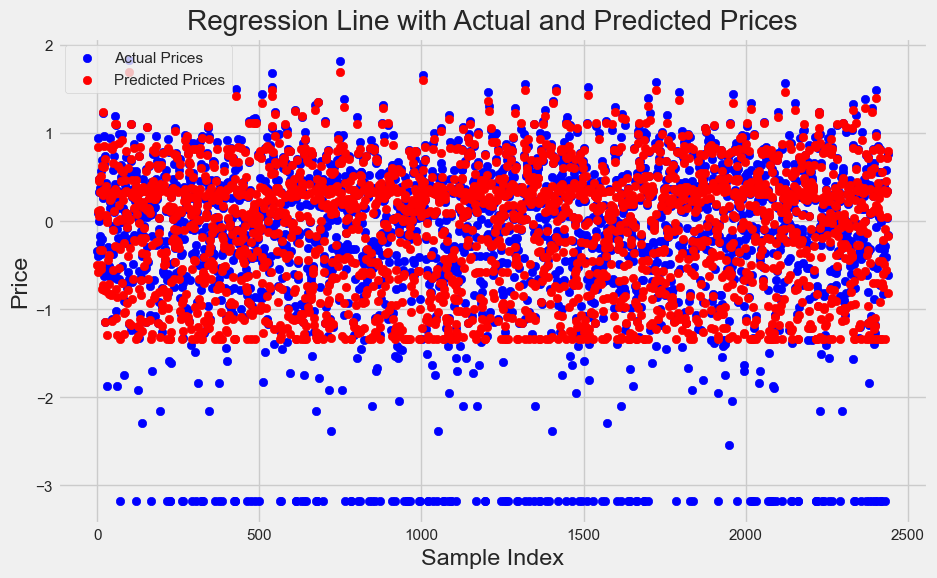

In [111]:
from sklearn.svm import SVR

svr = SVR()
model3 = train_and_plot(model=svr, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)


Regression Metrics:
     Mean Squared Error (MSE): 0.147
     Root Mean Squared Error (RMSE): 0.384
     Mean Absolute Error (MAE): 0.281
     R-squared (R2): 0.851


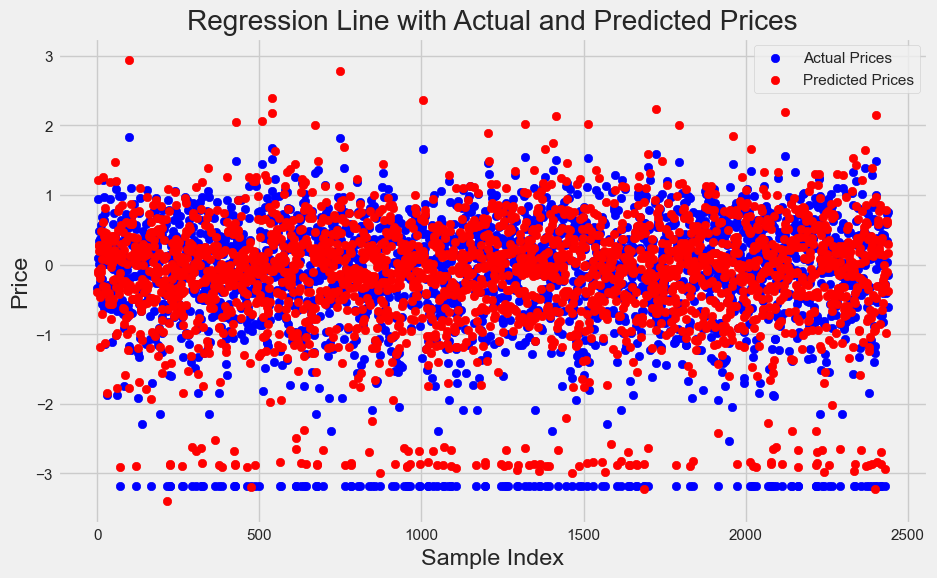

In [112]:
from sklearn.svm import SVR

svr = LinearRegression()
model3 = train_and_plot(model=svr, X_train=X_train_reg, X_test=X_test_reg, y_train=y_train_reg, y_test=y_test_reg)

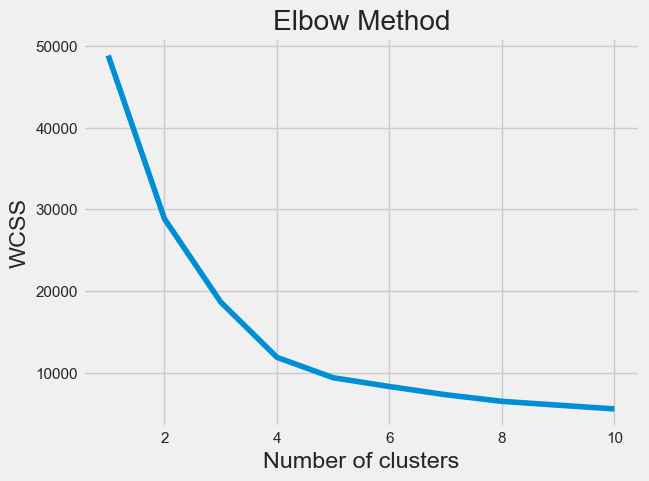

         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              1.464397                 0.464801       0.050745   
1              1.506415                 0.402715       1.179848   
2              0.019434                -0.500003       0.009391   
3              0.059077                -0.478836       0.034855   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0                      0.055877        3.200751                 0.074859   
1                      4.594933        3.774802                 0.448132   
2                      0.010467        1.022011                -2.760034   
3                      0.071149        2.578697                -0.304862   

         BounceRates  ExitRates  PageValues  SpecialDay     Month  \
Cluster                                                             
0 

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature selection for clustering
cluster_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
X_cluster = X_train_scaled_encoded[cluster_features]

# Data scaling
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training KMeans with optimal clusters, say 4
kmeans = KMeans(n_clusters=4, random_state=42)
X_train_scaled_encoded['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Analysis
cluster_analysis = X_train_scaled_encoded.groupby('Cluster').mean()
print(cluster_analysis)

# Modeling

In [34]:
def calculate_class_weights(y):
    """
    Calculate class weights based on the inverse of class frequencies.
    
    Args:
        y (array-like): Target labels (e.g., y_train).
    
    Returns:
        dict: A dictionary of class weights, where keys are class labels and values are weights.
    """
    # Get unique classes and their counts
    y = np.array(y).reshape(-1)
    classes = np.unique(y)
    class_counts = np.bincount(y)
    
    # Calculate class weights using the inverse of class frequencies
    total_samples = len(y)
    class_weights = {}
    
    for cls in classes:
        # Weight = total_samples / (n_classes * class_count)
        weight = total_samples / (len(classes) * class_counts[cls])
        class_weights[cls] = weight
    
    return class_weights

In [35]:
models = {
    "RandomForest": {
        "base_model": RandomForestClassifier(random_state=42),
        "cs_model" : RandomForestClassifier(random_state=42, class_weight=calculate_class_weights(y_train_encoded)),
        "params": {
            "n_estimators": randint(100, 500),
            "max_depth": [None, 10, 20, 30, 50],
            "min_samples_split": randint(2, 20),
            "min_samples_leaf": randint(1, 20),
            "max_features": ["sqrt", "log2", None],
            "bootstrap": [True, False],
            "class_weight": ["balanced", "balanced_subsample", None]
        }
    },
    "GradientBoosting": {
        "base_model": GradientBoostingClassifier(random_state=42),
        "cs_model" : None,
        "params": {
            "n_estimators": randint(100, 500),
            "learning_rate": uniform(0.01, 0.3),
            "max_depth": randint(3, 10),
            "min_samples_split": randint(2, 20),
            "min_samples_leaf": randint(1, 20),
            "max_features": ["sqrt", "log2", None],
            "subsample": uniform(0.5, 0.5),
            "loss": ["log_loss", "exponential"]
        }
    },
    "HistGradientBoosting": {
        "base_model": HistGradientBoostingClassifier(random_state=42),
        "cs_model" : HistGradientBoostingClassifier(random_state=42, class_weight=calculate_class_weights(y_train_encoded)),
        "params": {
            "max_iter": randint(100, 500),
            "learning_rate": uniform(0.01, 0.3),
            "max_depth": randint(3, 10),
            "min_samples_leaf": randint(1, 20),
            "max_leaf_nodes": randint(10, 100),
            "l2_regularization": uniform(0.0, 1.0),
            "max_bins": randint(50, 255),
            "early_stopping": ["auto", True, False],
            "class_weight": ["balanced", "balanced_subsample", None]
        }
    },
    "ExtraTrees": {
        "base_model": ExtraTreesClassifier(random_state=42),
        "cs_model" : ExtraTreesClassifier(random_state=42, class_weight=calculate_class_weights(y_train_encoded)),
        "params": {
            "n_estimators": randint(100, 500),
            "max_depth": [None, 10, 20, 30, 50],
            "min_samples_split": randint(2, 20),
            "min_samples_leaf": randint(1, 20),
            "max_features": ["sqrt", "log2", None],
            "bootstrap": [True, False],
            "class_weight": ["balanced", "balanced_subsample", None]
        }
    },
    "DecisionTree": {
        "base_model": DecisionTreeClassifier(random_state=42),
        "cs_model" : DecisionTreeClassifier(random_state=42, class_weight=calculate_class_weights(y_train_encoded)),
        "params": {
            "max_depth": [None, 10, 20, 30, 50],
            "min_samples_split": randint(2, 20),
            "min_samples_leaf": randint(1, 20),
            "max_features": ["sqrt", "log2", None],
            "splitter": ["best", "random"],
            "criterion": ["gini", "entropy"],
            "class_weight": ["balanced", None]
        }
    }
}

In [36]:
def geometric_mean_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return np.sqrt(sensitivity * specificity)

In [37]:
scoring = {
    'f1': 'f1',  # Use make_scorer for custom metrics
    'roc_auc': 'roc_auc',  # Use predefined string
}

def train_evaluate_model(model, X_train, y_train, X_test, y_test, params=None, search=False, pipeline=None, threshold=False):
    """
    Train and evaluate a model.
    
    Args:
        model: The model to train.
        X_train, y_train: Training data.
        X_test, y_test: Test data.
        params: Hyperparameter grid for RandomizedSearchCV.
        search: Whether to perform hyperparameter tuning.
        pipeline: Whether to use a pipeline.
        threshold: Whether to optimize the decision threshold using TunedThresholdClassifierCV.
    
    Returns:
        Dictionary containing evaluation results.
    """
    if pipeline:
        model = pipeline

    if search:
        # Perform RandomizedSearchCV for hyperparameter tuning
        search_cv = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=20,
            scoring=scoring,
            cv=5,
            random_state=42,
            n_jobs=-1,
            refit='f1',
            verbose=2
        )
        search_cv.fit(X_train, y_train)
        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
    else:
        # Train the base model
        model.fit(X_train, y_train)
        best_model = model
        best_params = None

    # Use TunedThresholdClassifierCV for threshold optimization
    if threshold:
        tuned_clf = TunedThresholdClassifierCV(estimator=best_model, scoring='f1', cv=5)
        tuned_clf.fit(X_train, y_train)
        y_pred = tuned_clf.predict(X_test)
        y_scores = tuned_clf.predict_proba(X_test)[:, 1]
        optimal_threshold = tuned_clf.best_threshold_
    else:
        # Use the default threshold (0.5)
        y_scores = best_model.predict_proba(X_test)[:, 1]
        y_pred = best_model.predict(X_test)
        optimal_threshold = 0.5

    # Evaluate the model
    classification_rep = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)

    # Store results
    results = {
        "best_params": best_params,
        "optimal_threshold": optimal_threshold if threshold else None,
        "classification_report": classification_rep,
        "roc_auc_score": roc_auc,
        "f1_score": f1,
        "gmean": gmean,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    return results

In [38]:
def print_results(results, model_type):
    """
    Print evaluation results for a model.
    
    Args:
        results: Dictionary containing evaluation results.
        model_type: Type of model (e.g., "Base", "Tuned", "Hybrid").
    """
    for model_name, result in results.items():
        print(f"\nResults for {model_type} {model_name}:")
        if result["best_params"] is not None:
            print("\tBest Hyperparameters:", result["best_params"])
        if result["optimal_threshold"] is not None:
            print(f"\tOptimal Threshold: {result['optimal_threshold']:.4f}")
        print("\tClassification Report:\n", result["classification_report"])
        print(f"\tROC-AUC Score: {result['roc_auc_score']:.4f}")
        print(f"\tF1 Score: {result['f1_score']:.4f}")
        print(f"\tG-mean: {result['gmean']:.4f}")
        print(f"\tConfusion Matrix:\n {result['confusion_matrix']}")
        

## Data Level

### Under sampling

#### ***Base model***

In [39]:
undersampling_base_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating base {model_name} with Undersampling...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        pipeline=ImbPipeline(steps=[
            ('smote', NearMiss()),
            ('model', config["base_model"])
        ])
    )
    undersampling_base_result[model_name] = results

Training and evaluating base RandomForest with Undersampling...
Training and evaluating base GradientBoosting with Undersampling...
Training and evaluating base HistGradientBoosting with Undersampling...
Training and evaluating base ExtraTrees with Undersampling...
Training and evaluating base DecisionTree with Undersampling...


In [40]:
print("\nResults for Base Models with Undersampling:")
print_results(undersampling_base_result, "Base")


Results for Base Models with Undersampling:

Results for Base RandomForest:
	Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      2079
           1       0.32      0.90      0.47       362

    accuracy                           0.70      2441
   macro avg       0.65      0.78      0.63      2441
weighted avg       0.88      0.70      0.75      2441

	ROC-AUC Score: 0.8840
	F1 Score: 0.4734
	G-mean: 0.7756
	Confusion Matrix:
 [[1393  686]
 [  37  325]]

Results for Base GradientBoosting:
	Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83      2079
           1       0.37      0.89      0.52       362

    accuracy                           0.75      2441
   macro avg       0.67      0.81      0.68      2441
weighted avg       0.88      0.75      0.79      2441

	ROC-AUC Score: 0.8986
	F1 Score: 0.5185
	G-mean: 0.8072
	Confusion Matrix:
 [[

#### ***Tunned model***

In [41]:
undersampling_tunned_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating base {model_name} with Undersampling and Hyperparameter tuning...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        pipeline=ImbPipeline(steps=[
            ('NearMiss', NearMiss()),
            ('model', config["base_model"])
        ]),
        search=True
    )
    undersampling_tunned_result[model_name] = results

Training and evaluating base RandomForest with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating base GradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating base HistGradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating base ExtraTrees with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating base DecisionTree with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
print("\nResults for Base Models with Undersampling and Hyperparameter Tuning:")
print_results(undersampling_tunned_result, "Base")


Results for Base Models with Undersampling and Hyperparameter Tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 101}
	Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      2079
           1       0.37      0.89      0.52       362

    accuracy                           0.76      2441
   macro avg       0.67      0.81      0.68      2441
weighted avg       0.88      0.76      0.79      2441

	ROC-AUC Score: 0.8891
	F1 Score: 0.5249
	G-mean: 0.8102
	Confusion Matrix:
 [[1539  540]
 [  41  321]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.023999698964084628, 'model__loss': 'exponential', 'model__max_depth': 9, 'model__max_features': 'log2', 'model__min_samples_leaf':

### Over sampling

#### ***Base model***

In [43]:
oversampling_base_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating base {model_name} with oversampling...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        pipeline=ImbPipeline(steps=[
            ('smote', SMOTE(random_state=42)),
            ('model', config["base_model"])
        ])
    )
    oversampling_base_result[model_name] = results

Training and evaluating base RandomForest with oversampling...
Training and evaluating base GradientBoosting with oversampling...
Training and evaluating base HistGradientBoosting with oversampling...
Training and evaluating base ExtraTrees with oversampling...
Training and evaluating base DecisionTree with oversampling...


In [44]:
print("\nResults for Base Models with Oversampling:")
print_results(oversampling_base_result, "Base")


Results for Base Models with Oversampling:

Results for Base RandomForest:
	Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2079
           1       0.62      0.65      0.63       362

    accuracy                           0.89      2441
   macro avg       0.78      0.79      0.78      2441
weighted avg       0.89      0.89      0.89      2441

	ROC-AUC Score: 0.9170
	F1 Score: 0.6333
	G-mean: 0.7759
	Confusion Matrix:
 [[1936  143]
 [ 128  234]]

Results for Base GradientBoosting:
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2079
           1       0.62      0.70      0.66       362

    accuracy                           0.89      2441
   macro avg       0.78      0.81      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9240
	F1 Score: 0.6580
	G-mean: 0.8056
	Confusion Matrix:
 [[1

#### ***Tunned model***

In [103]:
oversampling_tunned_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating tuned {model_name} with oversampling...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        pipeline=ImbPipeline(steps=[
            ('smote', SMOTE(random_state=42)),
            ('model', config["base_model"])
        ]),
        search=True,
    )
    oversampling_tunned_result[model_name] = results

Training and evaluating tuned RandomForest with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned GradientBoosting with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned HistGradientBoosting with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned ExtraTrees with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned DecisionTree with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [104]:
print("\nResults for Base Models with Oversampling and Hyperparameter tuning:")
print_results(oversampling_tunned_result, "Base")


Results for Base Models with Oversampling and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 101}
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2072
           1       0.59      0.77      0.67       369

    accuracy                           0.88      2441
   macro avg       0.77      0.84      0.80      2441
weighted avg       0.90      0.88      0.89      2441

	ROC-AUC Score: 0.9248
	F1 Score: 0.6682
	G-mean: 0.8335
	Confusion Matrix:
 [[1877  195]
 [  86  283]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.023999698964084628, 'model__loss': 'exponential', 'model__max_depth': 9, 'model__max_features': 'log2', 'model__min_samples_leaf': 

### Hybrid sampling

#### ***Base model***

In [105]:
hybrid_base_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating base {model_name} with oversampling...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        pipeline=ImbPipeline(steps=[
            ('smote', SMOTETomek(random_state=42)),
            ('model', config["base_model"])
        ])
    )
    hybrid_base_result[model_name] = results

Training and evaluating base RandomForest with oversampling...
Training and evaluating base GradientBoosting with oversampling...
Training and evaluating base HistGradientBoosting with oversampling...
Training and evaluating base ExtraTrees with oversampling...
Training and evaluating base DecisionTree with oversampling...


In [106]:
print("\nResults for Base Models with Hybridsampling:")
print_results(hybrid_base_result, "Base")


Results for Base Models with Hybridsampling:

Results for Base RandomForest:
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2072
           1       0.60      0.74      0.66       369

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9170
	F1 Score: 0.6610
	G-mean: 0.8200
	Confusion Matrix:
 [[1890  182]
 [  97  272]]

Results for Base GradientBoosting:
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2072
           1       0.60      0.75      0.67       369

    accuracy                           0.89      2441
   macro avg       0.78      0.83      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9279
	F1 Score: 0.6667
	G-mean: 0.8279
	Confusion Matrix:
 [

#### ***Tunned Model***

In [107]:
hybridsampling_tunned_result = {}
for model_name, config in models.items():
    print(f"Training and evaluating tuned {model_name} with oversampling...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        pipeline=ImbPipeline(steps=[
            ('smote', SMOTETomek(random_state=42)),
            ('model', config["base_model"])
        ]),
        search=True,
    )
    hybridsampling_tunned_result[model_name] = results

Training and evaluating tuned RandomForest with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned GradientBoosting with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned HistGradientBoosting with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned ExtraTrees with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned DecisionTree with oversampling...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [108]:
print("\nResults for Base Models with Hybridsampling and Hyperparameter tuning:")
print_results(hybridsampling_tunned_result, "Base")


Results for Base Models with Hybridsampling and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 101}
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2072
           1       0.58      0.78      0.66       369

    accuracy                           0.88      2441
   macro avg       0.77      0.84      0.79      2441
weighted avg       0.90      0.88      0.89      2441

	ROC-AUC Score: 0.9232
	F1 Score: 0.6613
	G-mean: 0.8356
	Confusion Matrix:
 [[1860  212]
 [  82  287]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.023999698964084628, 'model__loss': 'exponential', 'model__max_depth': 9, 'model__max_features': 'log2', 'model__min_samples_leaf'

## Algorithmic Level

### Threshold method

#### ***Base model***

In [109]:
threshold_base_results = {}
for model_name, config in models.items():
    print(f"Training and evaluating base {model_name} with threshold...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        threshold=True  # Enable threshold optimization
    )
    threshold_base_results[model_name] = results

Training and evaluating base RandomForest with threshold...
Training and evaluating base GradientBoosting with threshold...
Training and evaluating base HistGradientBoosting with threshold...
Training and evaluating base ExtraTrees with threshold...
Training and evaluating base DecisionTree with threshold...


In [110]:
print("\nResults for Base Models with threshold:")
print_results(threshold_base_results, "Base")


Results for Base Models with threshold:

Results for Base RandomForest:
	Optimal Threshold: 0.3030
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2072
           1       0.58      0.79      0.67       369

    accuracy                           0.88      2441
   macro avg       0.77      0.84      0.80      2441
weighted avg       0.90      0.88      0.89      2441

	ROC-AUC Score: 0.9209
	F1 Score: 0.6667
	G-mean: 0.8402
	Confusion Matrix:
 [[1861  211]
 [  79  290]]

Results for Base GradientBoosting:
	Optimal Threshold: 0.3312
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2072
           1       0.62      0.76      0.68       369

    accuracy                           0.89      2441
   macro avg       0.79      0.84      0.81      2441
weighted avg       0.90      0.89      0.90      2441

	ROC-AUC Score: 0.9353
	F1 Sc

#### ***Tunned model***

In [111]:
threshold_tuned_results = {}
for model_name, config in models.items():
    print(f"Training and evaluating tuned {model_name}...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params=config["params"],
        search=True,
        threshold=True  # Enable threshold optimization
    )
    threshold_tuned_results[model_name] = results

Training and evaluating tuned RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned GradientBoosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned HistGradientBoosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned ExtraTrees...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned DecisionTree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [112]:
print("\nResults for Base Models with threshold and Hyperparameter tuning:")
print_results(threshold_tuned_results, "Base")


Results for Base Models with threshold and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 187}
	Optimal Threshold: 0.5523
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2072
           1       0.61      0.76      0.68       369

    accuracy                           0.89      2441
   macro avg       0.78      0.84      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9316
	F1 Score: 0.6763
	G-mean: 0.8347
	Confusion Matrix:
 [[1889  183]
 [  87  282]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'learning_rate': 0.027425083650459835, 'loss': 'exponential', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 393, 'subsamp

#### ***Tunned model with Undersampling***

In [113]:
threshold_hybrid_undersampling_results = {}
for model_name, config in models.items():
    print(f"Training and evaluating {model_name} with Undersampling and Hyperparameter tuning...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        search=True,
        pipeline=ImbPipeline(steps=[
            ('Nearmiss', NearMiss()),
            ('model', config["base_model"])
        ]),
        threshold=True  # Enable threshold optimization
    )
    threshold_hybrid_undersampling_results[model_name] = results

Training and evaluating RandomForest with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating GradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating HistGradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating ExtraTrees with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating DecisionTree with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [114]:
print("\nResults for Hybrid Models(Undersampling + Base) with threshold and Hyperparameter tuning:")
print_results(threshold_hybrid_undersampling_results, "Base")


Results for Hybrid Models(Undersampling + Base) with threshold and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 13, 'model__min_samples_split': 8, 'model__n_estimators': 340}
	Optimal Threshold: 0.7981
	Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      2072
           1       0.44      0.85      0.58       369

    accuracy                           0.81      2441
   macro avg       0.70      0.83      0.73      2441
weighted avg       0.89      0.81      0.84      2441

	ROC-AUC Score: 0.8820
	F1 Score: 0.5799
	G-mean: 0.8272
	Confusion Matrix:
 [[1677  395]
 [  57  312]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.10926940745579475, 'model__loss': 'exponential', 'model__max_depth': 9, 'model

#### ***Tunned model with Oversampling***

In [115]:
threshold_hybrid_oversampling_results = {}
for model_name, config in models.items():
    print(f"Training and evaluating {model_name} with Oversampling and Hyperparameter tuning...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        search=True,
        pipeline=ImbPipeline(steps=[
            ('smote', SMOTE(random_state=42)),
            ('model', config["base_model"])
        ]),
        threshold=True  # Enable threshold optimization
    )
    threshold_hybrid_oversampling_results[model_name] = results

Training and evaluating RandomForest with Oversampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating GradientBoosting with Oversampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating HistGradientBoosting with Oversampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating ExtraTrees with Oversampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating DecisionTree with Oversampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [116]:
print("\nResults for Hybrid Models (Oversampling + Base) with threshold and Hyperparameter tuning:")
print_results(threshold_hybrid_oversampling_results, "Base")


Results for Hybrid Models (Oversampling + Base) with threshold and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 101}
	Optimal Threshold: 0.5115
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2072
           1       0.60      0.76      0.67       369

    accuracy                           0.89      2441
   macro avg       0.78      0.84      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9248
	F1 Score: 0.6706
	G-mean: 0.8332
	Confusion Matrix:
 [[1882  190]
 [  87  282]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.023999698964084628, 'model__loss': 'exponential', 'model__max_depth': 9, 'model__ma

#### ***Tunned Model with Hybridsampling***

In [117]:
threshold_hybrid_hybridsampling_results = {}
for model_name, config in models.items():
    print(f"Training and evaluating {model_name} with Undersampling and Hyperparameter tuning...")
    results = train_evaluate_model(
        model=config["base_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params={"model__" + key: value for key, value in config["params"].items()},
        search=True,
        pipeline=ImbPipeline(steps=[
            ('Nearmiss', SMOTETomek(random_state=42)),
            ('model', config["base_model"])
        ]),
        threshold=True
    )
    threshold_hybrid_hybridsampling_results[model_name] = results

Training and evaluating RandomForest with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating GradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating HistGradientBoosting with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating ExtraTrees with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating DecisionTree with Undersampling and Hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [118]:
print("\nResults for Hybrid Models (Hybridsampling + Base) with threshold and Hyperparameter tuning:")
print_results(threshold_hybrid_hybridsampling_results, "Base")


Results for Hybrid Models (Hybridsampling + Base) with threshold and Hyperparameter tuning:

Results for Base RandomForest:
	Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 101}
	Optimal Threshold: 0.5349
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2072
           1       0.59      0.75      0.66       369

    accuracy                           0.88      2441
   macro avg       0.77      0.83      0.80      2441
weighted avg       0.90      0.88      0.89      2441

	ROC-AUC Score: 0.9232
	F1 Score: 0.6635
	G-mean: 0.8260
	Confusion Matrix:
 [[1883  189]
 [  92  277]]

Results for Base GradientBoosting:
	Best Hyperparameters: {'model__learning_rate': 0.023999698964084628, 'model__loss': 'exponential', 'model__max_depth': 9, 'model__

## Cost sensitive learning

#### ***Base model***

In [119]:
cs_base_results = {}
for model_name, config in models.items():
    if config["cs_model"] is None: continue
    print(f"Training and evaluating base {model_name} with threshold and cost-sensitive...")
    results = train_evaluate_model(
        model=config["cs_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        threshold=True
    )
    cs_base_results[model_name] = results

Training and evaluating base RandomForest with threshold and cost-sensitive...
Training and evaluating base HistGradientBoosting with threshold and cost-sensitive...
Training and evaluating base ExtraTrees with threshold and cost-sensitive...
Training and evaluating base DecisionTree with threshold and cost-sensitive...


In [120]:
print("\nResults for Cost-sensitive Models with threshold:")
print_results(cs_base_results, "cost sensitive")


Results for Cost-sensitive Models with threshold:

Results for cost sensitive RandomForest:
	Optimal Threshold: 0.3232
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2072
           1       0.63      0.74      0.68       369

    accuracy                           0.89      2441
   macro avg       0.79      0.83      0.81      2441
weighted avg       0.90      0.89      0.90      2441

	ROC-AUC Score: 0.9218
	F1 Score: 0.6766
	G-mean: 0.8241
	Confusion Matrix:
 [[1909  163]
 [  97  272]]

Results for cost sensitive HistGradientBoosting:
	Optimal Threshold: 0.6150
	Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2072
           1       0.60      0.76      0.67       369

    accuracy                           0.89      2441
   macro avg       0.78      0.83      0.80      2441
weighted avg       0.90      0.89      0.89      2

#### ***Tunned model***

In [121]:
cs_tuned_results = {}
for model_name, config in models.items():
    if config["cs_model"] is None: continue
    print(f"Training and evaluating tuned {model_name}...")
    results = train_evaluate_model(
        model=config["cs_model"],
        X_train=X_train_scaled_encoded_sf,
        y_train=y_train_encoded,
        X_test=X_test_scaled_encoded_sf,
        y_test=y_test_encoded,
        params=config["params"],
        search=True,
        threshold=True  # Enable threshold optimization
    )
    cs_tuned_results[model_name] = results

Training and evaluating tuned RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned HistGradientBoosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned ExtraTrees...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training and evaluating tuned DecisionTree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [122]:
print("\nResults for Cost-sensitive Models with threshold and Hyperparameter tuning:")
print_results(cs_tuned_results, "cost sensitive")


Results for Cost-sensitive Models with threshold and Hyperparameter tuning:

Results for cost sensitive RandomForest:
	Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 187}
	Optimal Threshold: 0.5523
	Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2072
           1       0.61      0.76      0.68       369

    accuracy                           0.89      2441
   macro avg       0.78      0.84      0.80      2441
weighted avg       0.90      0.89      0.89      2441

	ROC-AUC Score: 0.9316
	F1 Score: 0.6763
	G-mean: 0.8347
	Confusion Matrix:
 [[1889  183]
 [  87  282]]

Results for cost sensitive HistGradientBoosting:
	Best Hyperparameters: {'class_weight': 'balanced', 'early_stopping': False, 'l2_regularization': 0.03142918568673425, 'learning_rate': 0.20092312337913412, 'max_bins'